Так как я использовал скрипты в отдельных файлах, а загружать надо только ноутбук, то я помещу сюда ссылку на соответствующий репозиторий:
https://github.com/GitHub-User228/mle-project-sprint-2-v001

Также я немного поменял пункты внутри Stages, но в целом смысл тот же.

<div class="alert alert-success">
<h2> Комментарий ревьюера: Орг. моменты </h2>

Привет, NAMENAMENAME! Меня зовут Анжела Бурова, и сегодня я твой ревьюер. 

Для начала несколько организационных моментов:
При обнаружении у тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе Дата-инженера. Однако, если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку

По поводу моих комментов:
1. Я буду оставлять комментарии в Markdown-ячейках
2. Эти комментарии не должны удаляться или редактироваться тобой. 
3. На каждый мой комментарий отвечай пожалуйста новой Markdown-ячейкой помечая другим цветом. Можно написать что поправил, или задать вопрос, или объяснить почему сделано так, можно спорить с ревьюером и защищать свою т.з. :)
4. Если я буду обновлять свои комментарии, я буду добавлять v2, v3 и т.д. к заголовку комментария. Тебе предлагаю также соблюдать версионирование комментариев.
5. Можно задавать вопросы и уточнять всё что угодно, если не получается что-то или непонятно.

Комментарии могут быть 3х типов, также как и раньше. 

- Зеленый комментарий с ✔️ (как этот) означает похвалу или развивющие советы.

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера: Орг. моменты ⚠️</h2>

- Желтый комментарий - рекомендация, можно лучше. Желательно их исправлять, если есть возможность. 

</div>
<div class="alert alert-danger">
<h2> Комментарий ревьюера: Орг. моменты ❌</h2>

- Красный комментарий с критической ошибкой, которую нужно поправить.

</div>

<hr style="border-top: 3px solid purple; "></hr>
Комментарии можешь оставлять с помощью такого кода в Markdown ячейке:
    
    
    <div class="alert alert-info">
    <h2> Комментарий студента</h2>

    Тут текст.
    </div>
    
    
    <font color='red'> Этот код позволяет менять цвет текста. </font>     


  

О том, как форматировать текст в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).

<div class="alert alert-warning">
<h2> Комментарий ревьюера: По проекту</h2>
    
Хочу тебя похвалить, у тебя очень-очень-очень крутой проект. Я в восторге. Считаю что это лучший проект из всех что присылал :) Качество кода очень высокое, использование констант, конфигов, утилит, все завернуто в классы. Видно что ты уже не студент) Ты шаришь прям) Классно что написал все на английском, это повышает профессионализм твой! Извини, но я написала все ответы на русском ) 
    
Есть к тебе несколько вопросов и предложений по улучшениям в комментариях, почитай, ответь, добавь свой фидбек плиз)
    
И еще:
Комментарий по metrics.py - классно конечно, что ты сделал свои функции, но чуть-чуть велосипед. Есть библиотека geopy и расчет расстояния там уже реализован
```python
distance_great_circle = great_circle(moscow, paris).km  # great-circle
distance_geodesic = geodesic(moscow, paris).km  # более точное геодезическое расстояние
```

Понимаю, что иногда хочется сделать что-то эдакое для интереса, но вообще в работе лучше использовать уже реализованное, т.к. это проще, быстрее, и проще для ревью. Кроме одного случая - когда в библиотеке это сделано неэффективно, используется много памяти и ресурсов. Тогда можно реализовать более эффективные вычисления.
    
    
Жду проекта с твоим фидбеком)



</div>

<div class="alert alert-info">
<h2> Комментарий студента V1 </h2>

Привет! Меня зовут Егор. 

Помимо таких комментариев, я буду помечать обновления в обычных комментариях оранжевым цветов текста

Дам комментарий по поводу вычисления расстояния. Мне пришлось реализовать свою версию вычисления расстояния, так как любые другие варианты (в том числе `geopy`) просто были медленными для работы с массивами точек.

</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import sys
from pathlib import Path

sys.path.append("../")

import optuna
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from tqdm.auto import tqdm
from phik import phik_matrix
from sklearn.metrics import *
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from typing import Dict, List, Callable
from mlflow.tracking import MlflowClient
from phik.report import plot_correlation_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from optuna.integration.mlflow import MLflowCallback
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from scripts import logger
from scripts.env import env_vars
from scripts.metrics import mean_cv_scores
from scripts.evaluate import calculate_metrics, eval_model
from scripts.transformers import get_transforming_pipeline
from scripts.utils_mlflow import get_experiment_id, log_model_info
from scripts.utils import (
    read_table_from_db,
    get_bins,
    read_yaml,
    compare_distributions,
    reduce_size,
    save_yaml,
    read_pkl
)
from scripts.plotters import (
    custom_hist_multiplot,
    custom_joint_plot,
    custom_box_multiplot,
    custom_violin_multiplot,
)

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

sns.set_style("dark")
sns.set_theme(style="darkgrid", palette="deep")


In [2]:
mlflow.set_tracking_uri(f"http://{env_vars.tracking_server_host}:{env_vars.tracking_server_port}")
mlflow.set_registry_uri(f"http://{env_vars.tracking_server_host}:{env_vars.tracking_server_port}")

client = MlflowClient()

In [3]:
config = read_yaml(Path(f"{env_vars.config_dir}/config.yaml"))
config

2024-10-01 20:44:28,611 INFO: YAML file ../config/config.yaml has been loaded


{'experiment_name': 'flat_price',
 'model_registry_name': 'flat_price_model',
 'fe_preprocessor_registry_name': 'flat_price_feat_eng_pipeline',
 'raw_table_name': 'cleaned_flats',
 'target_col': 'log1p_target',
 'data_split_config': {'val_size': 0.1, 'test_size': 0.1, 'random_state': 42},
 'default_artifact_dir': 'artifacts',
 'run_names': {'baseline': 'baseline',
  'eda': 'eda2',
  'fe': {'preprocessor': 'fe_preprocessor2', 'model': 'fe_model2'},
  'fs': 'fs2',
  'tuning': {'random': 'tuning_random2',
   'tpe': 'tuning_tpe2',
   'final_model': 'tuning_final_model2'}},
 'optuna': {'study_name': 'flat_price_study2',
  'n_trials': 100,
  'db_name': {'random': 'optuna_random2.db', 'tpe': 'optuna_tpe2.db'}}}

# I. Some preparations

Loading config file and the cleaned data from the remote database

In [5]:
df = read_table_from_db(table_name=config['raw_table_name'])
reduce_size(df)

2024-10-01 04:42:53,600 INFO: Table cleaned_flats has been loaded


Dataframe memory usage before optimisation: 15.57243824005127 MB


  0%|          | 0/19 [00:00<?, ?it/s]

Dataframe memory usage after optimisation: 5.824881553649902 MB


Splitting data into train and test subsets with a stratification approach.  
Since it is a regression problem, the target column is binned into several bins  
and the resulting column is used for stratification.

In [6]:
df, df_test = train_test_split(
    df,
    test_size=config["data_split_config"]["test_size"],
    random_state=config["data_split_config"]["random_state"],
    stratify=pd.qcut(df[config["target_col"]], 10, labels=False),
    shuffle=True,
)
df["subset"] = "train"
df_test["subset"] = "test"
df = pd.concat([df, df_test], axis=0)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Классно, что используешь конфиги, подгружаешь константы.  Всё по серьезке)

</div>

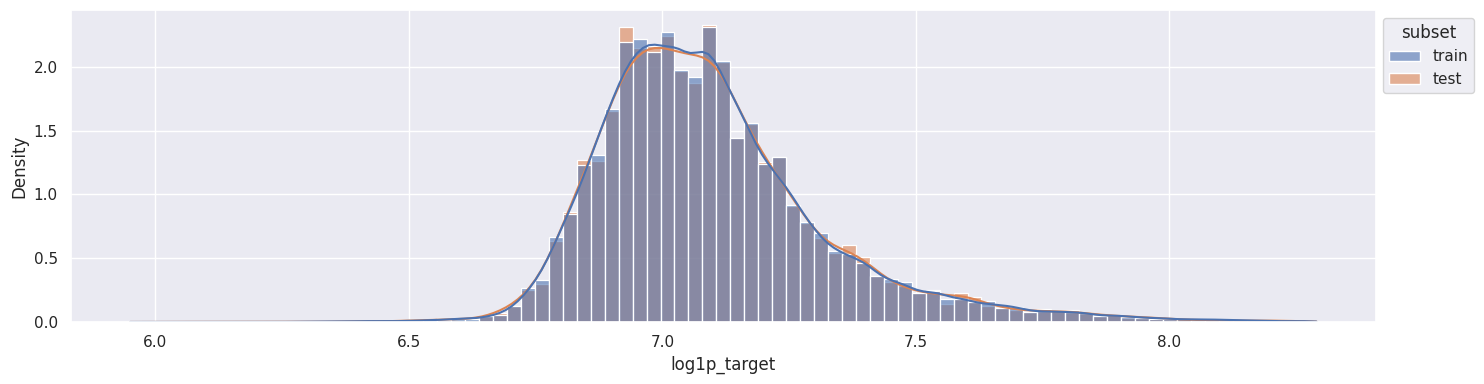

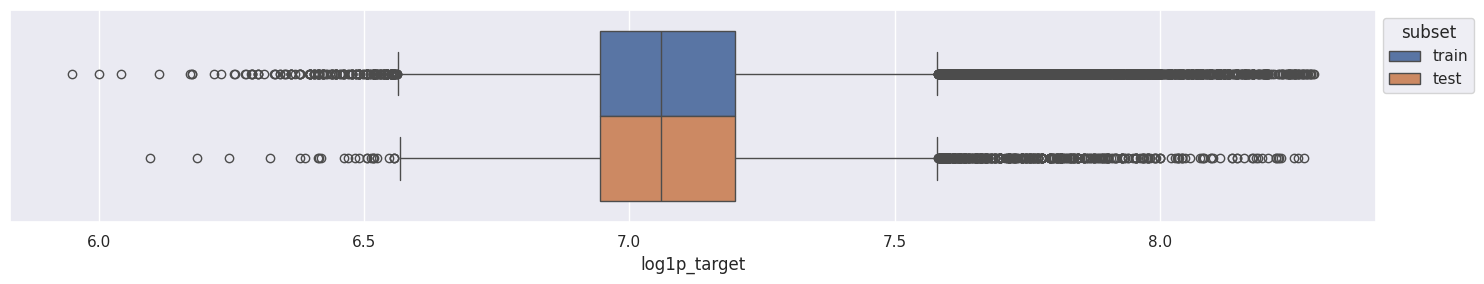

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  log1p_target  train  test                0.05     0.999411  \

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.897535     0.897537              True  \

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True

In [97]:
custom_hist_multiplot(data=df, columns=[config['target_col']], hue='subset', features_kind='num')
custom_box_multiplot(data=df, columns=[config['target_col']], hue='subset')
compare_distributions(data=df, features=[config['target_col']], hue='subset', are_categorical=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

А ты прошаренный! Первый кто использует стратификацию при разделении теста и трейна)

</div>

It can be seen, that the distribution of the target column in the train subset is similar to one on the test subset according to the histogram and statistical tests.

In [31]:
train_bins = get_bins(len(df.query("subset == 'train'")))
test_bins = get_bins(len(df.query("subset == 'test'")))
train_bins, test_bins

(82, 39)

# II. EDA

## 2.1. Dataset overview

To begin with, the problem of duplicates, missing data and outliers is covered in the data cleaning stage which was done earlier.  
As a result, no missing data was found, the duplicates were removed and only most extreme outliers were removed (otherwise a lot of data would be lost).  

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124647 entries, 106691 to 77829
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 124647 non-null  uint32 
 1   flat_id            124647 non-null  uint32 
 2   floor              124647 non-null  uint8  
 3   is_apartment       124647 non-null  bool   
 4   kitchen_area       124647 non-null  float32
 5   living_area        124647 non-null  float32
 6   rooms              124647 non-null  uint8  
 7   total_area         124647 non-null  float32
 8   log1p_target       124647 non-null  float32
 9   building_id        124647 non-null  uint16 
 10  build_year         124647 non-null  uint16 
 11  building_type_int  124647 non-null  uint8  
 12  latitude           124647 non-null  float32
 13  longitude          124647 non-null  float32
 14  ceiling_height     124647 non-null  float32
 15  flats_count        124647 non-null  uint16 
 16  flo

As for data types, categorical and numerical features are sufficiently represented

In [100]:
df.query('subset == "train"').describe()

id        flat_id          floor   kitchen_area   
count  1.121820e+05  112182.000000  112182.000000  112182.000000  \
mean   1.301171e+06   70210.997647       7.189380       8.668926   
std    3.596401e+04   41125.326286       5.077862       4.138067   
min    1.238856e+06       0.000000       1.000000       0.000000   
25%    1.270064e+06   34264.250000       3.000000       6.100000   
50%    1.301170e+06   70599.500000       6.000000       8.600000   
75%    1.332300e+06  105774.750000      10.000000      10.100000   
max    1.363501e+06  141361.000000      31.000000      35.000000   

         living_area          rooms     total_area   log1p_target   
count  112182.000000  112182.000000  112182.000000  112182.000000  \
mean       29.290640       2.046817      56.900505       7.095891   
std        17.729023       0.880370      23.724426       0.225022   
min         0.000000       1.000000      11.000000       5.950098   
25%        19.000000       1.000000      39.000000       6.944483   
50%        29.000000       2.000000      52.000000       7.060698   
75%        40.000000       3.000000      66.400002       7.199206   
max       150.000000       6.000000     195.199997       8.289836   

         building_id     build_year  building_type_int       latitude   
count  112182.000000  112182.000000      112182.000000  112182.000000  \
mean    13829.426307    1986.131679           3.324241      55.730377   
std      6810.678167      20.860766           1.444048       0.103398   
min       230.000000    1914.000000           0.000000      55.427238   
25%      8479.250000    1969.000000           2.000000      55.652420   
50%     13927.000000    1983.000000           4.000000      55.721611   
75%     19943.000000    2006.000000           4.000000      55.810081   
max     24617.000000    2022.000000           6.000000      56.011032   

           longitude  ceiling_height    flats_count   floors_total  
count  112182.000000   112182.000000  112182.000000  112182.000000  
mean       37.591061        2.728159     240.282621      13.673620  
std         0.152027        0.172388     164.239212       5.799448  
min        37.104614        2.250000       1.000000       1.000000  
25%        37.491253        2.640000     112.000000       9.000000  
50%        37.582565        2.640000     199.000000      14.000000  
75%        37.703575        2.800000     320.000000      17.000000  
max        37.946411        3.400000     952.000000      41.000000

Since the target features was transformed via log1p transformation, we need to reverse the transformation to get the actual values 
in order to perform some analysis

In [101]:
(10**df.query('subset == "train"')[config['target_col']] - 1).describe()

count    1.121820e+05
mean     1.478956e+07
std      1.261066e+07
min      8.914502e+05
25%      8.800001e+06
50%      1.150000e+07
75%      1.582000e+07
max      1.949108e+08
Name: log1p_target, dtype: float64

1. latitude & longitude
    average coordinates and their min and max values suggest that all buildings are located in the Moscow or very close to it.
2. build_year - the average build year is about 1983-1986  
    This is not a surprise since a lot of residential buildings in Moscow were built around the 80s
3. floor - an average floor is 6 or 7
4. Area feautures:  
    kitchen_area - avg value is about 8.6 $m^2%$  
    living_area - avg value is about 29 $m^2%$  
    total_area - avg value is about 52-57 $m^2%$   
    So, the avg values are reasonable - the kitchen are is quite small, while the living area takes slightly more than half of the total area.
5. building_type_int  
    the most common building type is 4, although the nature of the building type is not clear since it is encoded
6. ceiling_height - the average ceiling height is about 2.6-2.7m.  
    What is interesting, is that the median value 2.64 m is a common feature for residential buildings built in the 70s and 80s.
7. flats_count - the average number of flats is about 240.  
8. floors_total - the average number of floors is about 14-17, which is also a common feature for residential buildings built in the 80s.
9. target (log1p_price) - the average price is about 15 million rubles, which is quite reasonable for overall high prices in Moscow.

So an average flat was built in the 80s, with all corresponding features of the residential buildings built in the 80s.
It costs about 15 million rubles


## 2.2. Feature analysis

### <font color='#d0863b'>  kitchen_area, living_area, total_area (moved to the top) </font>    

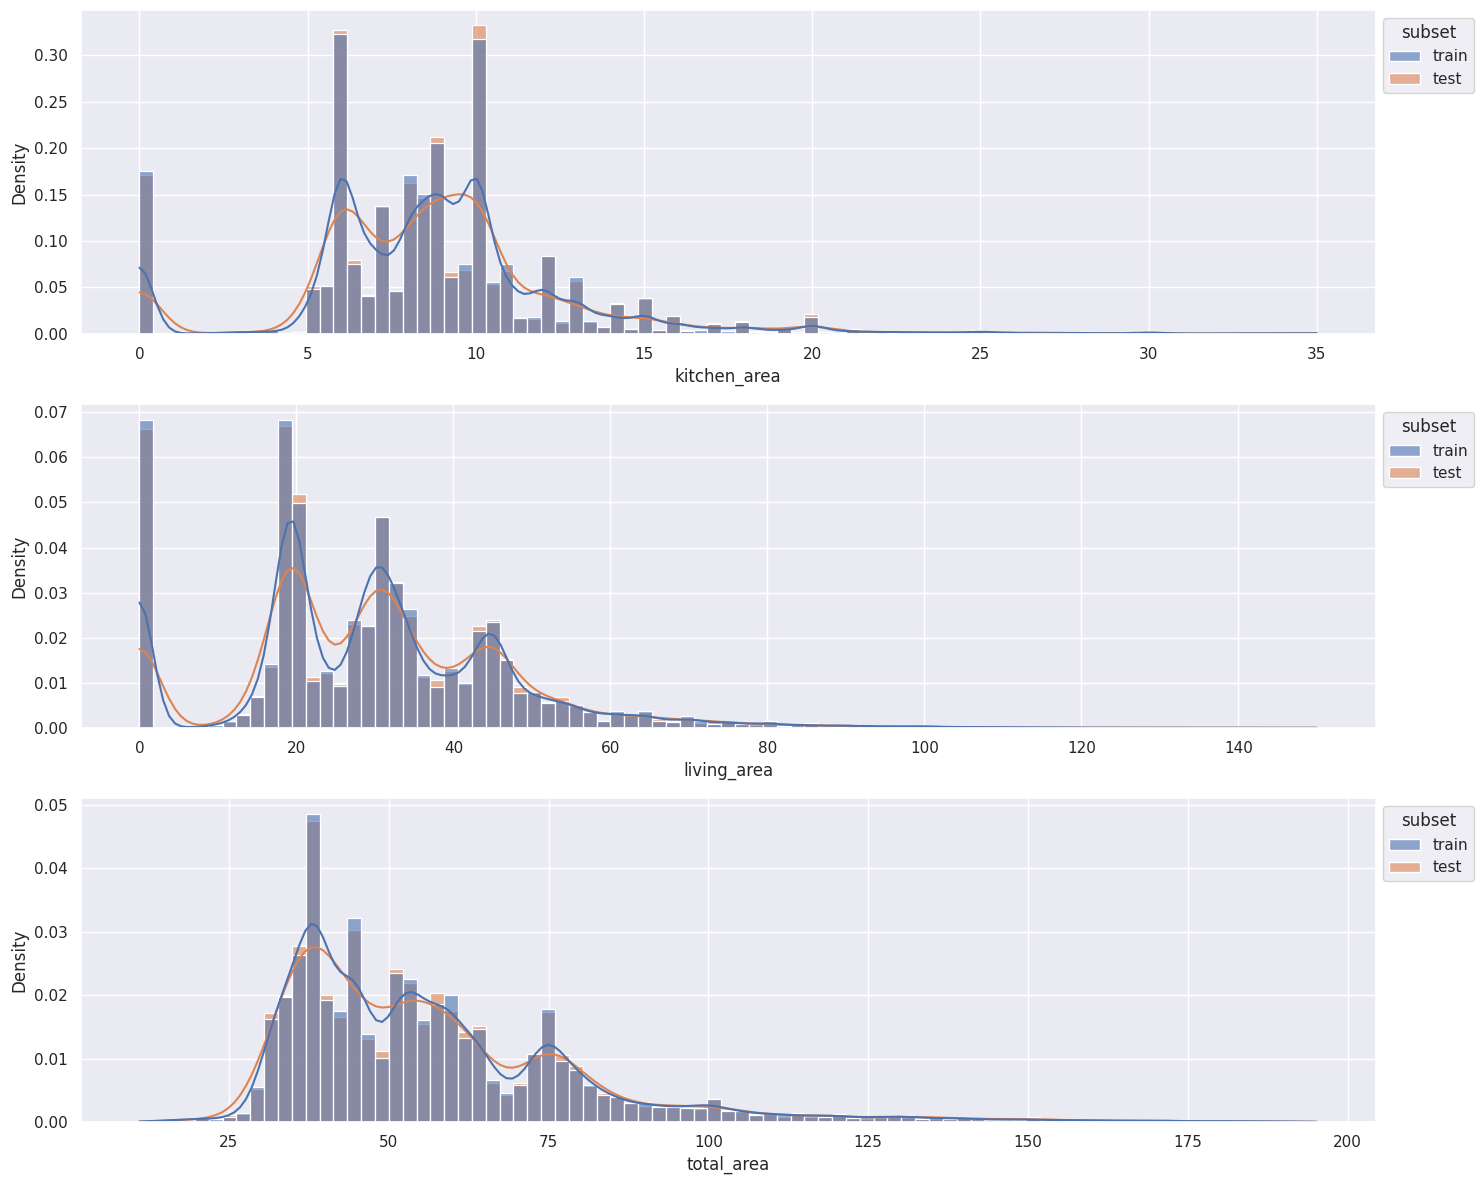

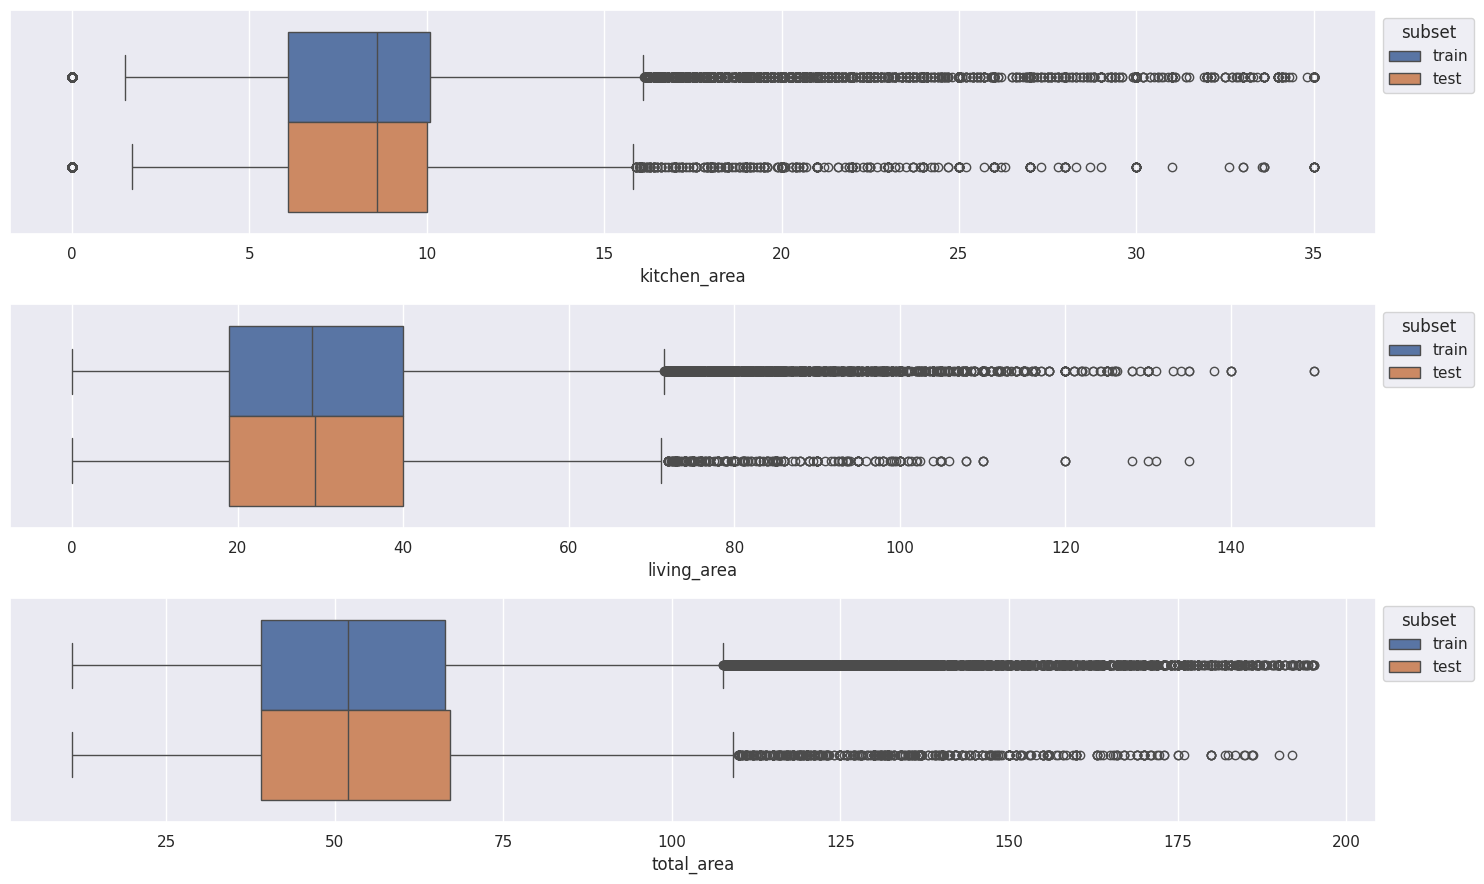

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  kitchen_area  train  test                0.05     0.893009  \
1   living_area  train  test                0.05     0.453881   
2    total_area  train  test                0.05     0.886868   

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.834859     0.835147              True  \
1               0.25         0.207855     0.208303              True   
2               0.25         0.979885     0.979886              True   

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True  
1                    True                  True              True  
2                    True                  True              True

In [32]:
cols = ['kitchen_area', 'living_area', 'total_area']
custom_hist_multiplot(data=df, columns=cols, hue='subset', features_kind='num')
custom_box_multiplot(data=df, columns=cols, hue='subset')
compare_distributions(data=df, features=cols, hue='subset', are_categorical=False)

In [33]:
print("Rate of 0 values for kitchen_area: ", (df['kitchen_area'] == 0).sum()/len(df))
print("Rate of 0 values for living_area: ", (df['living_area'] == 0).sum()/len(df))
print("Rate of 0 values for both kitchen_area and living_area: ", ((df['kitchen_area'] == 0) & (df['living_area'] == 0)).sum()/len(df))
print("Rate of 0 values for both kitchen_area or living_area: ", ((df['kitchen_area'] == 0) | (df['living_area'] == 0)).sum()/len(df))

Rate of 0 values for kitchen_area:  0.0719953147689074
Rate of 0 values for living_area:  0.12029972642743106
Rate of 0 values for both kitchen_area and living_area:  0.05189053888180221
Rate of 0 values for both kitchen_area or living_area:  0.14040450231453624


It can be seen that there are quite a lot of 0 values in living_area and kitchen_area columns.  
Since there are no 0 values in the total_area column, it is highly unlikely that there was any  
error during data collection which led to 0 values in the area-related columns.  
The probable reason for the 0 values in the living_area and kitchen_area columns is that  
these properties are used for commercial purposes.

<font color='#d0863b'> Therefore, it would be better to remove these rows from the dataset and focus only on residential properties.
Rows with 0 value for living_area will be removed - if a row has 0 value for kitchen_area but not for living_area,
it will be kept since it is still probably a residential property. </font>    

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

В случае если это коммерческие помещения, то их тогда стоит выкинуть из обучения, потому что модель не будет хорошо работать на разные типы помещений, лучше делать разные модели для разных целей. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>

Даже в студии не может отсутствовать жилая зона. жилая зона это площадь без балконов, туалетов. Если это 0 то жить негде))) 

В любом случае эти строки кажутся сомнительными и вряд ли нужны для нашей модельки

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Принимаю замечание. Дополнительные комментарии можно увидеть в комментах выше

</div>

In [7]:
df = df[df['living_area'] != 0]

<font color='#d0863b'>  Let's also check the distribution of the target variable for train and test datasets. </font>

In [8]:
compare_distributions(data=df, features=[config['target_col']], hue='subset', are_categorical=False)

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  log1p_target  train  test                0.05     0.999958  \

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.953737     0.953738              True  \

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True

<font color='#d0863b'> The distribution of the target column remained similar between the train and test sets. </font>

Now let's analyze the `living_area` without 0 values

2024-09-30 16:05:25,281 INFO: custom_joint_plot saved to ../artifacts/eda/living_area_total_area_jointplot.png


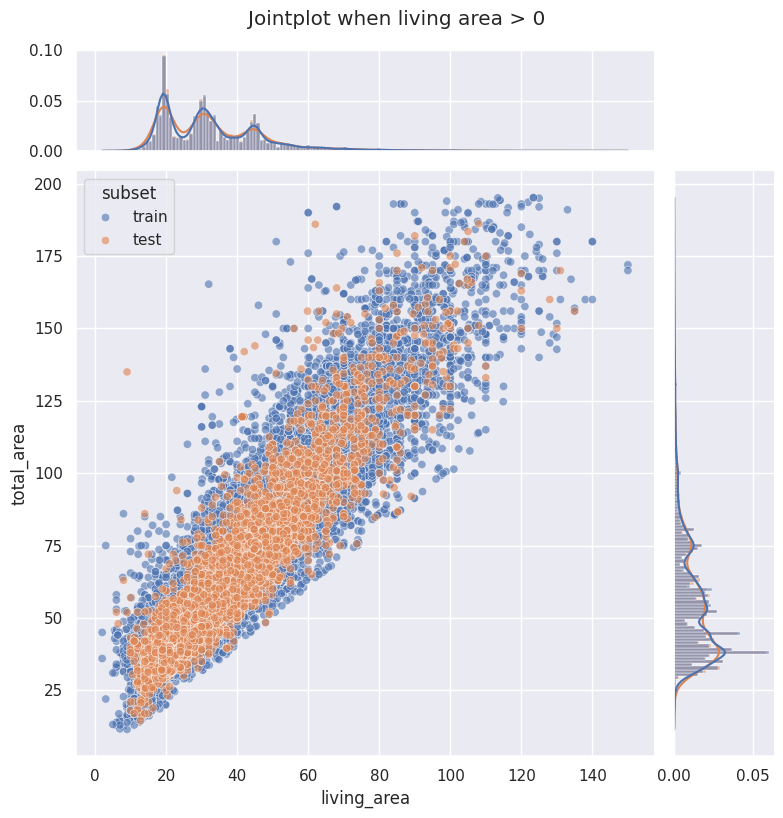

In [38]:
custom_joint_plot(
    data=df,
    x="living_area",
    y="total_area",
    hue="subset",
    title="Jointplot when living area > 0",
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir, "living_area_total_area_jointplot.png"
        )
    ),
)

1. There are 3 peaks in the distribution of living_area - at about 20 $m^2$, 30 $m^2$ and 45 $m^2$.
2. There is a clear correlation between total_area and living_area - the more total_area, the more living_area.

Now let's analyze the `kitchen_area` without 0 values

2024-09-30 16:06:43,373 INFO: custom_joint_plot saved to ../artifacts/eda/kitchen_area_total_area_jointplot.png


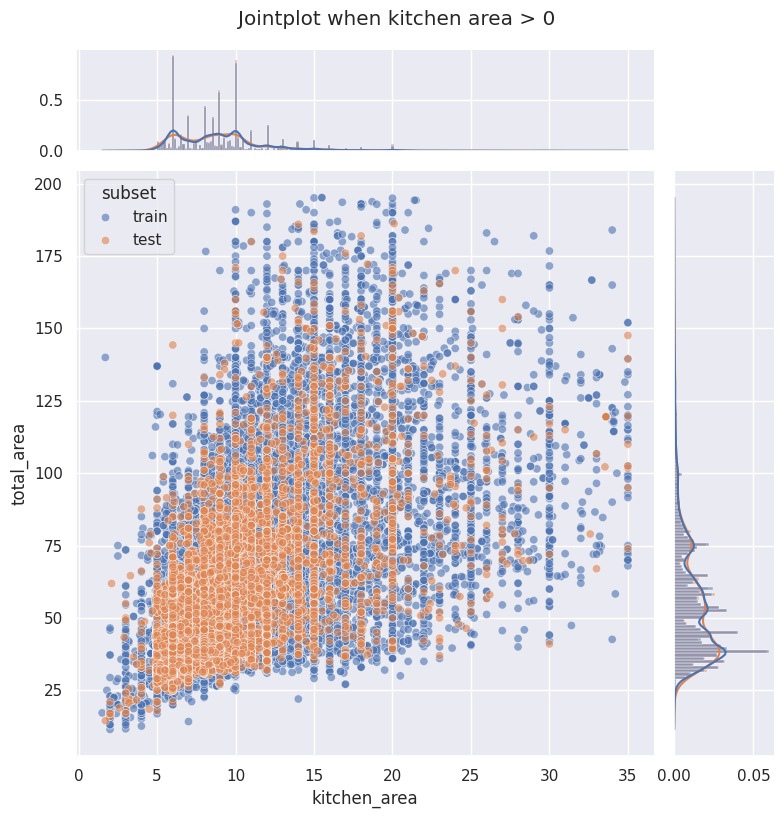

In [40]:
custom_joint_plot(
    data=df.query("kitchen_area > 0"),
    x="kitchen_area",
    y="total_area",
    hue="subset",
    title="Jointplot when kitchen area > 0",
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir,
            "kitchen_area_total_area_jointplot.png",
        )
    ),
)


1. There are 3 peaks in the distribution of kitchen_area - at about 6 $m^2$, 8 $m^2$ and 10 $m^2$.
2. There is a correlation between total_area and kitchen_area - the more total_area, the more kitchen_area.  
    However, the cloud is not very dense being close to the line y=x and the values are highly scattered.

### latitude & longitude

2024-09-30 15:58:23,196 INFO: custom_joint_plot saved to ../artifacts/eda/latitude_longitude_jointplot.png


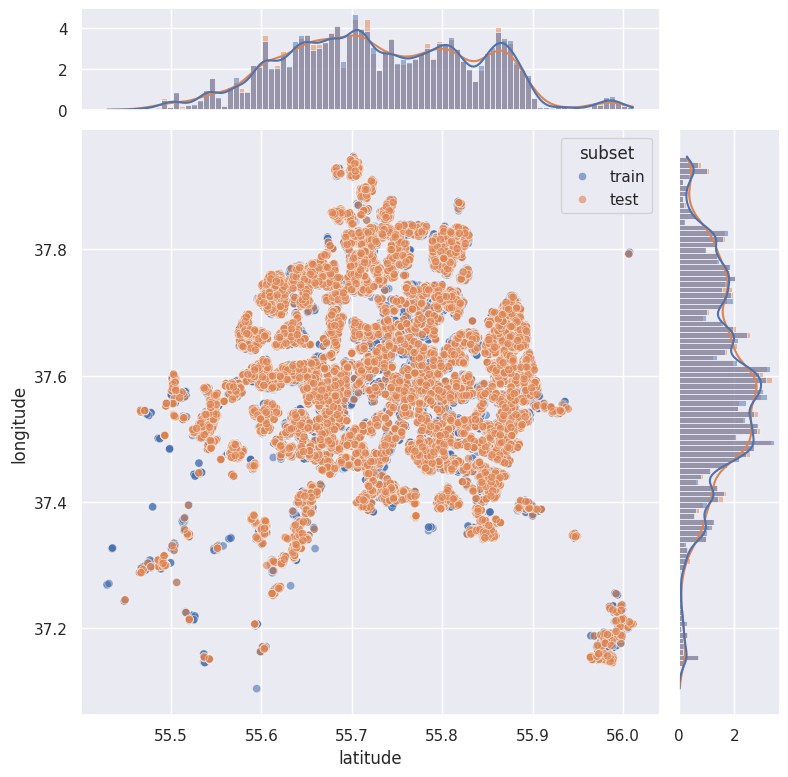

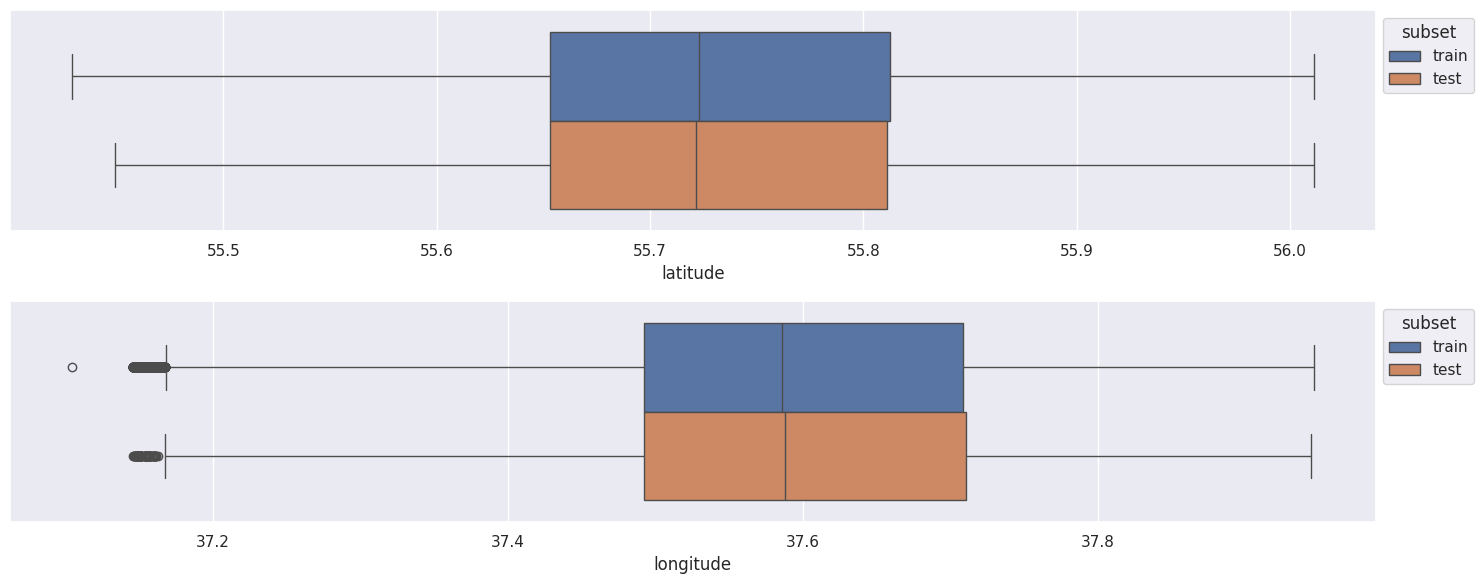

feature   hue1  hue2  significance_level  ks_2samp.pv  anderson_ksamp.pv   
0   latitude  train  test                0.05     0.695008               0.25  \
1  longitude  train  test                0.05     0.918617               0.25   

   mannwhitneyu.pv  ranksums.pv  ks_2samp.similar  anderson_ksamp.similar   
0         0.334851     0.334851              True                    True  \
1         0.533054     0.533054              True                    True   

   mannwhitneyu.similar  ranksums.similar  
0                  True              True  
1                  True              True

In [36]:
custom_joint_plot(data=df, x="latitude", y="longitude", hue='subset', savepath=Path(os.path.join(env_vars.eda_artifacts_dir, 'latitude_longitude_jointplot.png')))
custom_box_multiplot(data=df, columns=['latitude', 'longitude'], hue='subset')
compare_distributions(data=df, features=['latitude', 'longitude'], hue='subset', are_categorical=False)

According to the jointplot, it is clear, that it is Moscow.  
The distribution of both coordinates looks more or less symmetrical.   
If to consider a train and test datasets separately, we can see that the corresponding distritions are similar according to the jointplot and statistical tests.  
It would be a good idea to create a new feature, which would indicate how far the flat is from the center of the city or from the nearest metro station.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Да, согласна. Верное решение!

</div>

### build_year

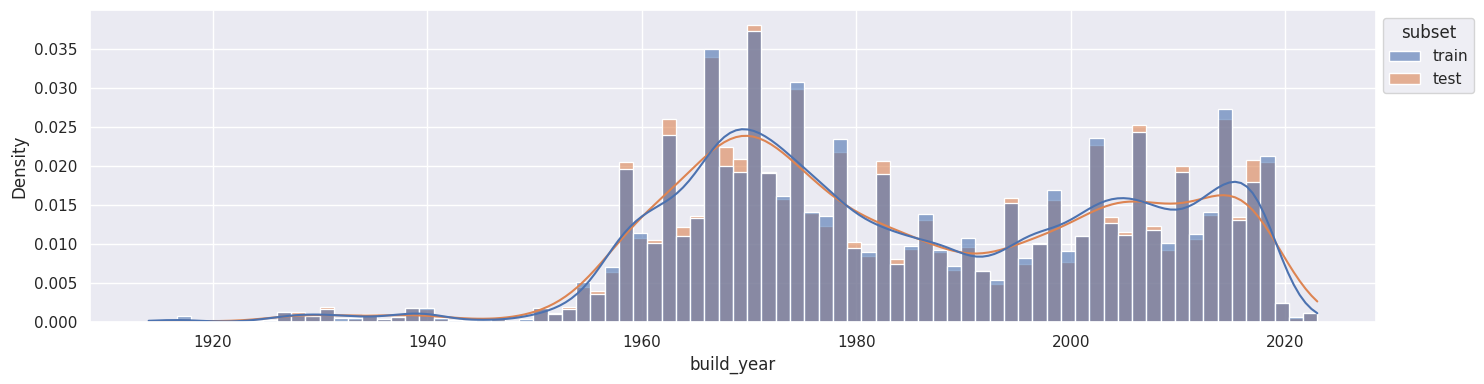

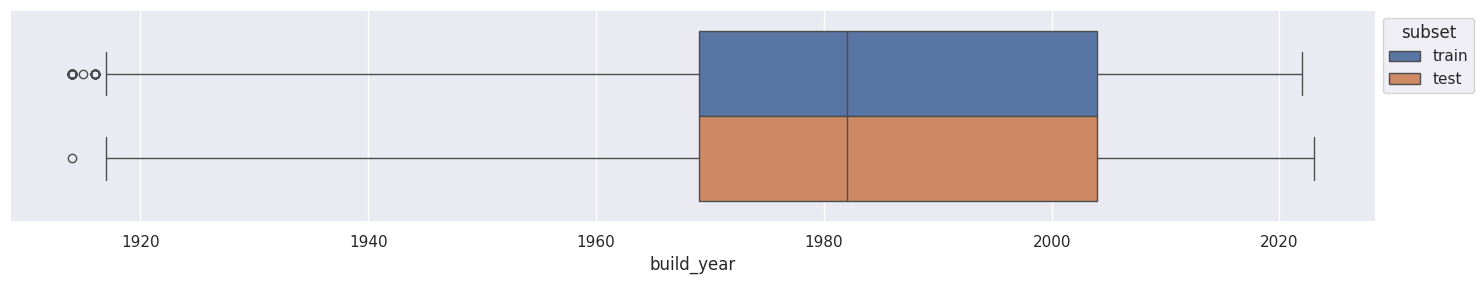

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  build_year  train  test                0.05     0.395634  \

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.438169     0.438238              True  \

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True

In [41]:
custom_hist_multiplot(data=df, columns=['build_year'], hue='subset', features_kind='num')
custom_box_multiplot(data=df, columns=['build_year'], hue='subset')
compare_distributions(data=df, features=['build_year'], hue='subset', are_categorical=False)

According to the histplot, there are 3 different distributions of the build_year:
- earlier than 1950 - group of very old buildingg, which were mostly built prior to the WW2
- between 1950 and 1990 - this group represents soviet residential buildings (normal-like distribution)
- between 1990 and 2020 - this group represents new post-soviet residential buildings (right-skewed distribution)
It might be a good idea to create a new feature, which would indicate to which build_year group the flat belongs.

The distribution of the build_year is similar if to compare train and test subsets.

### ceiling_height

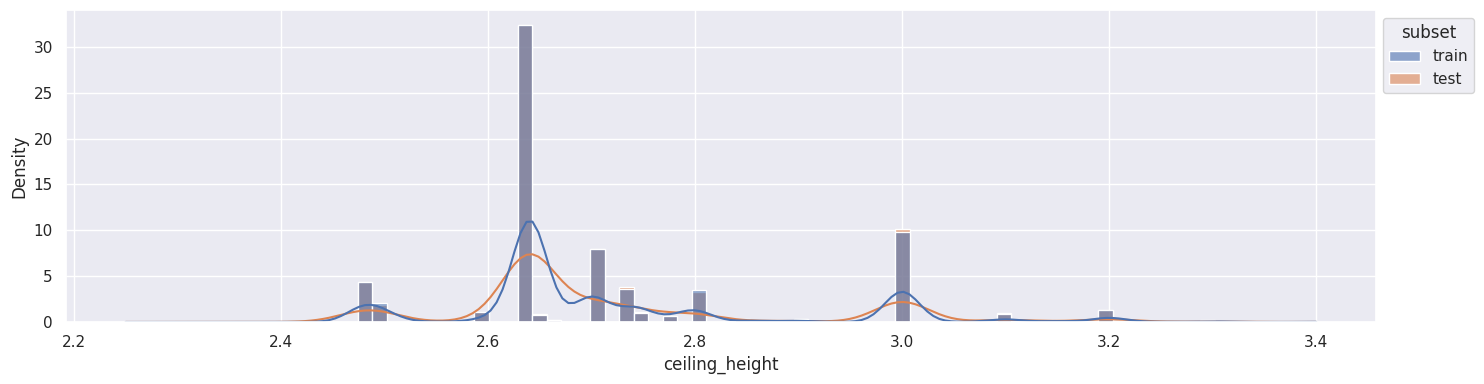

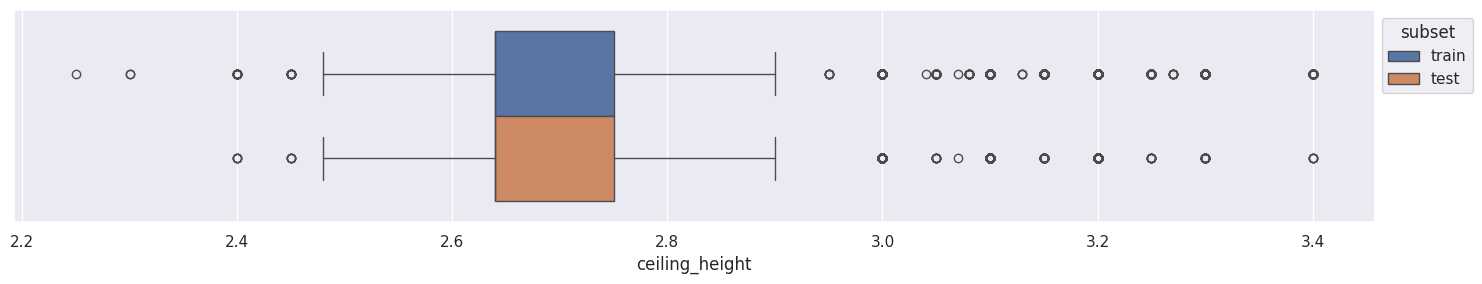

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  ceiling_height  train  test                0.05     0.949252  \

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.243529     0.268046              True  \

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True

In [42]:
custom_hist_multiplot(data=df, columns=['ceiling_height'], hue='subset', features_kind='num')
custom_box_multiplot(data=df, columns=['ceiling_height'], hue='subset')
compare_distributions(data=df, features=['ceiling_height'], hue='subset', are_categorical=False)

In [43]:
df['ceiling_height'].value_counts().head()

ceiling_height
2.64    49757
3.00    15203
2.70    12302
2.48     6744
2.74     5621
Name: count, dtype: int64

1. The distribution is discrete, which is not a surprise, since the height of a flat is usually the same among a group of flats.
2. The distribution is similar if to compare train and test subsets.
3. The most common value is 2.64, which is typical for residential buildings of the 70s and 80s.

### flats_count

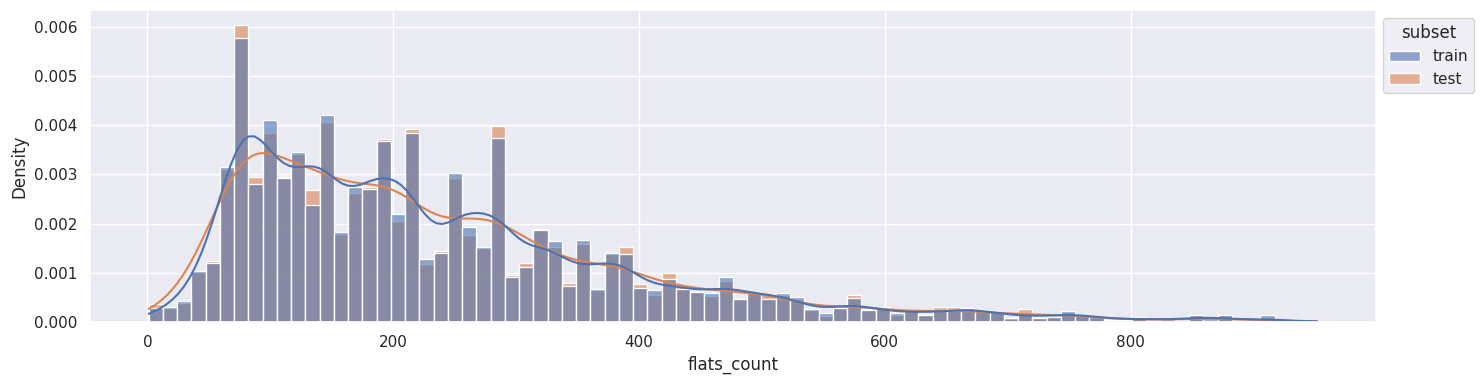

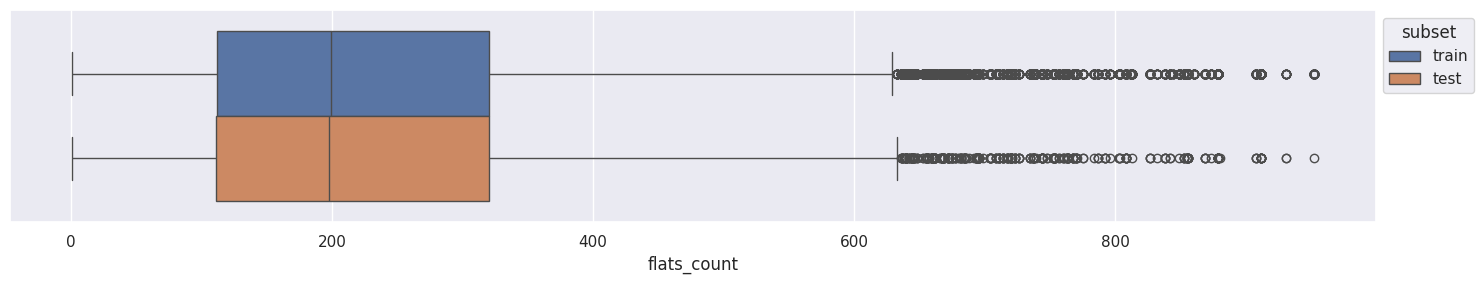

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  flats_count  train  test                0.05      0.90703  \

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.589703      0.58972              True  \

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True

In [44]:
custom_hist_multiplot(data=df, columns=['flats_count'], hue='subset', features_kind='num')
custom_box_multiplot(data=df, columns=['flats_count'], hue='subset')
compare_distributions(data=df, features=['flats_count'], hue='subset', are_categorical=False)

1. The distribution is skewed to the left, so it is more likely to see a medium-sized building
2. The distribution is similar if to compare train and test subsets.

### floor & floors_total

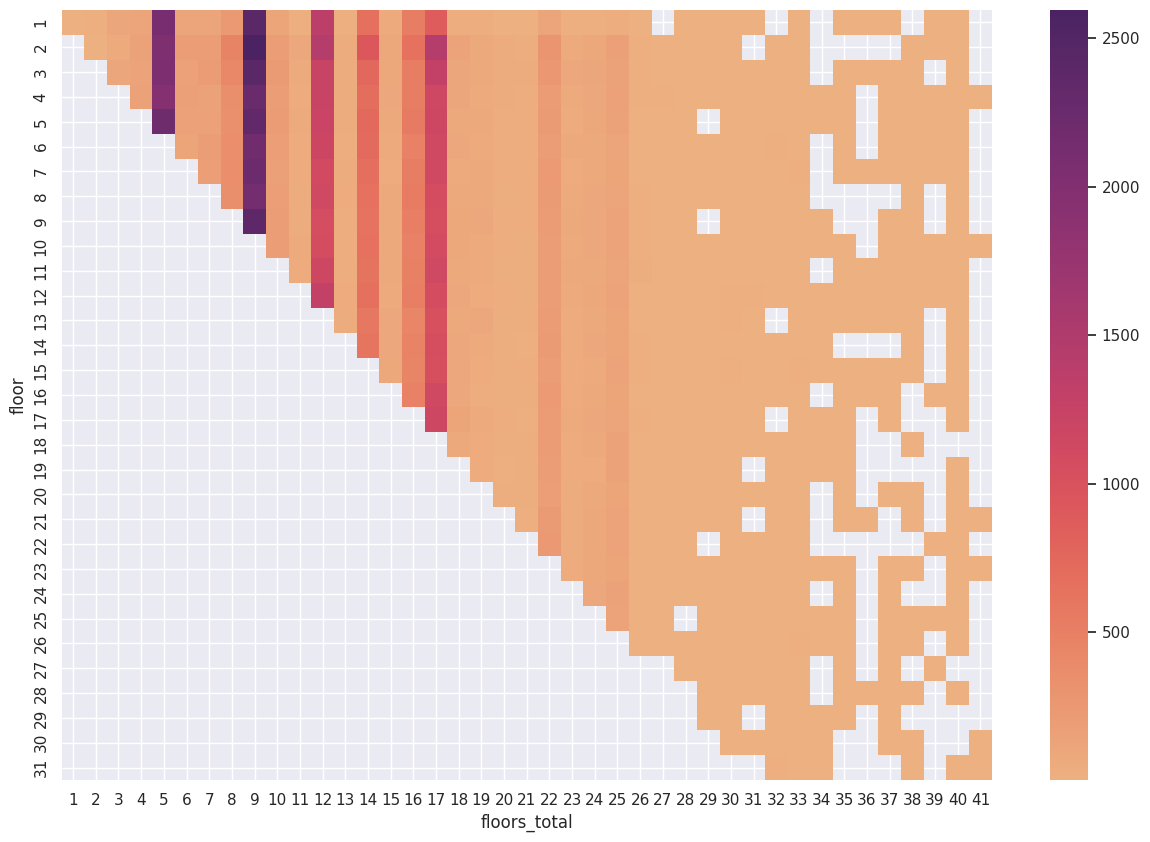

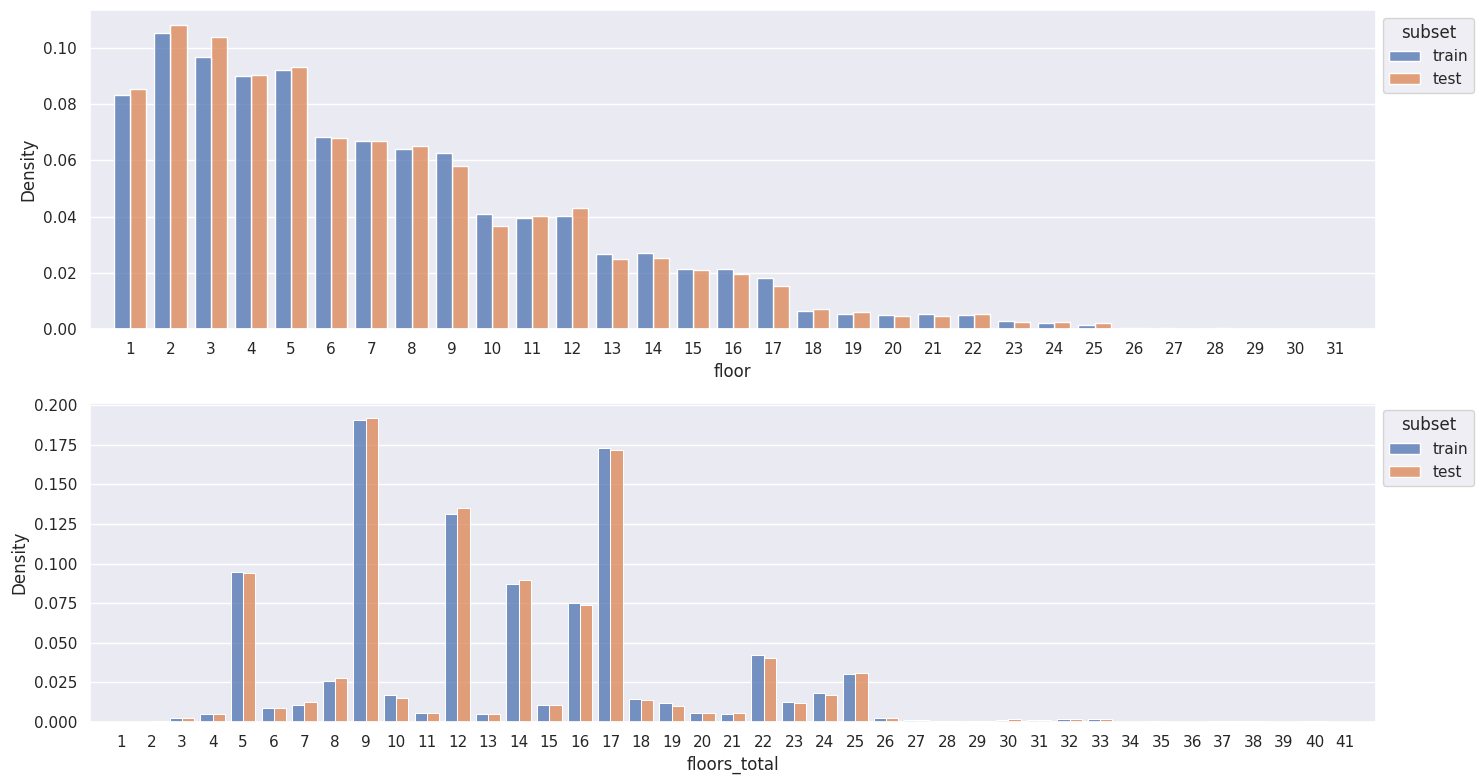

feature   hue1  hue2  significance_level  ks_2samp.pv   
0         floor  train  test                0.05     0.043890  \
1  floors_total  train  test                0.05     0.524685   

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0           0.004718         0.004749     0.004867             False  \
1           0.217103         0.150629     0.154048              True   

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                   False                 False             False  
1                    True                  True              True

In [45]:
pivot = pd.pivot_table(df.groupby(['floor', 'floors_total'])['id'].count().reset_index(), index='floor', columns='floors_total')
pivot.columns = sorted(df['floors_total'].unique())

fig = plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='flare')
plt.xlabel('floors_total')
plt.show()
fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, 'floor_floors_total_heatmap.png')), bbox_inches='tight')

custom_hist_multiplot(data=df, columns=['floor', 'floors_total'], hue='subset', features_kind='cat', cat_orient='v')
compare_distributions(data=df, features=['floor', 'floors_total'], hue='subset', are_categorical=False)

1. The distribution for both features is a discrete one.  
2. <font color='#d0863b'> The distribution only for floors_total feature is similar if to compare train and test subsets according to the histogram and all tests, 
while the distribution for floor seems similar only based in the histogram </font>
3. The distribution of the floors_total has distinct peaks: 5, 9, 12, 14, 16, 17.
4. The distribution of floor is skewed to the left - it is more likely to find a flat with a floor from 1 to 9 (9 total floors is the peak value)
5. The distribution of floor for different values of floors_total is more or less uniform for most cases.

### rooms, building_type_int, has_elevator, is_apartment

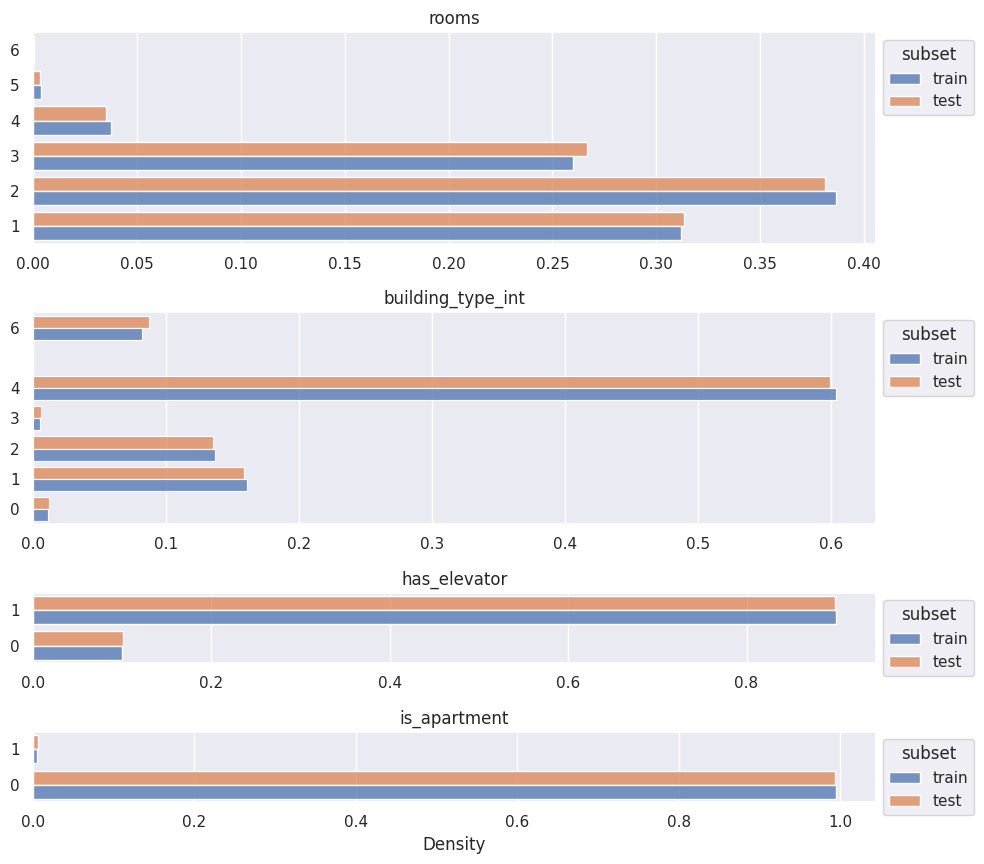

feature   hue1  hue2  significance_level  chi2_contingency.pv   
0              rooms  train  test                0.05             0.448813  \
1  building_type_int  train  test                0.05             0.267144   
2       has_elevator  train  test                0.05             0.885300   
3       is_apartment  train  test                0.05             0.240268   

   chi2_contingency_likelihood.pv  chi2_contingency.similar   
0                        0.443146                      True  \
1                        0.278095                      True   
2                        0.885358                      True   
3                        0.249689                      True   

   chi2_contingency_likelihood.similar  
0                                 True  
1                                 True  
2                                 True  
3                                 True

In [47]:
cols = ['rooms', 'building_type_int', 'has_elevator', 'is_apartment']
custom_hist_multiplot(data=df, columns=cols, hue='subset', features_kind='cat', cat_orient='h')
compare_distributions(data=df, features=cols, hue='subset', are_categorical=True)

1. The distribution for all considered columns is similar for both train and test subsets
2. It is more likely to find a flat with a very common number of 2 rooms. It is quite rare to find a flat with more than 3 rooms
3. The most popular building_type is 4, while types 0 and 3 are rare
4. Most flats are located in buildings with an elevator
5. Unsurprisingly, apartments are very rare
6. Flats with more than 4 rooms are also rare

## 2.3. Target feature analysis

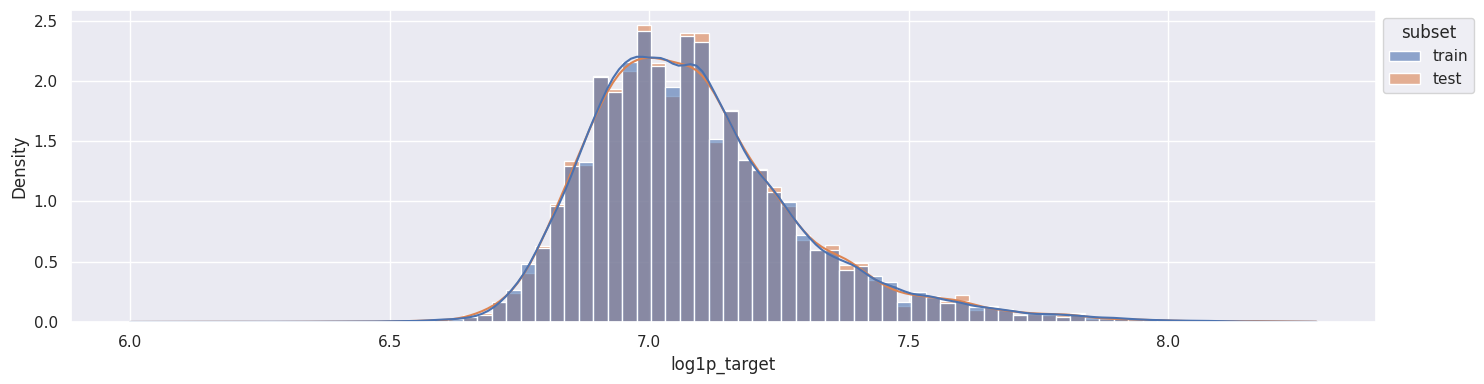

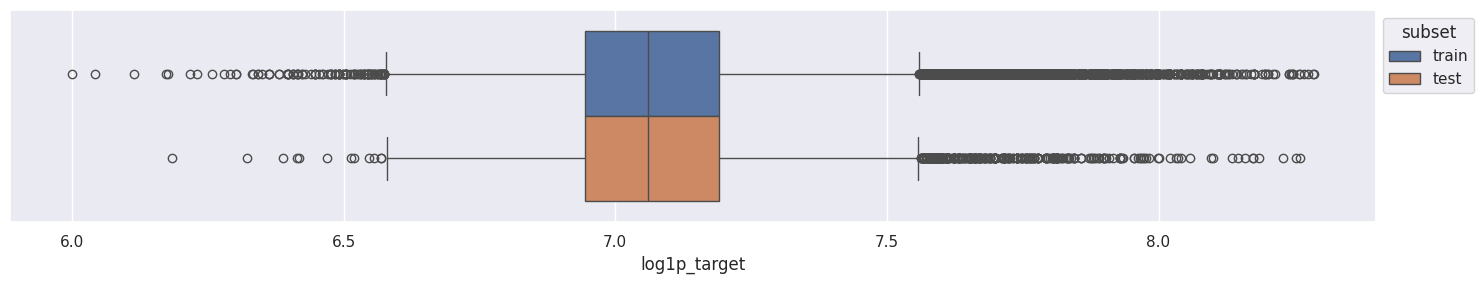

feature   hue1  hue2  significance_level  ks_2samp.pv   
0  log1p_target  train  test                0.05     0.999958  \

   anderson_ksamp.pv  mannwhitneyu.pv  ranksums.pv  ks_2samp.similar   
0               0.25         0.953737     0.953738              True  \

   anderson_ksamp.similar  mannwhitneyu.similar  ranksums.similar  
0                    True                  True              True

In [48]:
custom_hist_multiplot(data=df, columns=[config['target_col']], hue='subset', features_kind='num')
custom_box_multiplot(data=df, columns=[config['target_col']], hue='subset')
compare_distributions(data=df, features=[config['target_col']], hue='subset', are_categorical=False)

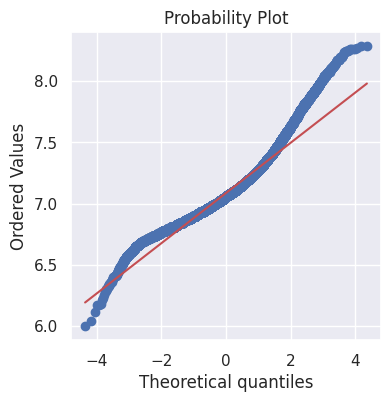

In [49]:
fig = plt.figure(figsize=(4, 4))
_ = stats.probplot(df[config['target_col']], dist="norm", plot=plt)
plt.show()
fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, 'target_col_qqplot.png')), bbox_inches='tight')

1. The distribution is close to be symmetrical, although it is not normal according to the QQ-plot  
    (tests were not considered since there are a lof of observations in the data)
2. The distribution is similar for both train and test subsets

## 2.4. Target feature vs other features

### Numerical non-discrete features

In [50]:
num_cols = [
    "kitchen_area",
    "living_area",
    "total_area",
    "build_year",
    'flats_count',
    'ceiling_height',
    'latitude',
    'longitude',
]
num_cols2 = num_cols[:-2]

  0%|          | 0/6 [00:00<?, ?it/s]

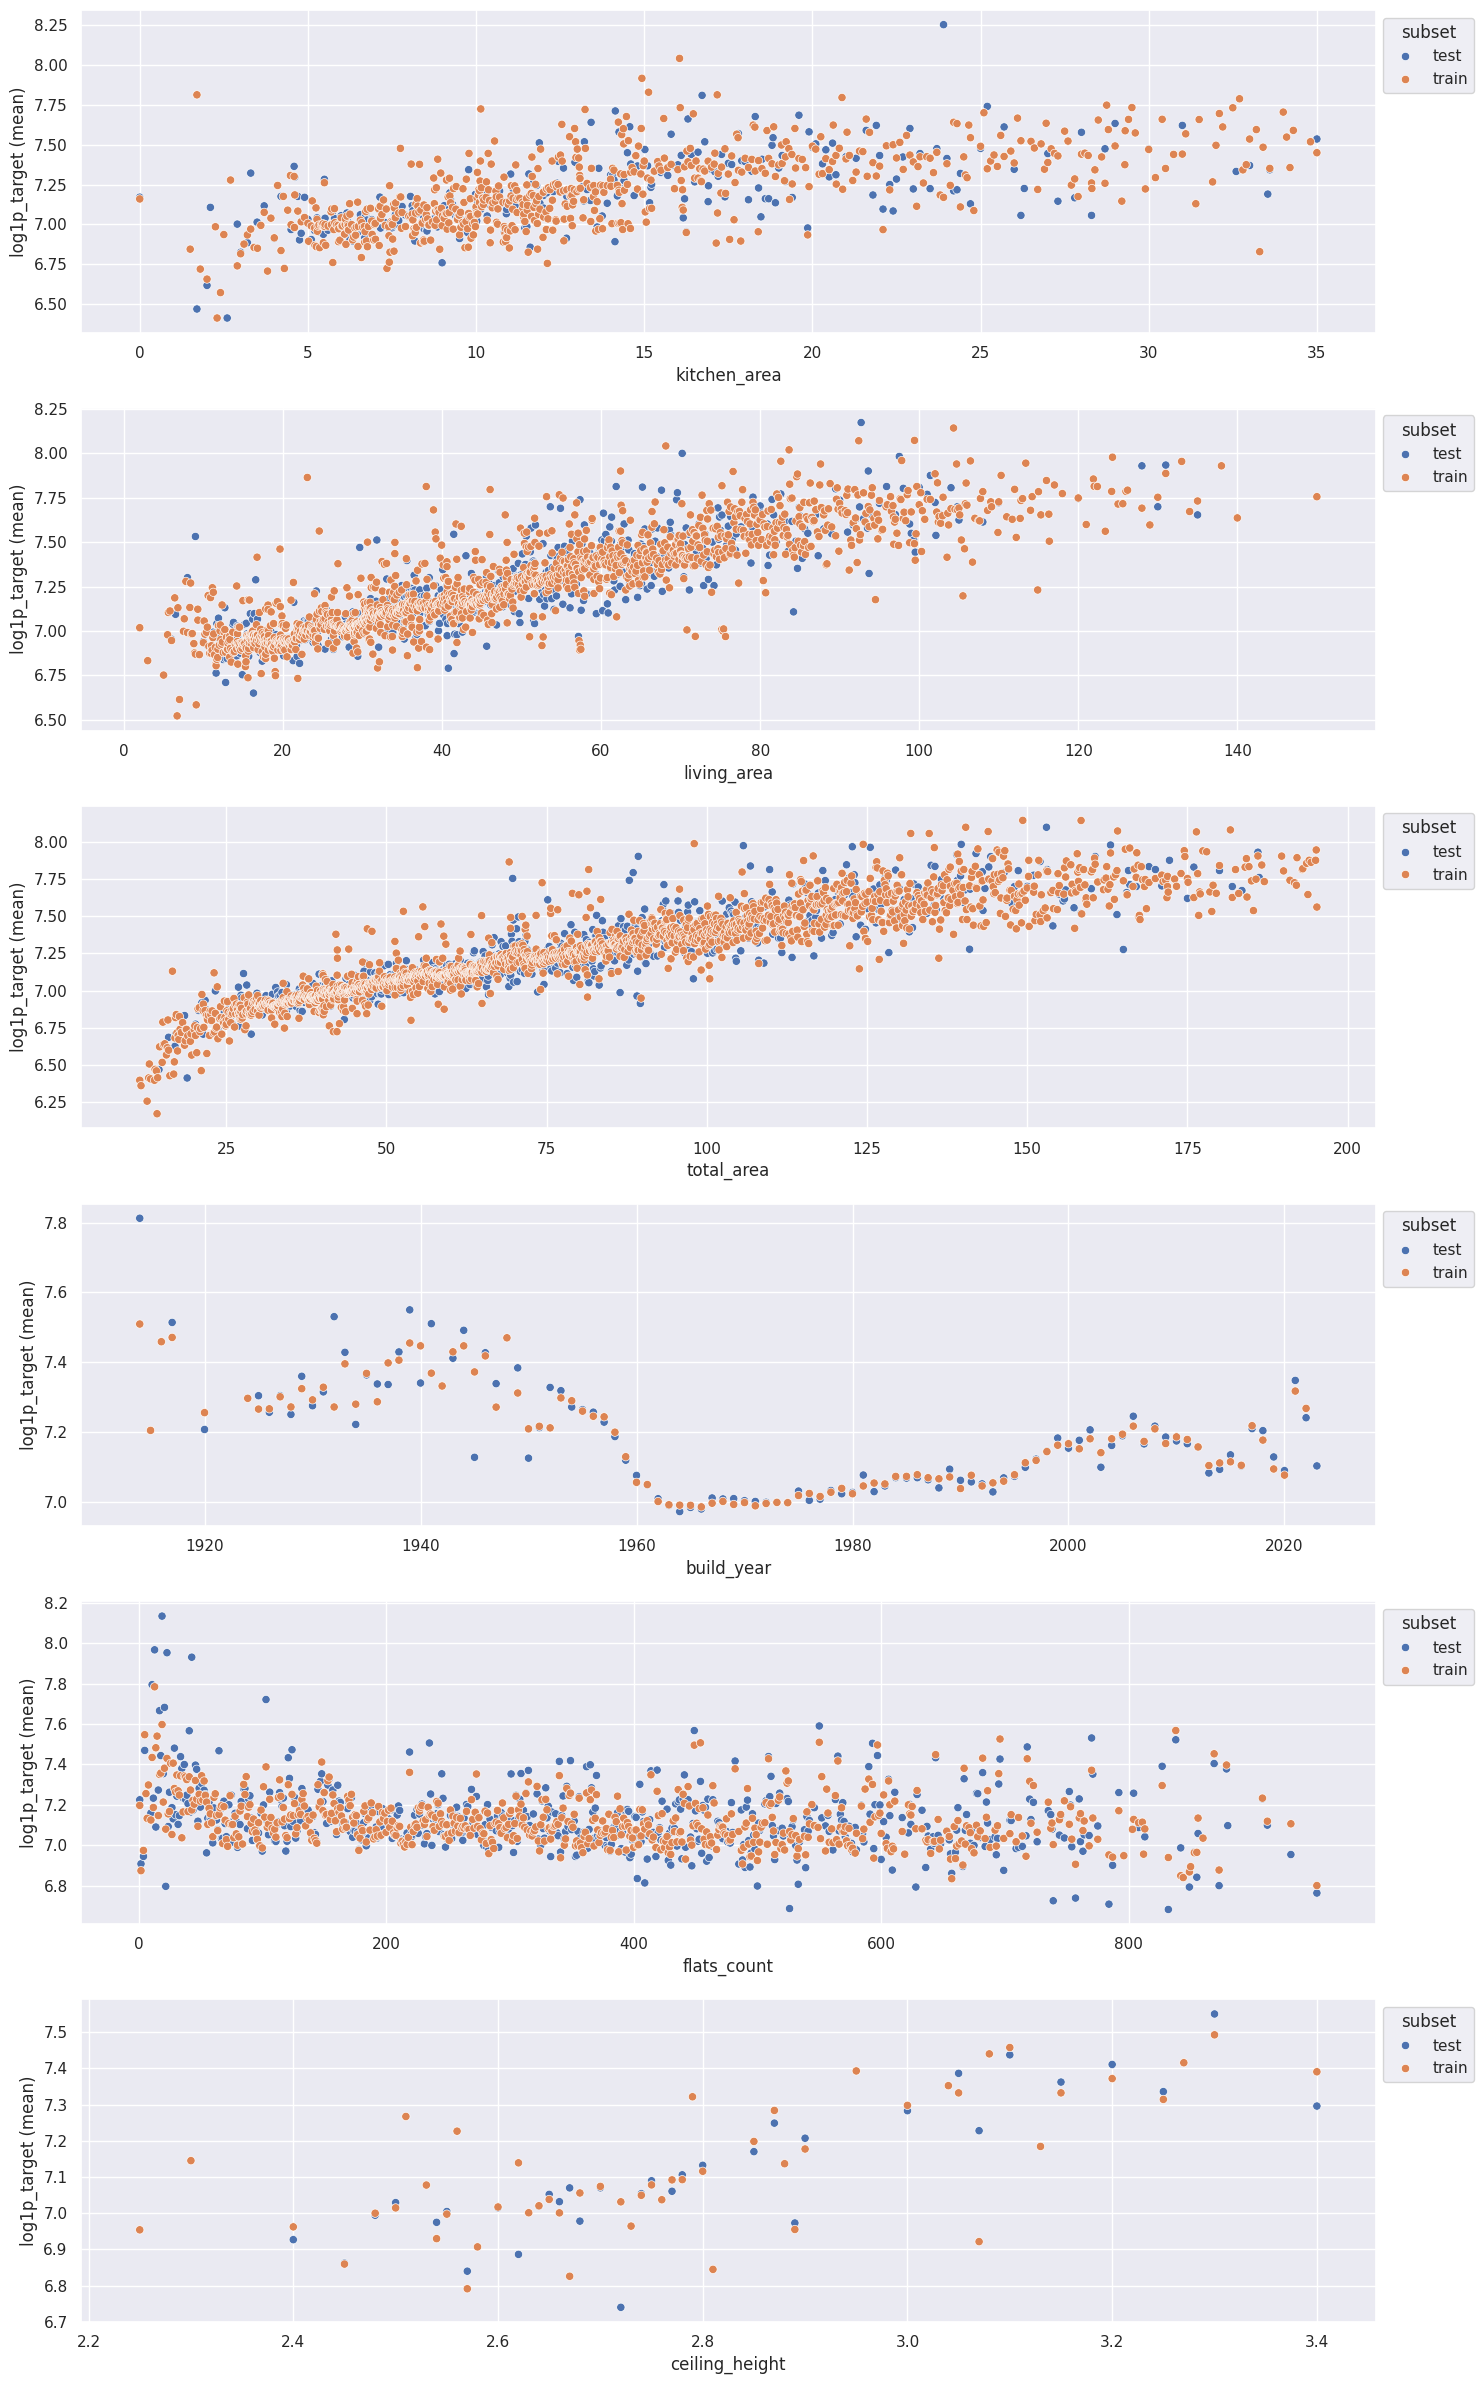

In [56]:
fig, axs = plt.subplots(len(num_cols2), figsize=(15, 4 * len(num_cols2)))

for it, col in enumerate(tqdm(num_cols2)):

    df_grouped = df.groupby(['subset', col])[config['target_col']].mean().reset_index()
    sns.scatterplot(data=df_grouped, y=config['target_col'], x=col, hue='subset', ax=axs[it])
    sns.move_legend(axs[it], "upper left", bbox_to_anchor=(1, 1))
    axs[it].set_ylabel(f"{config['target_col']} (mean)")
fig.tight_layout()
plt.show()
fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, 'target_col_scatterplot_with_num_feats.png')), bbox_inches='tight')

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>

В данном случае тоже лучше использовать точеченые графики, чем линейные, т.к. линии добавляют много шума и плотности на графике, а это нам не нужно

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Принимаю замечание.

</div>

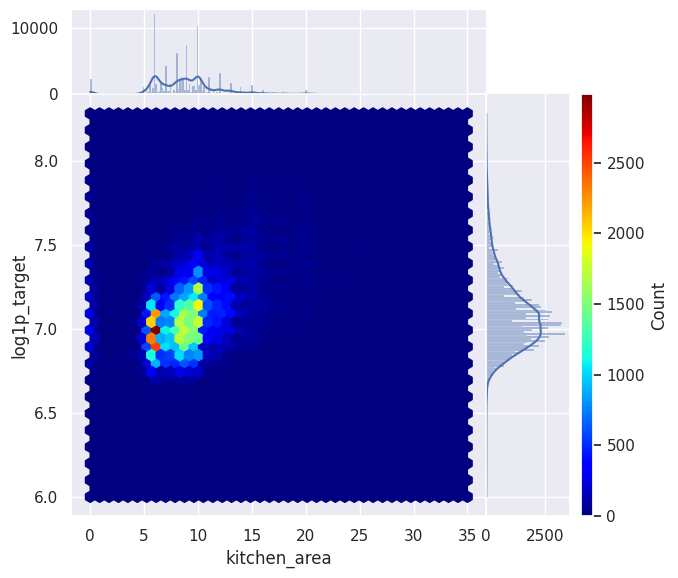

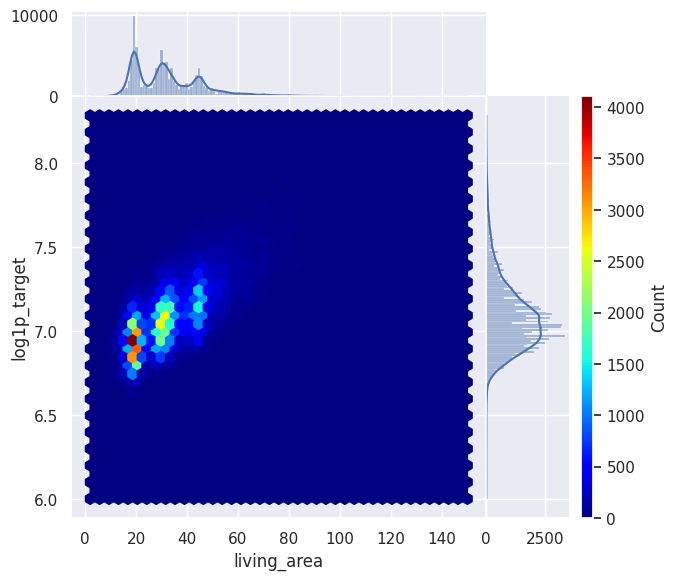

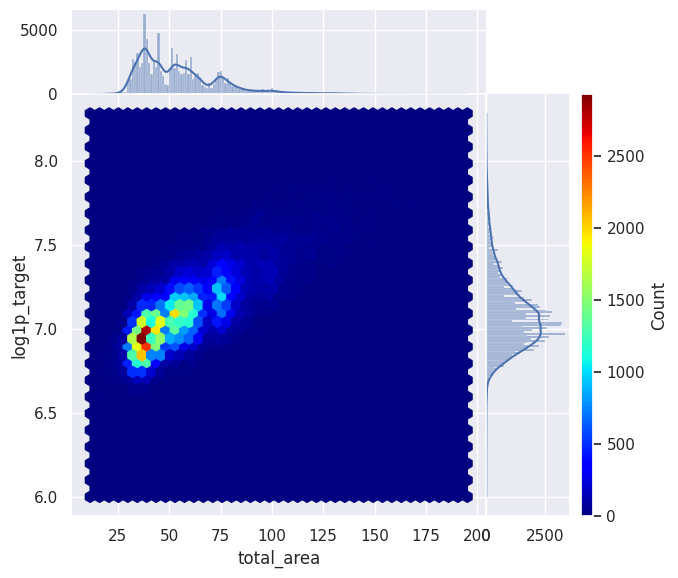

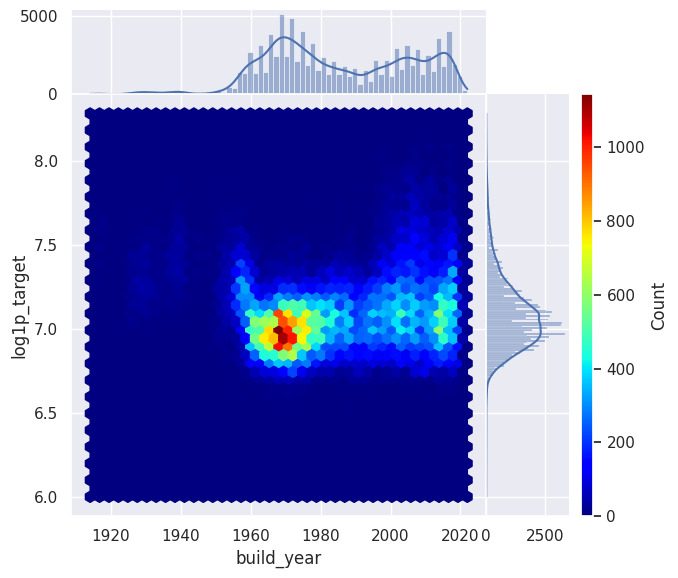

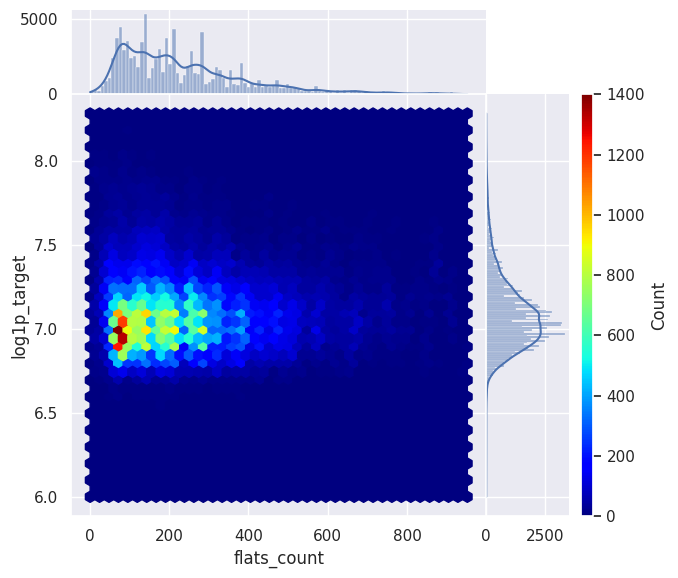

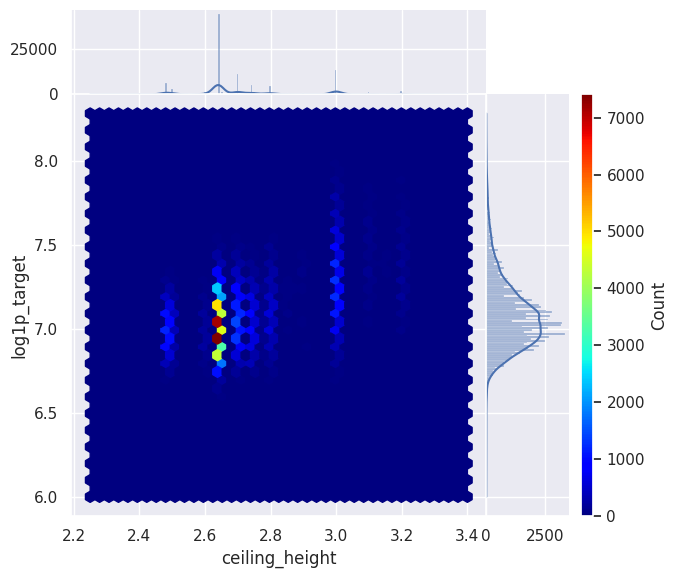

In [52]:
for col in num_cols2:
    plot = sns.jointplot(
        data=df.query('subset == "train"'),
        x=col,
        y=config["target_col"],
        kind="hex",
        marginal_kws={"kde": True},
        marginal_ticks=True,
        cmap='jet',
        gridsize=40,
    )
    plot.figure.subplots_adjust(hspace=0, wspace=0)
    pos_right_marginal = plot.ax_marg_y.get_position()
    cbar_ax = plot.figure.add_axes([pos_right_marginal.x1 + 0.02, pos_right_marginal.y0, 0.02, pos_right_marginal.height])
    cbar = plot.figure.colorbar(plot.ax_joint.collections[0], cax=cbar_ax)
    cbar.set_label('Count')
    plt.show()
    plot.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, f'{col}_and_target_jointplot.png')), bbox_inches='tight')

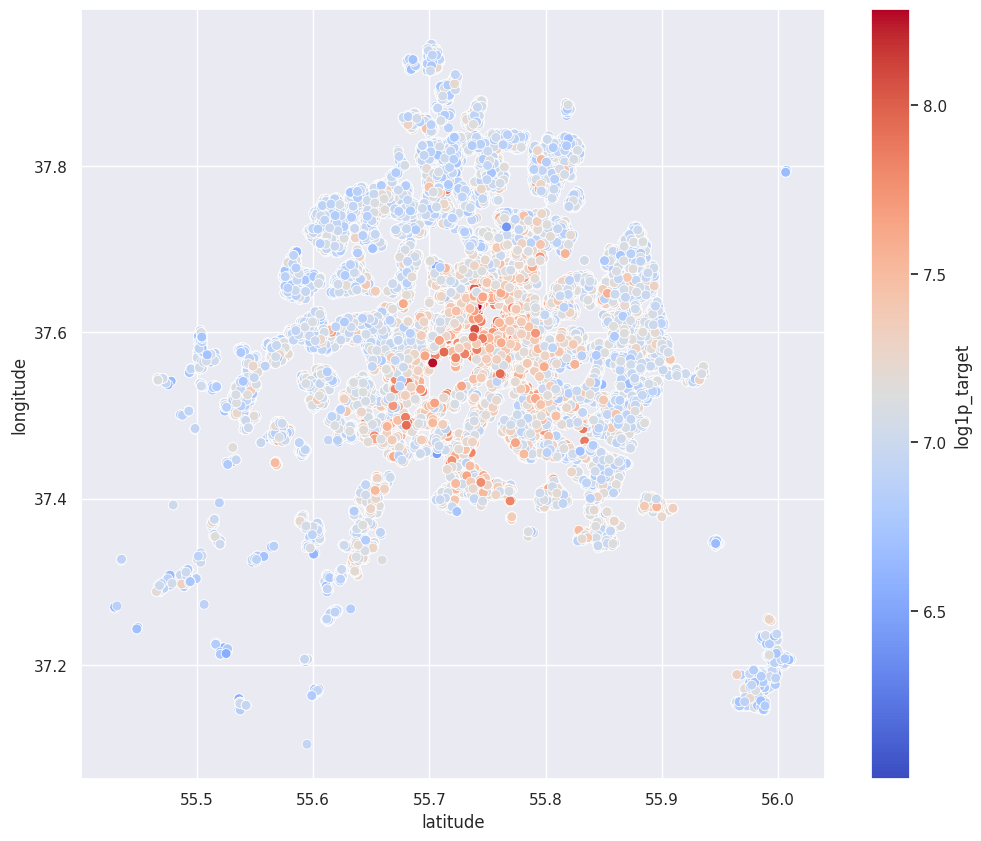

In [53]:
df2 = df.query('subset == "train"')[['latitude', 'longitude', config['target_col']]].copy()
df2.drop_duplicates(inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df2, x='latitude', y='longitude', hue=config['target_col'], palette='coolwarm', s=50, ax=ax, legend=False)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(df2[config['target_col']].min(), df2[config['target_col']].max()))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(config['target_col'])
plt.show()
fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, 'target_col_coordinates_plot.png')), bbox_inches='tight')

1. The distribution for area features vs the target feature is similar to y=k*x, which is a good sign since  
    the more the area, the more the price.
2. If to consider build_year, 2 tendencies can be observed:
- for build_year <= 1960: the older the building, the more the price
- for build_year > 1960: the newer the building, the price is at least the same or can be higher
3. flats_count does not really affect the price, although at least the price tends to not decrease with the increase of flats_count
4. The most expensive flats are mostly located in the center of the city with two small groups in the south-west and south-east parts
5. The price tends to be higher for the flats with a higher ceiling

### Numerical discrete features

In [54]:
num_discrete_cols = [
    "floor",
    "floors_total",
    "rooms",
]

  0%|          | 0/3 [00:00<?, ?it/s]

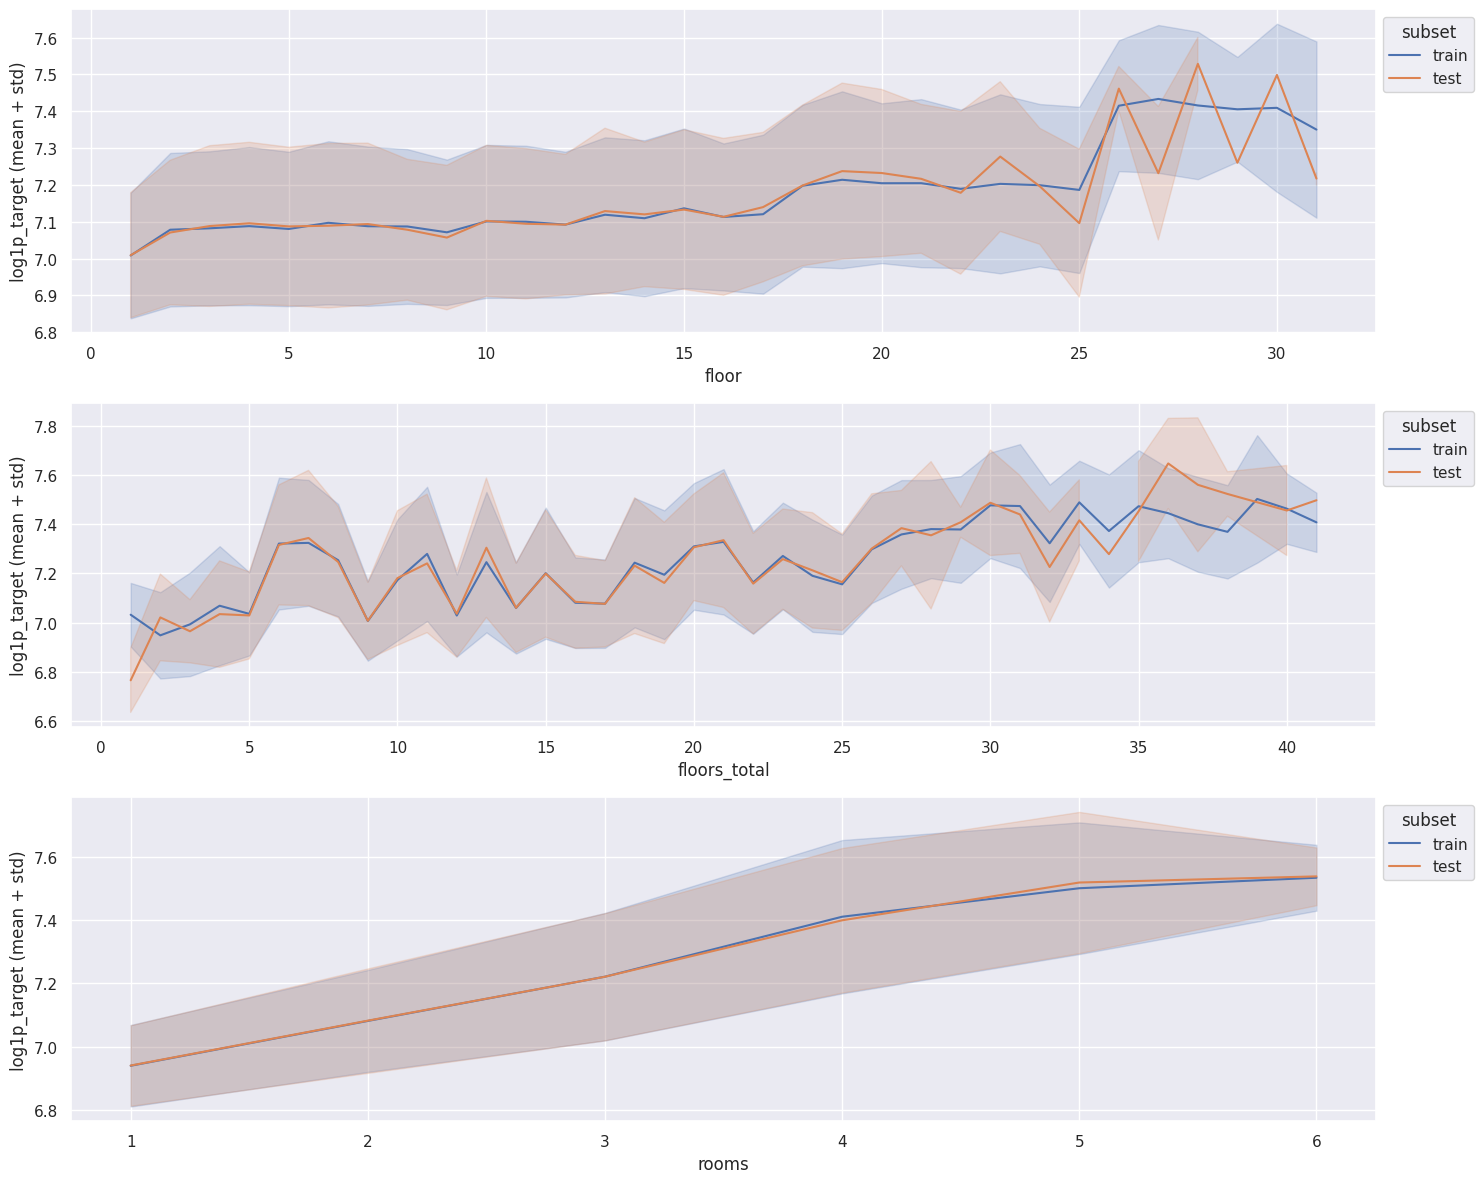

In [55]:
fig, axs = plt.subplots(len(num_discrete_cols), figsize=(15, 4 * len(num_discrete_cols)))

for it, col in enumerate(tqdm(num_discrete_cols)):

    sns.lineplot(data=df, y=config['target_col'], x=col, hue='subset', ax=axs[it], errorbar='sd')
    sns.move_legend(axs[it], "upper left", bbox_to_anchor=(1, 1))
    axs[it].set_ylabel(f"{config['target_col']} (mean + std)")
fig.tight_layout()
plt.show()
fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, 'target_col_lineplots_with_num_discrete_feats.png')), bbox_inches='tight')

1. The price is higher for the flats with more rooms
2. The price tends to be higher for the flats with a higher floor or floors_count, although the dependency is not monotonous   
    (there are some fluctuations)

### Categorical features

In [57]:
cat_cols = [
    "is_apartment",
    "building_type_int",
    "has_elevator",
    "is_duplicated",
]

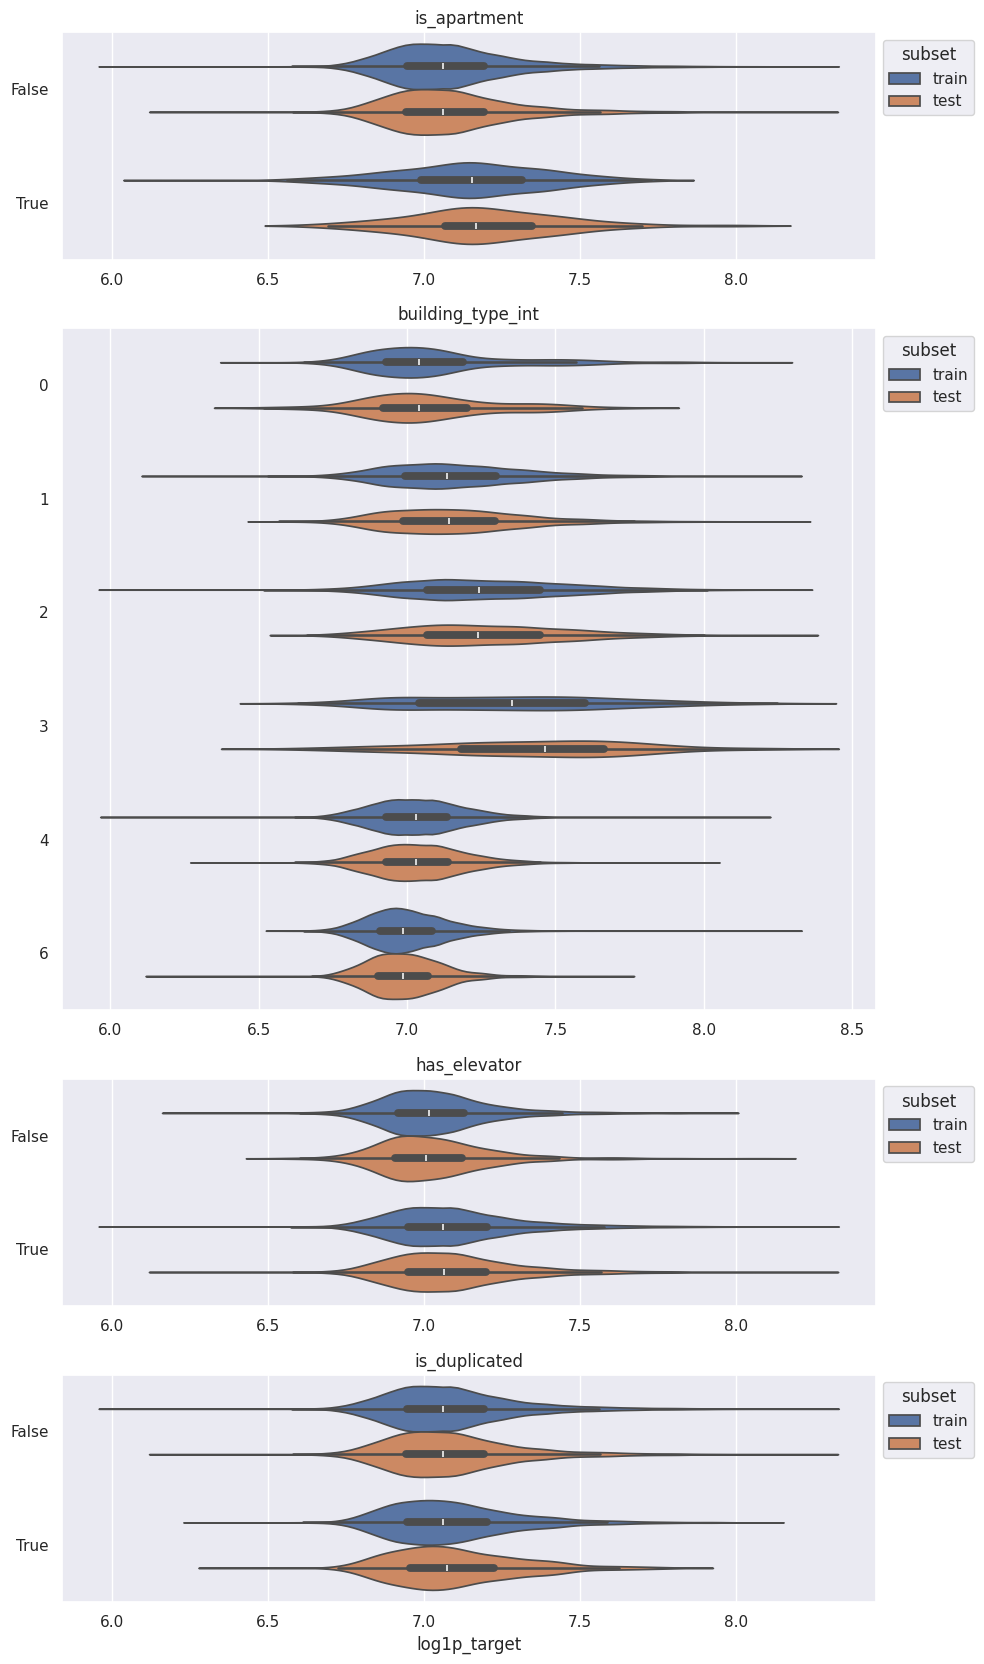

2024-09-30 16:14:04,322 INFO: custom_violin_multiplot saved to ../artifacts/eda/target_col_and_cat_feats_violinplot.png


In [58]:
custom_violin_multiplot(
    data=df,
    x=config["target_col"],
    columns=cat_cols,
    hue='subset',
    k=1.4,
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir,
            "target_col_and_cat_feats_violinplot.png",
        )
    ),
)


1. The apartments are slightly more expensive with also a lower variance of the price,  
which correlates with the fact that the apartments are of a better quality
2. building_type categories can be sorted by the price in the following order: 6, 4, 0, 1, 2, 3.  
    This means that quite rare buildings of type 3 have more expensive flats, while most common buildings of type 4 have cheaper flats
3. Buildings with elevators have more expensive flats, although the variance of the price is higher
4. is_duplicated does not affect the price expect for a slightly lower variance in the price
5. Properites with both 0 kitchen area and living are have a slightly higher price with higher variance

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>

В принципе лифт и апартаменты - эти признаки не повлияют на обучение, т.к. слишком сильный дисбаланс

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Чисто по EDA можно так и подумать, однако обе фичи либо в чистом виде, либо в сочетании с другими фичами по итогу остались в финальном наборе признаков. Так что я их оставляю

</div>

### Correlation analysis

In [59]:
cat_cols = [
    "is_apartment",
    "building_type_int",
    "has_elevator",
    "is_duplicated",
]
num_cols = [
    "kitchen_area",
    "living_area",
    "total_area",
    "build_year",
    'flats_count',
    'ceiling_height',
    'latitude',
    'longitude',
]
num_discrete_cols = [
    "floor",
    "floors_total",
    "rooms",
]

interval columns not set, guessing: ['kitchen_area', 'living_area', 'total_area', 'build_year', 'flats_count', 'ceiling_height', 'latitude', 'longitude', 'floor', 'floors_total', 'rooms', 'building_type_int', 'log1p_target']


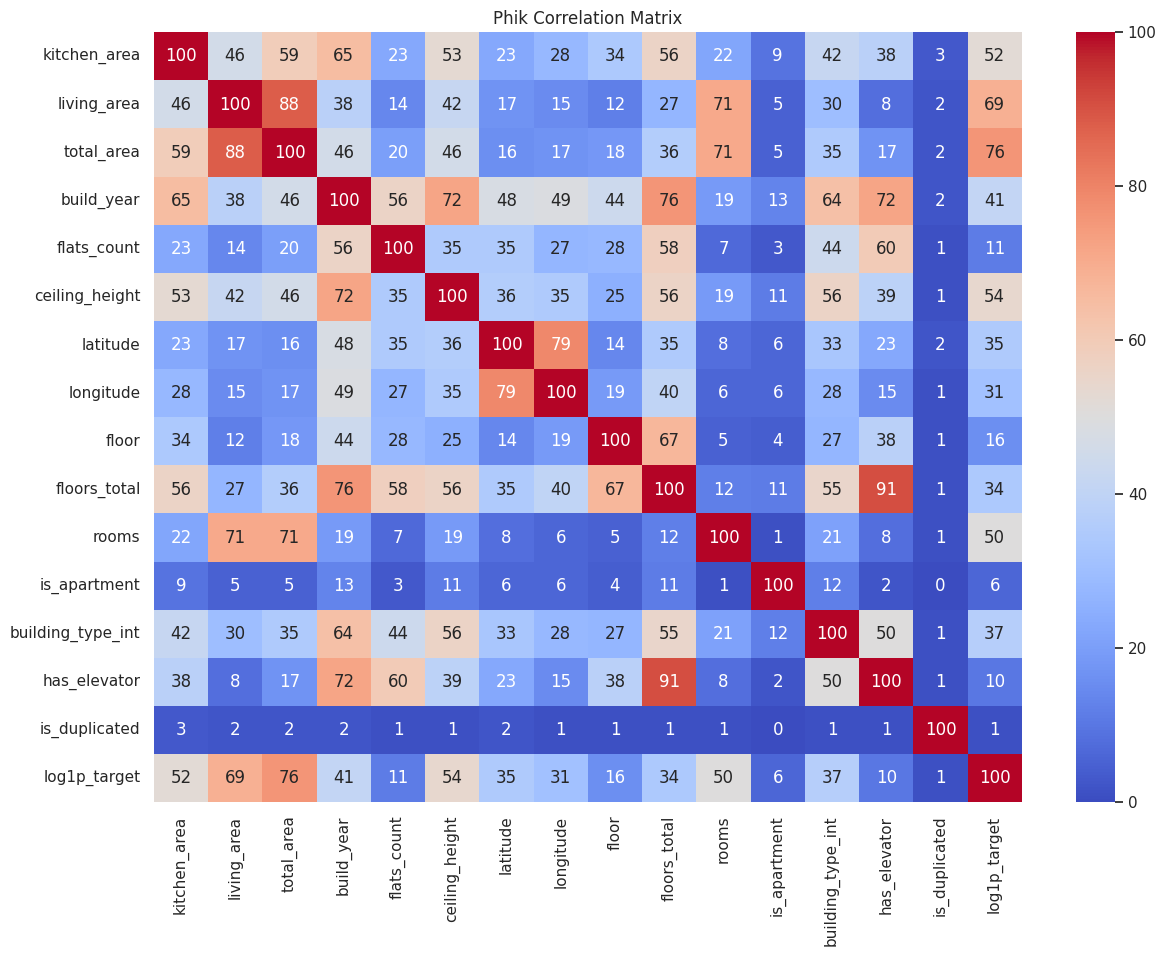

In [60]:
phik_matrix = df.query("subset == 'train'")[num_cols + num_discrete_cols + cat_cols + [config['target_col']]].phik_matrix() * 100

fig = plt.figure(figsize=(14, 10))
matrix = sns.heatmap(phik_matrix.astype(int), annot=True, cmap='coolwarm', fmt='d')
plt.title("Phik Correlation Matrix")
plt.show()
fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, 'phik_correlation_matrix.png')), bbox_inches='tight')

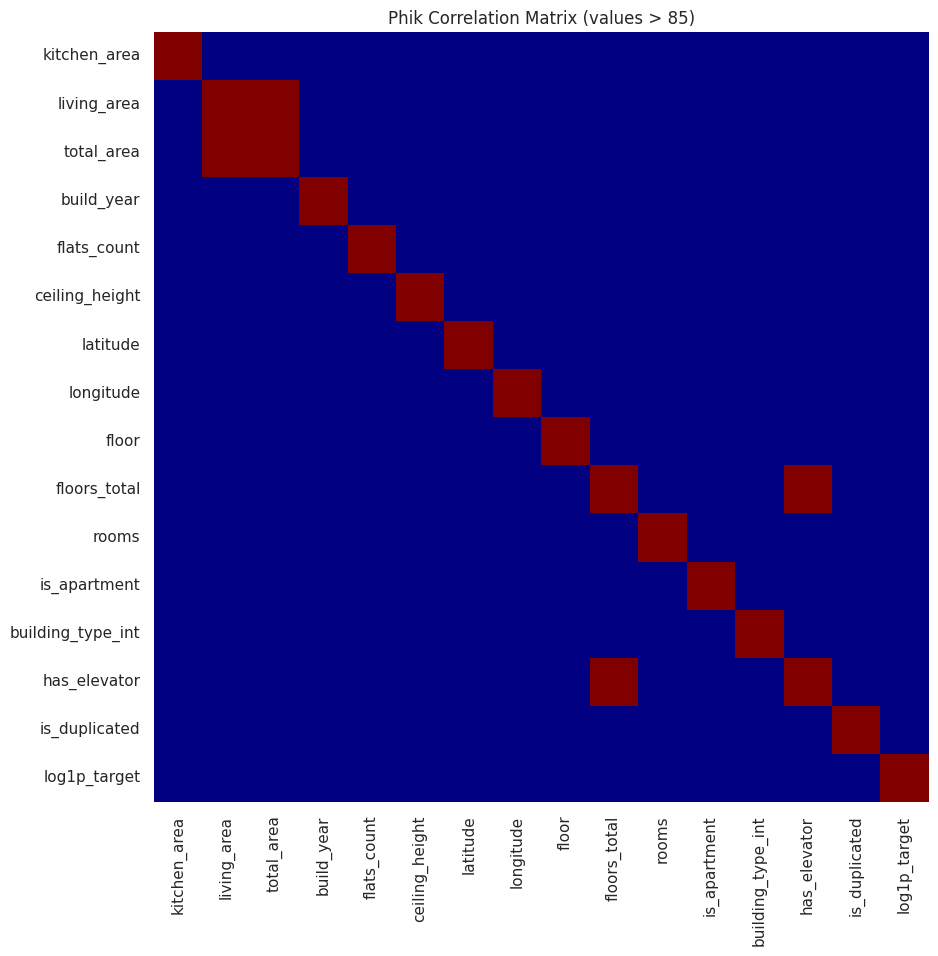

In [61]:
threshold = 85
fig = plt.figure(figsize=(10, 10))
matrix = sns.heatmap(phik_matrix > threshold, cmap='jet', cbar=False)
plt.title(f"Phik Correlation Matrix (values > {threshold})")
plt.show()

fig.savefig(Path(os.path.join(env_vars.eda_artifacts_dir, f'phik_correlation_matrix_more_than_{threshold}.png')), bbox_inches='tight')

The following high correlations with a target feature can be observed:
- total_area, kitchen_area, living_area: very obvious correlation, the more the area the higher the price (see also the graphs earlier)
- ceiling_height: the same idea (see also the graphs earlier)
- rooms: the same idea (see also the graphs earlier)

Here are some other interesting observations:
- high correlation between has_elevator and floors_total: high enough builidings always have elevators
- high correlation between build_year and floors_total: newer buildings usually higher with more floors than older ones
- high correlation between build_year and ceiling_height: too old buildings had higher ceilingsa and after that the ceiling height significantly decreased
- high correlation between total_area and rooms: a very obvious correlation
- is_duplicated and is_apartment features have very little effect on other features

<font color='#d0863b'> There are probably no known statistical test to check the significance of this correlation. Therefore, let's simply define that a correlation is significant if it is above 85%.
It to consider values less than that (so that more features are dropped), it was tested that the model performance did not improve, but also decreased.
As a result, the following features will be removed from the dataset (will be done in the feature engineering part):
- has_elevator
- living_area

</font>

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>

Отлично! Главноне не забыть избавиьтся от мультиколлинеарности.

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Я думал над избавлением от мультиколлинеарности, однако как я слышал продвинутые модели бустинга (в том числе CatBoost) менее чувствительны к мультиколлинеарности чем другие модели и могут хорошо работать в таком случае. Поэтому я изначально решил оставить все признаки. Хотя можно ради интереса тестануть эту идею. Я уберу сильно коррелирующие признаки - тк я не нашел статистических тестов на значимость фи-к корреляции, то я буду считать, что признаки с корреляцией выше 0.85 сильно коррелируют. Если же рассматривать меньшие значения порога, то хоть и больше сильно коррелирующих признаков будут убрано, но это только ухудшит качество модели по итогу

</div>

## 2.5. Conclusions on EDA

The following important notes can be made:
1. The following features have a high correlation with the target feature:
- total_area, ceiling_height, living_area, kitchen_area, rooms
2. The following features have a very low correlation with the target feature:
- is_duplicated, is_apartment
3. An average flat can be described as follows:
- located within Moscow
- located in a building built in the 70s-80s with a typical characteristics of the residential buildings built in that period
- ceiling height is about 2.6-2.7m
- number of floors is about 14-17
- total_area is about 52-57 $m^2%$ with half of the total area being the living area
- price is about 15 million rubles
4. The distributon of the target feature is close to be normal, which is a good sign.  
5. The distribution of all features is similar if to compare train and test subsets  
6. The price is higher, if:
- the area is larger
- the ceiling is higher
- the number of rooms is larger
- the flat is closer to the center of Moscow
- the building is too old or built in the near past
- the building type is 3
- it is an apartment
7. A flat is rare if:
- it is an apartment
- the building type is 0 or 3
- the number of rooms is larger than 4
- the building is too old or too high
8. There is a significant amount of flats with 0 kitchen and living areas.  
<font color='#d0863b'> Properties are probably used for commercial purposes with 0 value for living area.  
The corresponding rows have been removed from the dataset. </font>
9. It is a good idea to create the following features:
- the distance from the center of Moscow to the flat
- the distance from the nearest metro station to the flat
10. The following high-correlated features will be removed in the featuure engineering stage:
- has_elevator
- living_area

## 2.6. Logging artefacts via MLflow

First off, let's save tests results, which compare the distributions on the train and test subsets

In [62]:
df2 = compare_distributions(data=df, features=num_cols+num_discrete_cols+[config['target_col']], hue='subset', are_categorical=False)
df2.to_csv(os.path.join(env_vars.eda_artifacts_dir, 'train_test_distr_comparison_for_num_feats.csv'), index=False)

df2 = compare_distributions(data=df, features=cat_cols, hue='subset', are_categorical=True)
df2.to_csv(os.path.join(env_vars.eda_artifacts_dir, 'train_test_distr_comparison_for_cat_feats.csv'), index=False)

Saving main statistics of the numerical features

In [63]:
df2 = df.query('subset == "train"')[num_cols+num_discrete_cols+[config['target_col']]].describe()
df2.to_csv(os.path.join(env_vars.eda_artifacts_dir, 'num_feats_statistics_train.csv'), index=False)

df2 = df.query('subset == "test"')[num_cols+num_discrete_cols+[config['target_col']]].describe()
df2.to_csv(os.path.join(env_vars.eda_artifacts_dir, 'num_feats_statistics_test.csv'), index=False)

In [64]:
counts = {}
for subset in ['train', 'test']:
    counts[subset] = {}
    for col in cat_cols:
        d = df.query(f'subset == "{subset}"')[col].value_counts().reset_index().to_dict()
        d[col] = dict([(v, d['count'][k]) for (k, v) in d[col].items()])
        del d['count']
        counts[subset][col] = d[col]
save_yaml(data=counts, path=Path(os.path.join(env_vars.eda_artifacts_dir, 'cat_feats_statistics.yaml')))

2024-09-30 16:22:38,853 INFO: Dictionary has been saved to YAML file ../artifacts/eda/cat_feats_statistics.yaml


<font color='#d0863b'> Saving data in case of any transformations have been applied to the data </font>

In [10]:
df.to_csv(os.path.join(env_vars.eda_artifacts_dir, "df_after_eda.csv"), index=False)

Saving plots that can be grouped together

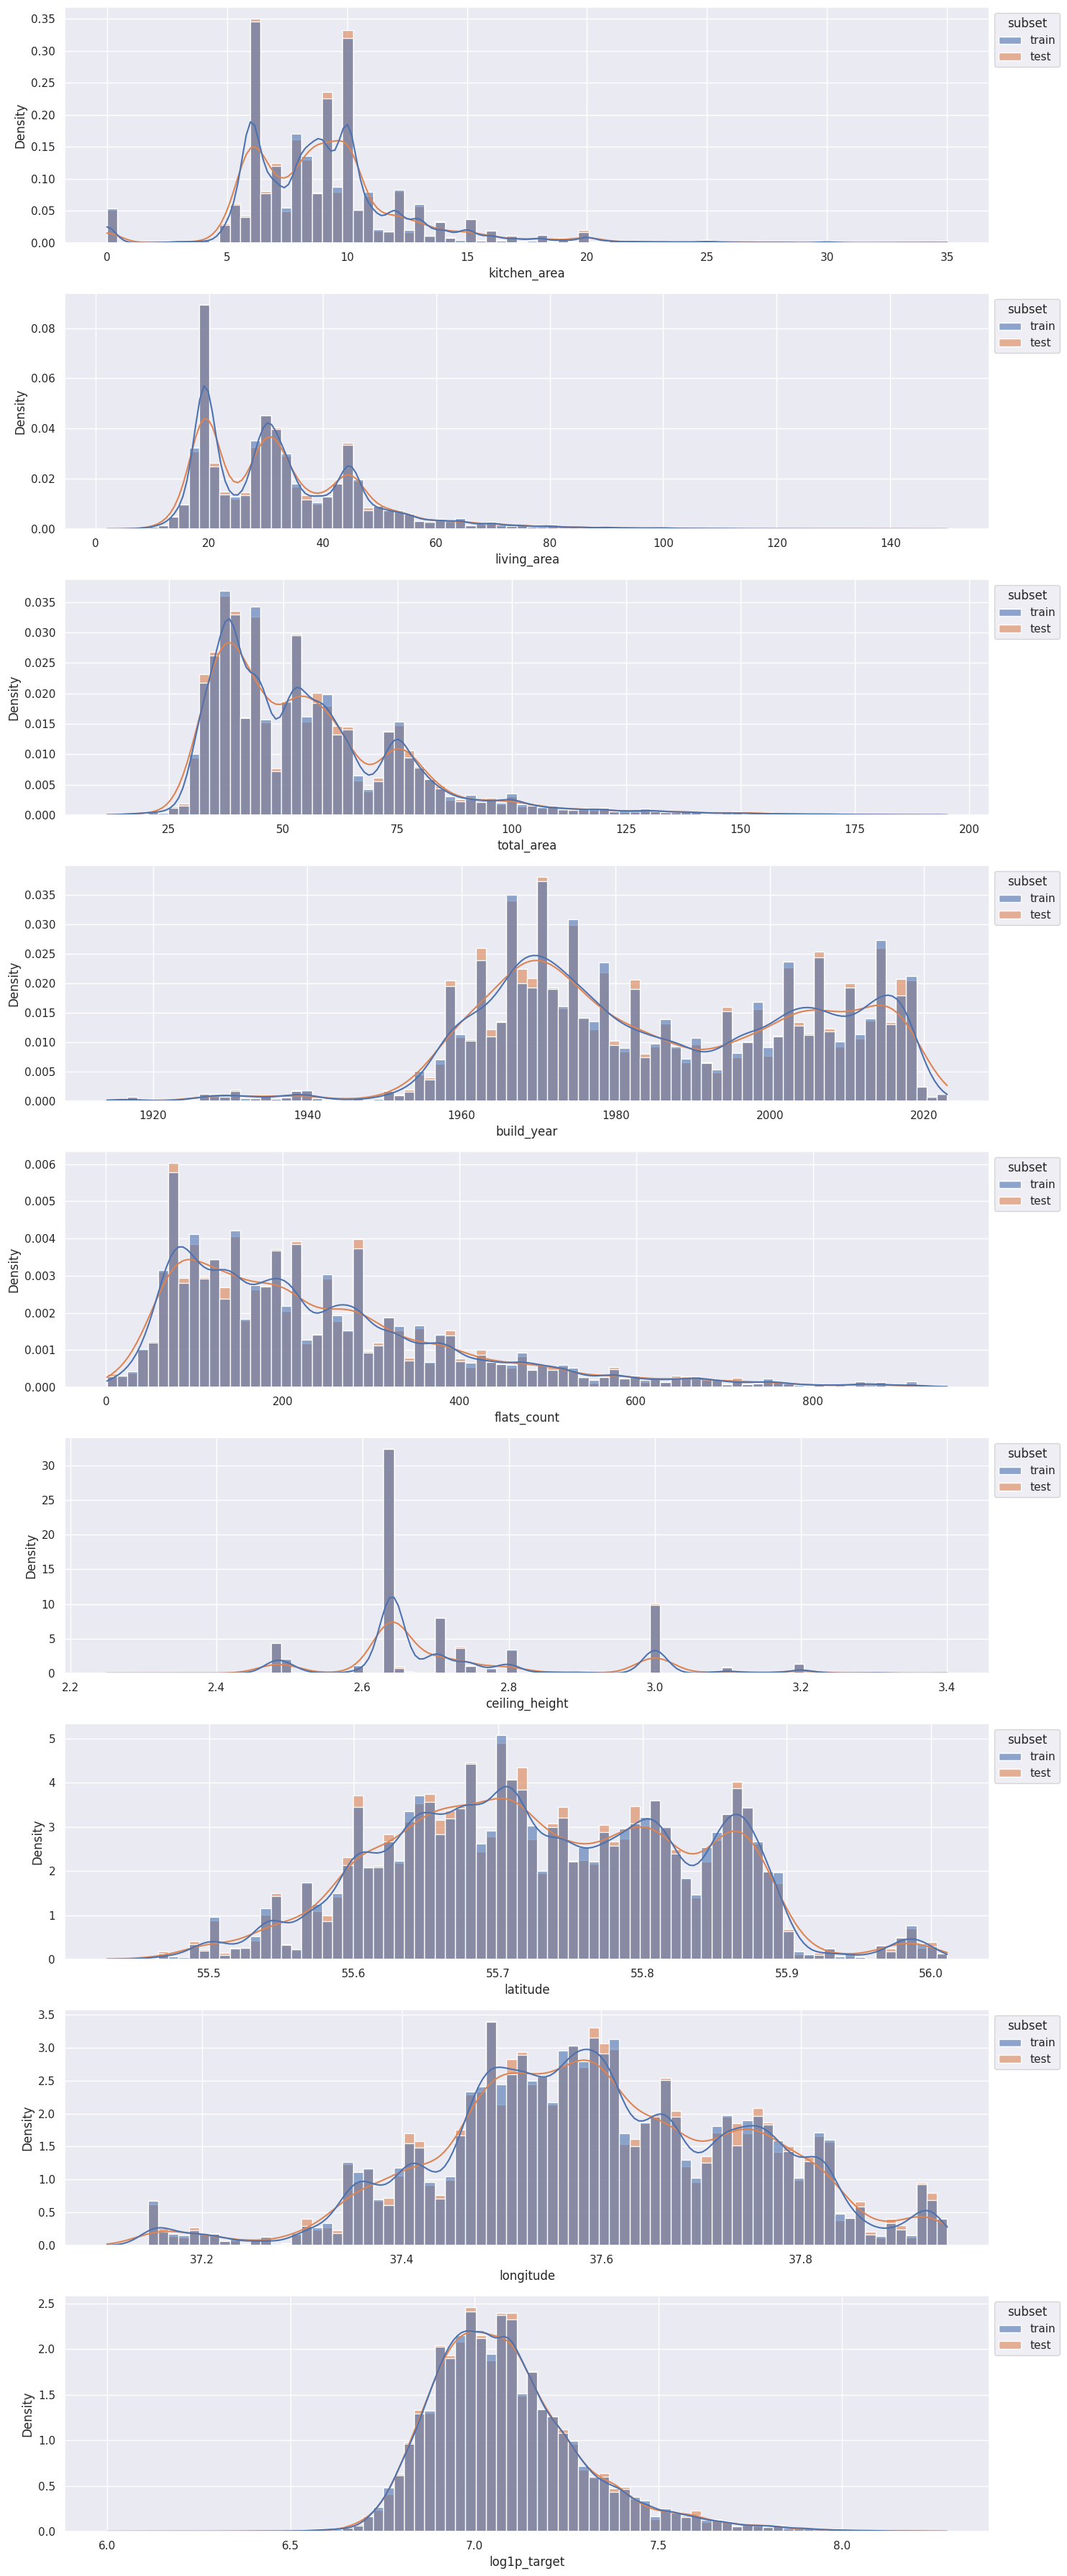

2024-09-28 17:37:50,436 - mlflow_project - INFO - custom_hist_multiplot saved to ../artifacts/eda/num_feats_histplot.png


2024-09-28 17:37:50,436 INFO: custom_hist_multiplot saved to ../artifacts/eda/num_feats_histplot.png


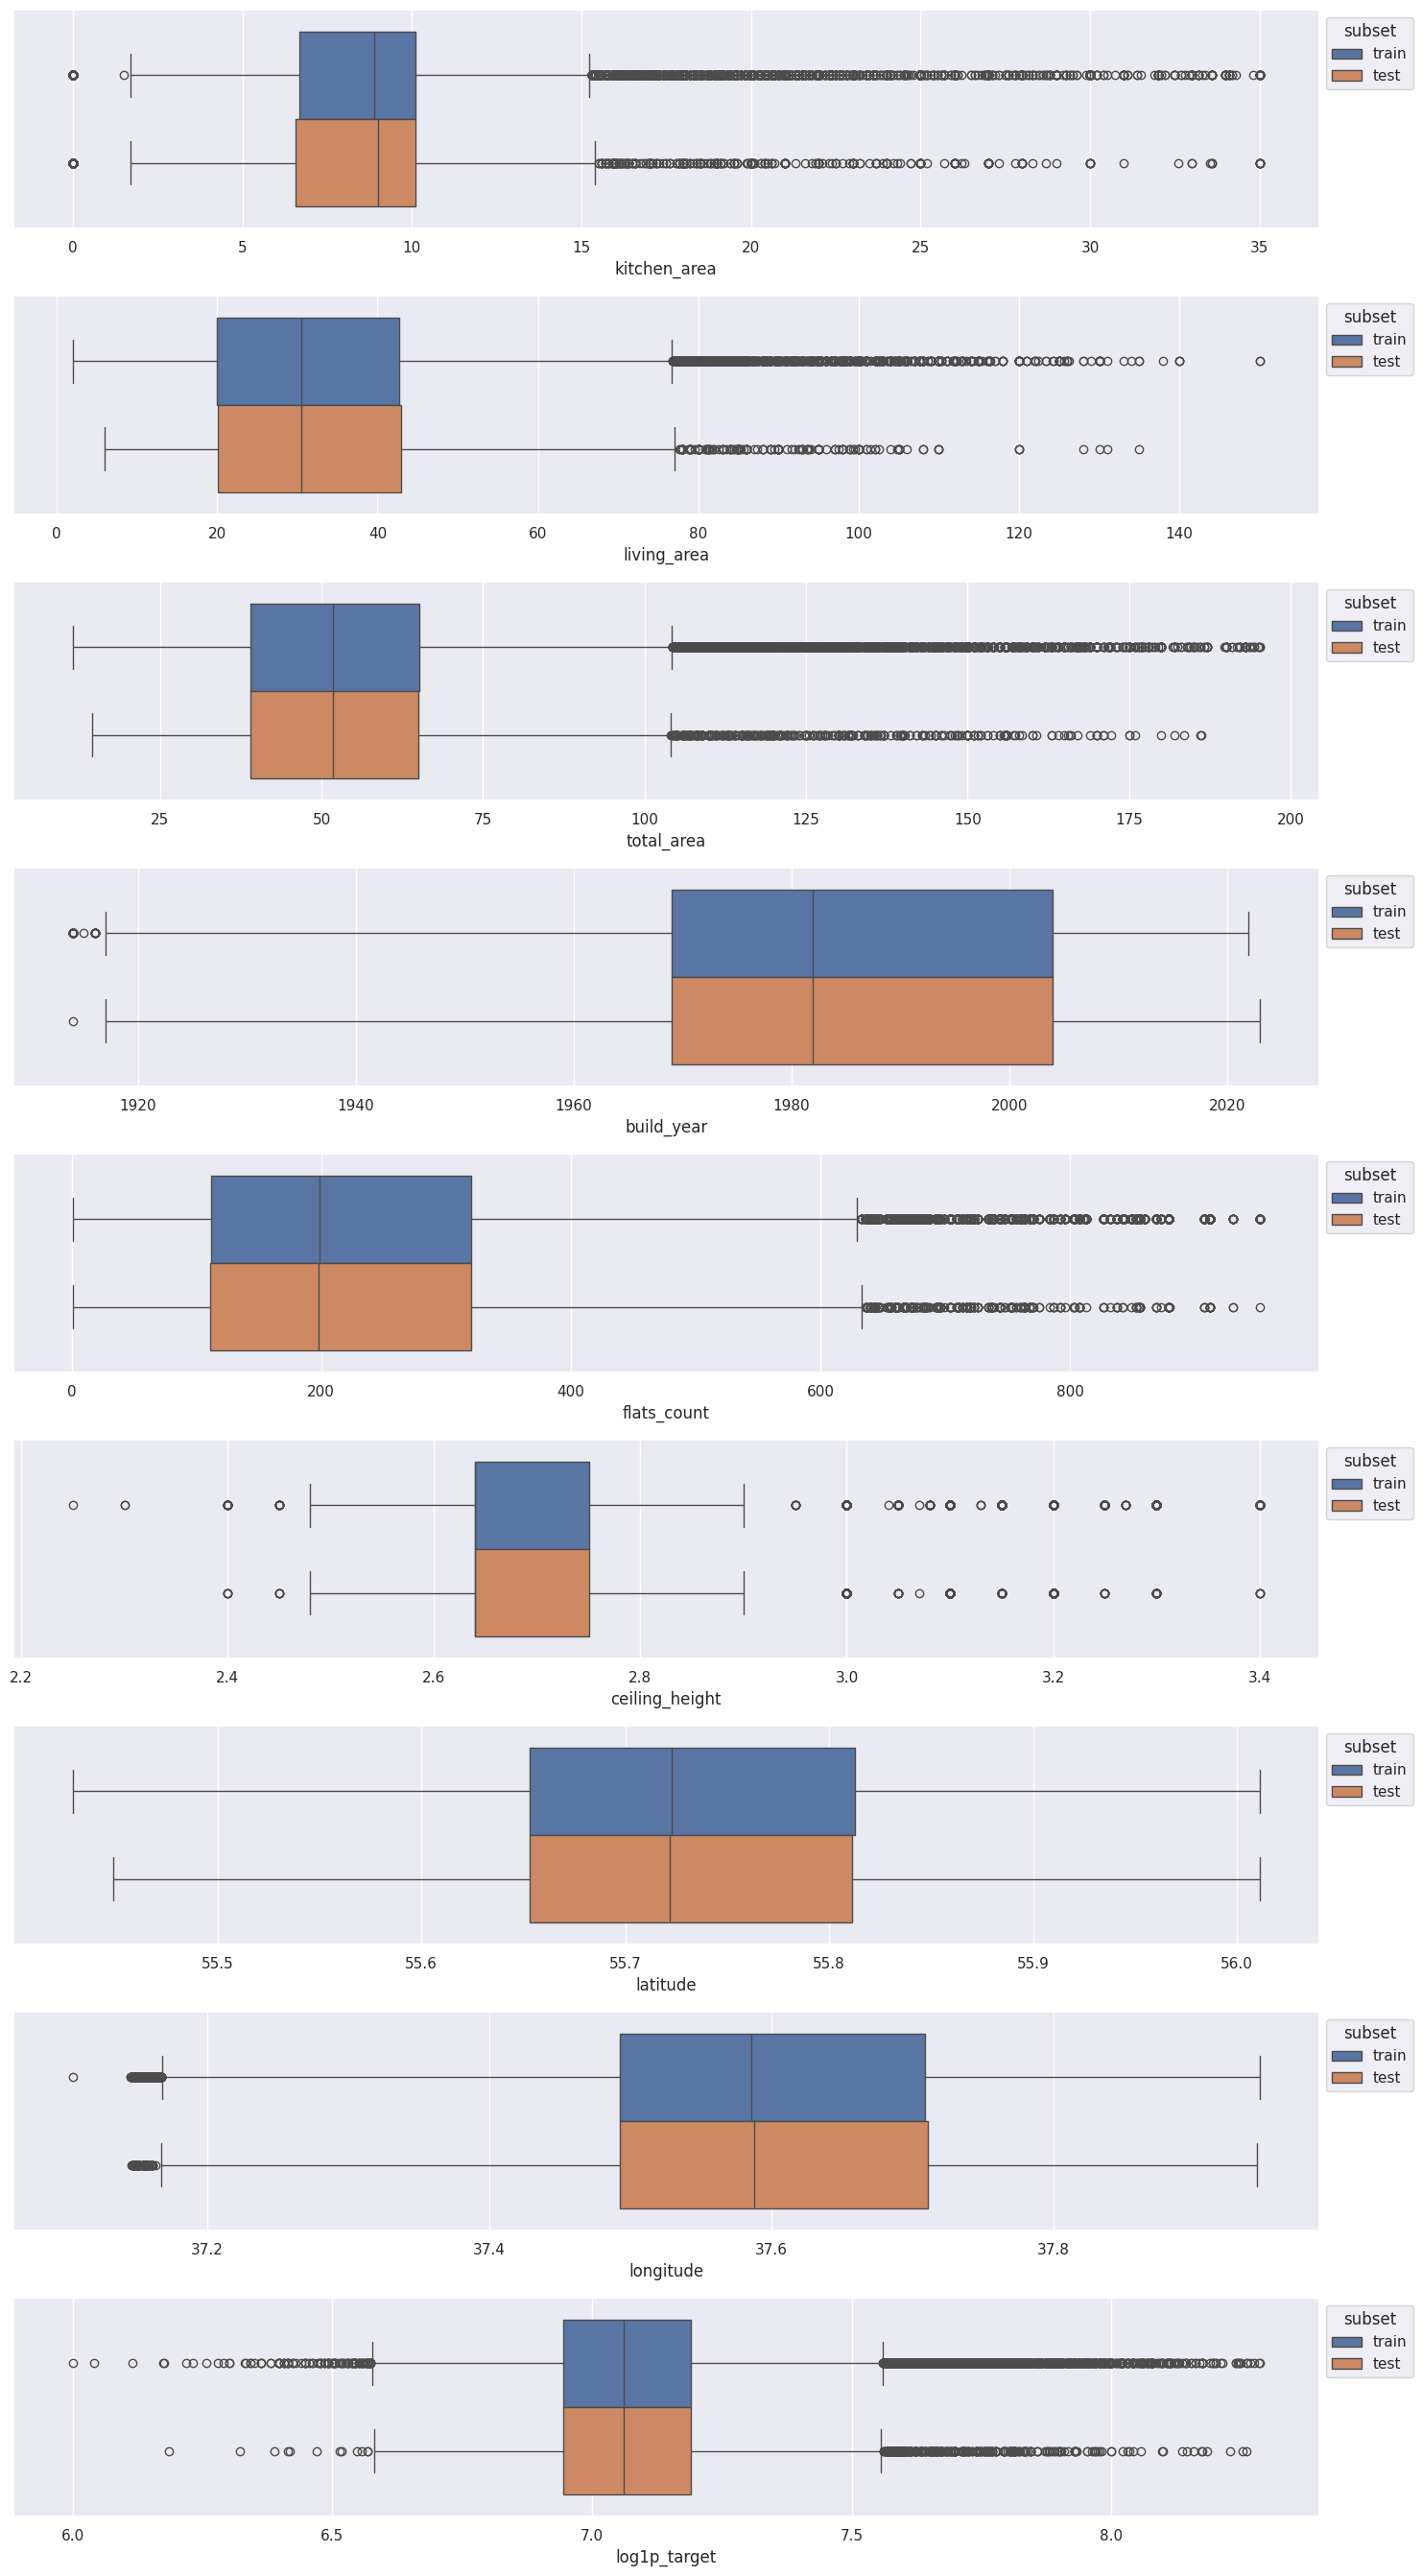

2024-09-28 17:37:55,419 - mlflow_project - INFO - custom_box_multiplot saved to ../artifacts/eda/num_feats_boxplot.png


2024-09-28 17:37:55,419 INFO: custom_box_multiplot saved to ../artifacts/eda/num_feats_boxplot.png


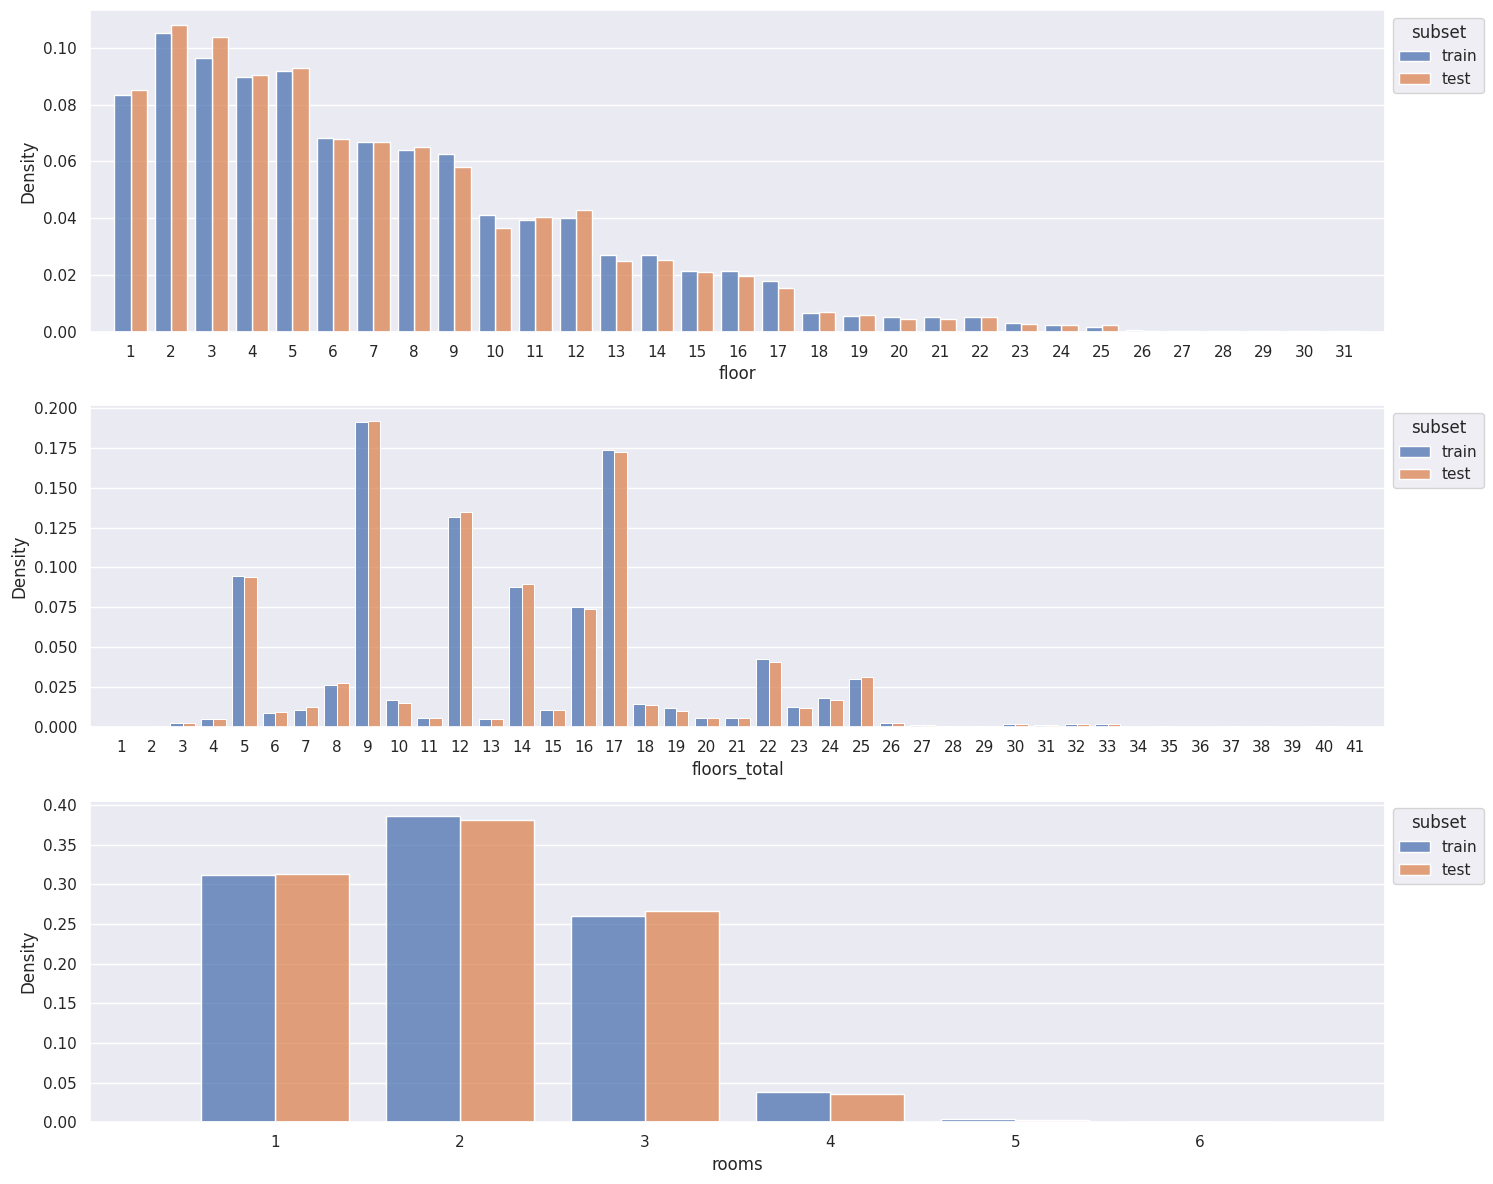

2024-09-28 17:37:57,708 - mlflow_project - INFO - custom_hist_multiplot saved to ../artifacts/eda/num_discrete_feats_histplot.png


2024-09-28 17:37:57,708 INFO: custom_hist_multiplot saved to ../artifacts/eda/num_discrete_feats_histplot.png


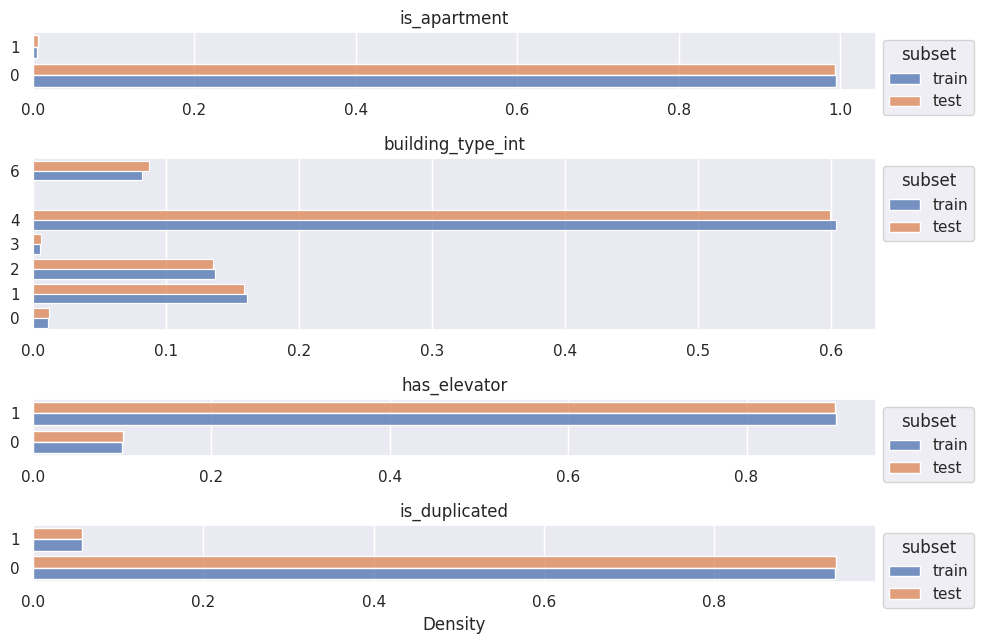

2024-09-28 17:37:59,346 - mlflow_project - INFO - custom_hist_multiplot saved to ../artifacts/eda/cat_feats_histplot.png


2024-09-28 17:37:59,346 INFO: custom_hist_multiplot saved to ../artifacts/eda/cat_feats_histplot.png


In [99]:
custom_hist_multiplot(
    data=df,
    columns=num_cols + [config["target_col"]],
    hue="subset",
    features_kind="num",
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir, "num_feats_histplot.png"
        )
    ),
)

custom_box_multiplot(
    data=df,
    columns=num_cols + [config["target_col"]],
    hue="subset",
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir, "num_feats_boxplot.png"
        )
    ),
)

custom_hist_multiplot(
    data=df,
    columns=num_discrete_cols,
    hue="subset",
    features_kind="cat",
    cat_orient="v",
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir, "num_discrete_feats_histplot.png"
        )
    ),
)

custom_hist_multiplot(
    data=df,
    columns=cat_cols,
    hue="subset",
    features_kind="cat",
    cat_orient="h",
    savepath=Path(
        os.path.join(
            env_vars.eda_artifacts_dir,
            "cat_feats_histplot.png",
        )
    ),
)

Let's log all the artefacts

In [12]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)

with mlflow.start_run(run_name=config['run_names']['eda'], experiment_id=experiment_id) as run:

    # Logging the artifacts
    mlflow.log_artifacts(
        local_dir=env_vars.eda_artifacts_dir, 
        artifact_path=config['default_artifact_dir']
    )
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging scripts
    mlflow.log_artifacts(
        local_dir='../scripts',
        artifact_path=f"{config['default_artifact_dir']}/scripts"
    )

    # Logging notebook
    mlflow.log_artifact(
        local_path=os.path.join(os.getcwd(), '2_model_improvement.ipynb'),
        artifact_path=config['default_artifact_dir']
    )

    logger.info('EDA artifacts have been logged')

2024-09-30 16:34:52,818 INFO: Experiment 'flat_price' exists


2024-09-30 16:34:53,056 INFO: Found credentials in environment variables.
2024-09-30 16:34:55,266 INFO: EDA artifacts have been logged


<font color='#d0863b'> Since about 12 % of rows have been dropped after EDA, it is better to train the baseline model again </font>

In [18]:
model = read_pkl(Path('../models/baseline.pkl'))
results = eval_model(
    model=model,
    X_train=df.query('subset == "train"'),
    X_test=df.query('subset == "test"'),
    y_train=df.query('subset == "train"')[config['target_col']],
    y_test=df.query('subset == "test"')[config['target_col']],
    cv=5,
)

2024-09-30 16:47:53,230 INFO: Model ../models/baseline.pkl has been loaded


2024-09-30 16:48:05,045 INFO: Test metrics: {'test_mae': 0.07127086514845032, 'test_rmse': 0.08837025860366955, 'test_mape': 0.010058184348509445, 'test_r2': 0.8224385190991853}


[CV] END .................................................... total time=  11.8s
[CV] END .................................................... total time=   7.3s
[CV] END .................................................... total time=   7.9s
[CV] END .................................................... total time=  11.8s


2024-09-30 16:48:51,593 INFO: CV metrics: {'fit_time': 9.1829, 'score_time': 0.1221, 'cv_mae': 0.0715, 'cv_rmse': 0.0894, 'cv_mape': 0.0101, 'cv_r2': 0.8196}


[CV] END .................................................... total time=   7.8s


In [20]:
params = dict(
    [
        (f"{step_name}__{param_name}", param_value)
        for step_name, step in results['model'].named_steps.items()
        for param_name, param_value in step.get_params().items()
    ]
)

<font color='#d0863b'> Logging new baseline model </font>

In [22]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)

with mlflow.start_run(run_name=f"{config['run_names']['baseline']}_2", experiment_id=experiment_id) as run:

    # Logging scripts
    mlflow.log_artifacts(
        local_dir='../scripts',
        artifact_path=f"{config['default_artifact_dir']}/scripts"
    )

    # Logging notebook
    mlflow.log_artifact(
        local_path=os.path.join(os.getcwd(), '2_model_improvement.ipynb'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging config file
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging the ML model with metrics and params
    log_model_info(
        **results,
        client=client,
        registry_model_name=config['model_registry_name'],
        model_loader=mlflow.sklearn,
        metadata=None,
        params=params,
        model_tags={
            'model_type': 'baseline',
            'prediction_type': 'log10(1 + price)',
        },
    )

2024-09-30 16:50:26,443 INFO: Experiment 'flat_price' exists


2024-09-30 16:50:27,250 INFO: Metrics for model flat_price_model has been logged
2024-09-30 16:50:27,274 INFO: Paremeters for model flat_price_model has been logged
Registered model 'flat_price_model' already exists. Creating a new version of this model...
Created version '5' of model 'flat_price_model'.
2024-09-30 16:50:27,589 INFO: Model flat_price_model has been logged


# III. Feature Engineering

## 3.1-3.3 

<p style="font-size: 20px; color: green; font-family: Verdana; font-weight: bold;">Manual Feature Engineering</p>

As a result of EDA, the following new features will be considered:
- `dt.dist_to_center` = the distance from the center of Moscow to the flat
  This feature is calculated using a hand-written `DistanceTransformer`
- `cdt.dist_to_metro` = the distance from the nearest metro station to the flat
  This feature is calculated using a hand-written `ClosestDistanceTransformer`

Also, the following `PolynomialFeatures`, `KBinsDiscretizer` and `SplineTransformer` will be applied for the most important features according to EDA + latitude:
- `total_area`
- `kitchen_area`
- `ceiling_height`
- `build_year` (only `KBinsDiscretizer`)  

The resulting features will have `poly.`, `kbins.` and `spline.` prefixes, respectively.

The following categorical features will be encoded via `CatBoostEncoder`:
- `building_type_int`
- `kbins.total_area`
- `kbins.kitchen_area`
- `kbins.ceiling_height`
- `kbins.build_year`  

The resulting features will have `cbe.` prefix.

The following binary features will be encoded via `OrdinalEncoder` in order to move from boolean to numeric values:
- `is_apartment`
- `is_duplicated`

The resulting features will have `oe.` prefix.

Apart from that, let's consider new features, which are denoted as a normalization of the `total_area` based on group-wise aggregation in the following way for each observation:
$$fnew_{i} = \frac{f_{i} - f_{g, i}}{f_{g, i}}$$
where $i$ is the index of the observation, $f_{i}$ is the original feature, $f_{g, i}$ is the mean value of $f$ over a grouping column $g$ and $fnew_{i}$ is the new feature.
The following features will be considered as a grouping column:
- `kbins.build_year`
- `building_type_int`

<p style="font-size: 20px; color: green; font-family: Verdana; font-weight: bold;">Auto Feature Engineering</p>

`featuretools` library will be utilised. It will be used only for creating the building age feature via `scalar_subtract_numeric_feature` primitive for `build_year` feature.
The resulting features will have `ft.` prefix.

It is a good practice to generate new features using some common transformations.  
`autofeat` package can do so automatically. Moreover, it performs feature selection  
internally so that only the most important new features are left as a result.  
Let's consisder the following transformations:
- '1/'
- 'log'
- 'cos'
- 'sin'
Apart from that, `autofeat` automatically generates multiplication or division for all different pairs of features.


It is possible to consider a lot more transformations, but it leads to a problem with a computational resources' limitations. <font color='#d0863b'> As for features, all numerical features will be considered except for ones that must be dropped according to correlation analysis in EDA </font>   
- `ft.2024 - build_year` (generated by `featuretools`)
- `flats_count`
- `total_area`
- `kitchen_area`
- `ceiling_height`
- `latitude`
- `longitude`
- `floors_total`
- `rooms`
- `floor`  
Since there is no a prebuilt transformer for `autofeat`, a hand-written `AutoFeatTransformer` will be used.
<font color='#d0863b'> Additionally, all highly correlated features will be dropped - this functionality is implemented in the transformer. </font> 
The resulting features will have `aft.` prefix.


<p style="font-size: 20px; color: green; font-family: Verdana; font-weight: bold;">Dropping features</p>

Finally, it is required to drop unnecessary features:
- `living_area` (high correlation with `total_area`)
- `has_elevator` (high correlation with `floors_total`)
- `id` (it is just an identifier)
- `building_id` (it is just an identifier)
- `subset` (it is just an identifier)
- `build_year` (a new building age feature is calculated using this feature)
- `is_apartment` (it is encoded via `OrdinalEncoder`)
- `is_duplicated` (it is encoded via `OrdinalEncoder`)
- `kbins.total_area` (it is encoded via `CatBoostEncoder`)
- `kbins.kitchen_area` (it is encoded via `CatBoostEncoder`)
- `kbins.ceiling_height` (it is encoded via `CatBoostEncoder`)
- `kbins.build_year` (it is encoded via `CatBoostEncoder`)
- `building_type_int` (it is encoded via `CatBoostEncoder`)

<font color='#d0863b'> Additionally, as the last step, a correlation filter is applied to drop highly correlated features. It is implemented as a part of `PassthroughTransformer`. </font>

`flat_id` column will not be dropped because at least one identifier column might be 
necessary later in order to separate one observation from another.

Numeric features will not be scaled since only tree-based models will be used later.


The whole feature engineering pipeline is parametrized via the configuration file `fe_config.yaml` with a help of functions and classes defined in the `transformers.py` module. This way the pipeline is more flexible and easy to maintain.

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>

Всё супер, спасибо что так подробно расписал!
Единственный момент - лучше избавляться от мультиколлинеарности, чем добавлять ее. Ты сам указал что площади коррелируют между собой, но на основе их все равно делаешь новые признаки. Если полином сформируется на основе тотал площади и жилой - получим еще один коррелирующий признак. Лучше оставить 1, и совмещать его с другими некоррелирующими.

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Пришлось повозиться, но я по итогу решил, что лучше всего будет просто добавить фильтр на основе корреляции. Он включен как часть `AutoFeatTransformer` и работает на основе коэффициентов корреляции Спирмена (использовал этот в виду быстроты вычислений и того, что в любом случае будут фильтроваться только числовые признаки). Также включил аналогичный фильтр как последний шаг в `Pipeline`.

Также решил избавиться от генерации признаков с помощью `FeatureToolsTransformer` (кроме получения building age), тк они в любом случае будут генерироваться в `AutoFeatTransformer` и там же фильтроваться.

Добавлю, что я пытался играться с различными вариантами генерации фичей и фильтрации, но как итог модель после генерации всех фичей не сильно улучшалась. Если бы было еще больше времени, то возможно и можно было бы что-то более дельное придумать

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Круто, что ты рассчитываешь расстояние до станции метро! Как ты это делаешь, расскажи подробнее, где берешь координаты станций?

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Начнём с того, что есть много различных способов получить координаты станций. В моем случаем я использовал API от HH.ru, с помощью которого можно в принципе получить координаты любой станции метро в РФ. Спаршенные данные я сохраняю в DataFrame.
Далее необходимо для каждой точки в данных быстрым способом найти ближайшую станцию метро и расстояние до неё. Расстояние естественно считал c помощью функции haversine. Для определения того, какая станция ближайшая, я использовал библиотеку scipy, а именно spatial.cKDTree - kd-tree для супер быстрого поиска ближайшего соседа. Все бы хорошо, но есть проблема в том, что в этом случае нет возможности задать метрику haversine. Поэтому я решил перед тем, как запустить поиск, перевести (широту и долготу) в декартовы координаты - таким образом смогу использовать spatial.cKDTree только для поиска ближайшего соседа по евклидовой метрике. Так для каждой точки в данных я получаю айди ближайшей станции метро, а дальше уже не сложно посчитать расстояние до неё.

</div>

In [6]:
df = pd.read_csv('../artifacts/eda/df_after_eda.csv')

In [6]:
df_test = df.query('subset == "test"').reset_index(drop=True)
df_train = df.query('subset == "train"').reset_index(drop=True)
del df

In [7]:
len(df_test), len(df_train)

(11008, 98644)

In [8]:
fe_config = read_yaml(Path(f"{env_vars.config_dir}/fe_config.yaml"))
pipeline = get_transforming_pipeline(**fe_config)
df_train2 = pipeline.fit_transform(df_train, df_train[config['target_col']].values)
df_test2 = pipeline.transform(df_test)

2024-10-01 12:38:17,464 INFO: YAML file ../config/fe_config.yaml has been loaded


2024-10-01 12:38:18,919 INFO: [FeatureToolsTransformer] [transform] Generated 1 features out of 1.
2024-10-01 12:38:19,048 INFO: [PassthroughTransformer] [fit] Left 12 features out of 20 after dropping specified columns.
2024-10-01 12:38:19,050 INFO: [PassthroughTransformer] [transform] Passed 12 features out of 20
2024-10-01 12:38:19,534 INFO: [FeatureNormaliserTransformer] [fit] Calculated aggregations for 2 new features.
2024-10-01 12:38:21,328 INFO: [FeatureNormaliserTransformer] [transform] Calculated 2 features out of 1.
2024-10-01 12:38:21,331 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2024-10-01 12:38:21,331 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2024-10-01 12:38:21,336 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 820 features.
2024-10-01 12:38:21,337 INFO: [AutoFeat] With 98644 data points this new feature matrix would use about 

2024-10-01 12:38:23,473 INFO: [feateng] Generated 38 transformed features from 10 original features - done.
2024-10-01 12:38:23,493 INFO: [feateng] Step 2: first combination of features


2024-10-01 12:38:28,231 INFO: [feateng] Generated 1118 feature combinations from 1128 original feature tuples - done.


2024-10-01 12:38:29,515 INFO: [feateng] Generated altogether 1159 new features in 2 steps
2024-10-01 12:38:29,516 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2024-10-01 12:38:30,537 INFO: [feateng] Generated a total of 542 additional features


[featsel] Scaling data...

2024-10-01 12:38:31,346 INFO: [featsel] Feature selection run 1/5


done.


2024-10-01 12:39:11,817 INFO: [featsel] Feature selection run 2/5
2024-10-01 12:39:55,661 INFO: [featsel] Feature selection run 3/5
2024-10-01 12:40:53,290 INFO: [featsel] Feature selection run 4/5
2024-10-01 12:41:38,491 INFO: [featsel] Feature selection run 5/5
2024-10-01 12:42:24,857 INFO: [featsel] 190 features after 5 feature selection runs
2024-10-01 12:42:34,487 INFO: [featsel] 167 features after correlation filtering
2024-10-01 12:42:43,043 INFO: [featsel] 152 features after noise filtering
2024-10-01 12:42:43,045 INFO: [AutoFeat] Computing 150 new features.


2024-10-01 12:43:09,999 INFO: [AutoFeat]   150/  150 new features ...done.
2024-10-01 12:43:10,100 INFO: [AutoFeat] Final dataframe with 160 feature columns (150 new).
2024-10-01 12:43:10,101 INFO: [AutoFeat] Training final regression model.
2024-10-01 12:43:13,994 INFO: [AutoFeat] Trained model: largest coefficients:
2024-10-01 12:43:13,995 INFO: 25.208217780093253
2024-10-01 12:43:13,996 INFO: -13.819587 * log(ceiling_height)/ceiling_height
2024-10-01 12:43:13,997 INFO: -4.044950 * sin(latitude)*cos(latitude)
2024-10-01 12:43:13,997 INFO: 3.897775 * log(rooms)/total_area
2024-10-01 12:43:13,998 INFO: -2.390833 * rooms/total_area
2024-10-01 12:43:13,999 INFO: -2.390213 * 1/(floor*total_area)
2024-10-01 12:43:13,999 INFO: 2.275176 * cos(longitude)
2024-10-01 12:43:14,000 INFO: 1.636076 * 1/(flats_count*ft2024build_year)
2024-10-01 12:43:14,001 INFO: 1.397540 * sin(ceiling_height)/floors_total
2024-10-01 12:43:14,001 INFO: 1.339582 * 1/(floors_total*ft2024build_year)
2024-10-01 12:43:14

2024-10-01 12:43:14,951 INFO: [AutoFeat]   150/  150 new features ...done.
2024-10-01 12:43:28,716 INFO: [AutoFeatTransformer] [fit] Left 40 features out of 160 after correlation filtering. Input columns were not kept.
2024-10-01 12:43:28,719 INFO: [AutoFeatTransformer] [transform] Generated 40 features out of 10
2024-10-01 12:43:28,723 INFO: [AutoFeat] Computing 150 new features.


2024-10-01 12:43:29,579 INFO: [AutoFeat]   150/  150 new features ...done.
2024-10-01 12:43:29,691 INFO: [PassthroughTransformer] [fit] Left 38 features out of 42 after dropping specified columns.
2024-10-01 12:43:29,692 INFO: [PassthroughTransformer] [transform] Passed 38 features out of 42


2024-10-01 12:43:33,187 INFO: [PassthroughTransformer] [fit] Left 63 features out of 84 after correlation filtering.
2024-10-01 12:43:33,188 INFO: [PassthroughTransformer] [transform] Passed 63 features out of 84
2024-10-01 12:43:33,350 INFO: [FeatureToolsTransformer] [transform] Generated 1 features out of 1.
2024-10-01 12:43:33,363 INFO: [PassthroughTransformer] [transform] Passed 12 features out of 20
2024-10-01 12:43:33,367 INFO: [DataFrameTransformer] [transform] Generated 42 features out of 20.
2024-10-01 12:43:33,539 INFO: [FeatureNormaliserTransformer] [transform] Calculated 2 features out of 1.
2024-10-01 12:43:33,541 INFO: [AutoFeatTransformer] [transform] Generated 40 features out of 10
2024-10-01 12:43:33,544 INFO: [AutoFeat] Computing 150 new features.


2024-10-01 12:43:33,754 INFO: [AutoFeat]   150/  150 new features ...done.
2024-10-01 12:43:33,761 INFO: [PassthroughTransformer] [transform] Passed 38 features out of 42
2024-10-01 12:43:33,767 INFO: [DataFrameTransformer] [transform] Generated 84 features out of 42.
2024-10-01 12:43:33,770 INFO: [PassthroughTransformer] [transform] Passed 63 features out of 84
2024-10-01 12:43:33,775 INFO: [DataFrameTransformer] [transform] Generated 63 features out of 84.


In [9]:
pipeline

Pipeline(steps=[('step1',
                 DataFrameTransformer(transformers=[('poly.',
                                                     PolynomialFeatures(degree=[2,
                                                                                2],
                                                                        include_bias=False),
                                                     ['total_area',
                                                      'kitchen_area',
                                                      'ceiling_height']),
                                                    ('spline.',
                                                     SplineTransformer(n_knots=3),
                                                     ['total_area',
                                                      'kitchen_area',
                                                      'ceiling_height']),
                                                    ('kbins.',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      strategy='uniform'),
                                                     ['total_area',
                                                      'kitchen_area',...
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f7f969cf0>)])),
                ('step3',
                 DataFrameTransformer(transformers=[('',
                                                     PassthroughTransformer(corr_threshold=0.85,
                                                                            drop_cols=[],
                                                                            ignore_cols=['flat_id',
                                                                                         'log1p_target'],
                                                                            passthrough_cols=['flat_id',
                                                                                              'log1p_target']),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f7f9699f0>)]))])

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Круто придумал как построить пайплайн! Очень профессионально выглядит

</div>

Retrieving parameters from the model.
Since the value limit is not that big, the dictionary with parameters will be flattened

In [10]:
params_pipeline = dict(
    [
        (f"{step_name}__{param_name}", param_value if len(f"{param_value}") <= 500 else f"{param_value}"[:496]+" ...")
        for step_name, step in pipeline.named_steps.items()
        for param_name, param_value in step.get_params().items()
    ]
)
params_pipeline

{'step1__transformers': "[('poly.', PolynomialFeatures(degree=[2, 2], include_bias=False), ['total_area', 'kitchen_area', 'ceiling_height']), ('spline.', SplineTransformer(n_knots=3), ['total_area', 'kitchen_area', 'ceiling_height']), ('kbins.', KBinsDiscretizer(encode='ordinal', strategy='uniform'), ['total_area', 'kitchen_area', 'ceiling_height', 'build_year']), ('ft.', FeatureToolsTransformer(trans_primitives=[{'name': 'ScalarSubtractNumericFeature',\n                                           'params': {'value':  ...",
 'step1__poly.': PolynomialFeatures(degree=[2, 2], include_bias=False),
 'step1__spline.': SplineTransformer(n_knots=3),
 'step1__kbins.': KBinsDiscretizer(encode='ordinal', strategy='uniform'),
 'step1__ft.': FeatureToolsTransformer(trans_primitives=[{'name': 'ScalarSubtractNumericFeature',
                                            'params': {'value': 2024}}]),
 'step1__dt.': DistanceTransformer(distance_metric_name='haversine_dist2',
                     in_featu

Let's save the transformed data into the artifacts folder.

In [11]:
df_train2.to_csv(os.path.join(env_vars.fe_artifacts_dir, "df_train_after_fe.csv"), index=False)
df_test2.to_csv(os.path.join(env_vars.fe_artifacts_dir, "df_test_after_fe.csv"), index=False)

Let's log the preprocessor with the corresponding artifacts

In [32]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)

with mlflow.start_run(run_name=config['run_names']['fe']['preprocessor'], experiment_id=experiment_id) as run:

    # Logging artifacts
    mlflow.log_artifact(
        local_path=env_vars.fe_artifacts_dir,
        artifact_path=config['default_artifact_dir']
    )

    # Logging scripts
    mlflow.log_artifacts(
        local_dir='../scripts',
        artifact_path=f"{config['default_artifact_dir']}/scripts"
    )

    # Logging notebook
    mlflow.log_artifact(
        local_path=os.path.join(os.getcwd(), '2_model_improvement.ipynb'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging the config file
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'fe_config.yaml'),
        artifact_path=config['default_artifact_dir']
    )
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )
    logger.info(f'Logged artifacts from fe stage (preprocessor part)')

    # Logging the pipeline preprocessor 
    log_model_info(
        model=pipeline,
        client=client,
        registry_model_name=config['fe_preprocessor_registry_name'],
        model_loader=mlflow.sklearn,
        input_example=df_test[:10],
        prediction=df_test2[:10],
        metrics=None,
        params=params_pipeline,
        metadata=None,
    )

2024-09-30 16:59:06,746 INFO: Experiment 'flat_price' exists


2024-09-30 16:59:08,792 INFO: Logged artifacts from fe stage (preprocessor part)
2024-09-30 16:59:08,793 WARNING: No metrics provided for model flat_price_feat_eng_pipeline
2024-09-30 16:59:09,256 INFO: Paremeters for model flat_price_feat_eng_pipeline has been logged
2024/09/30 16:59:09 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'flat_price_feat_eng_pipeline' already exists. Creating a new version of this model...
Created version '2' of model 'flat_price_feat_eng_pipeline'.
2024-09-30 16:59:09,597 INFO: Model flat_price_feat_eng_pipeline has been logged


## 3.4 New model version training

Let's discuss the evaluation metrics.   
It is important to note, that not the price, but the logarithm of the price is considered as a target variable.   
It was shown, that this transformation "removes" the outliers - the resulting distribution contains   
very few outliers which are close to the mean.
With this transformation, the ML model can be more robust to outliers - it can work well both for very low and very high prices, which are less common.
Therefore, common metrics, like MAE, RMSE, R2, which are sensitive to outliers, can be used in this case.
MAPE metric still can be used since it is less sensitive to outliers and the distribution lies far from zero.
For interpretability reasons, R2 metric will be used as the main metric, while other will be secondary.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Соглашусь, верно!

    
</div>

In [8]:
# df_train2 = pd.read_csv(os.path.join(env_vars.fe_artifacts_dir, "df_train_after_fe.csv"))
# df_test2 = pd.read_csv(os.path.join(env_vars.fe_artifacts_dir, "df_test_after_fe.csv"))

Training and evaluating the model

In [12]:
results = eval_model(
    model=CatBoostRegressor(random_state=42, verbose=False),
    X_train=df_train2.drop(columns=['flat_id', config['target_col']]),
    X_test=df_test2.drop(columns=['flat_id', config['target_col']]),
    y_train=df_train2[config['target_col']],
    y_test=df_test2[config['target_col']],
    cv=5,
)

2024-10-01 12:44:07,107 INFO: Test metrics: {'test_mae': 0.07078829397813992, 'test_rmse': 0.08771721413688272, 'test_mape': 0.009991080476696957, 'test_r2': 0.8250531404418269}


[CV] END .................................................... total time=  22.0s
[CV] END .................................................... total time=  19.0s
[CV] END .................................................... total time=  21.3s
[CV] END .................................................... total time=  18.0s


2024-10-01 12:45:47,204 INFO: CV metrics: {'fit_time': 19.982, 'score_time': 0.0301, 'cv_mae': 0.0712, 'cv_rmse': 0.089, 'cv_mape': 0.01, 'cv_r2': 0.8212}


[CV] END .................................................... total time=  19.8s


<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Ты сначала обучил модель, получил метрики на тесте. А затем делаешь кросс валидацию, для чего? Интересны твои рассуждения.

</div>

<div class="alert alert-info">
<h2> Комментарий студента v1 </h2>

Я провожу кросс-валидацию, чтобы лишни раз убедиться, что нет аномального переобучения на обучающих данных.  
Такое может вполне произойти даже при дефолтных параметрах модели. Тем более, что после генерации признаков, количество признаков на много увеличилось, что в свою очередь тоже может привести к переобучению.

</div>

Retrieving feature importances since they are not logged automatically.

In [13]:
df_importances = pd.DataFrame()
df_importances['feature'] = results['model'].feature_names_
df_importances['importance'] = results['model'].feature_importances_
df_importances.sort_values(by='importance', ascending=False, inplace=True)
df_importances.set_index('feature', inplace=True)
df_importances = df_importances.to_dict()['importance']

Logging the ML model

In [15]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)

with mlflow.start_run(run_name=config['run_names']['fe']['model'], experiment_id=experiment_id) as run:

    # Logging scripts
    mlflow.log_artifacts(
        local_dir='../scripts',
        artifact_path=f"{config['default_artifact_dir']}/scripts"
    )

    # Logging notebook
    mlflow.log_artifact(
        local_path=os.path.join(os.getcwd(), '2_model_improvement.ipynb'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging the importances
    mlflow.log_dict(
        dictionary=df_importances,
        artifact_file=f"{config['default_artifact_dir']}/df_importances.json"
    )
    logger.info(f'Logged artifacts from fe stage (model stage)')

    # Logging config file
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging the ML model with metrics and params
    log_model_info(
        **results,
        client=client,
        registry_model_name=config['model_registry_name'],
        model_loader=mlflow.catboost,
        params=results['model'].get_params(),
        metadata=None,
        model_tags={
            'model_type': 'after_fe',
            'prediction_type': 'log10(1 + price)',
            'living_area': 'non-zero',
        },
    )

2024-10-01 12:47:34,715 INFO: Experiment 'flat_price' exists
2024-10-01 12:47:35,061 INFO: Found credentials in environment variables.
2024-10-01 12:47:36,086 INFO: Logged artifacts from fe stage (model stage)
2024-10-01 12:47:36,609 INFO: Metrics for model flat_price_model has been logged
2024-10-01 12:47:36,627 INFO: Paremeters for model flat_price_model has been logged
Registered model 'flat_price_model' already exists. Creating a new version of this model...
Created version '7' of model 'flat_price_model'.
2024-10-01 12:47:37,621 INFO: Model flat_price_model has been logged


## 3.5 Models comparison

In [16]:
runs_df = mlflow.search_runs(experiment_ids=[experiment_id])
columns = ['tags.mlflow.runName'] + [k for k in runs_df.columns if k.startswith('metrics')][:-2]
runs_df = runs_df[columns].dropna(axis=0).set_index('tags.mlflow.runName').iloc[:2]
runs_df

metrics.cv_mape  metrics.score_time  metrics.cv_rmse   
tags.mlflow.runName                                                         
fe_model2                     0.0100              0.0301           0.0890  \
baseline_2                    0.0101              0.1221           0.0894   

                     metrics.cv_mae  metrics.fit_time  metrics.test_mape   
tags.mlflow.runName                                                        
fe_model2                    0.0712           19.9820           0.009991  \
baseline_2                   0.0715            9.1829           0.010058   

                     metrics.test_rmse  metrics.cv_r2  metrics.test_r2   
tags.mlflow.runName                                                      
fe_model2                     0.087717         0.8212         0.825053  \
baseline_2                    0.088370         0.8196         0.822439   

                     metrics.test_mae  
tags.mlflow.runName                    
fe_model2                    0.070788  
baseline_2                   0.071271

The model with all features generated after feature engineering is only slightly better than a baseline model.  
It is highly likely that this happened because there are too many features and the model overfits on the training data -  
as a result, the model is not able to generalize well enough on the test data.

Therefore it is important to perform a feature selection.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Выводы верные! Я тоже думаю, что метрик слишком много, част из них коррелируют.

</div>

# IV. Feature Selection

Reading logged data after the feature engineering stage

In [34]:
df_train = pd.read_csv(os.path.join(env_vars.fe_artifacts_dir, "df_train_after_fe.csv"))

df_test = pd.read_csv(os.path.join(env_vars.fe_artifacts_dir, "df_test_after_fe.csv"))

Splitting data into training and validation sets. 
The validation set won't be used for feature selection, but will be used for model tuning.

In [38]:
df, _ = train_test_split(
    df_train,
    test_size=config["data_split_config"]["val_size"],
    random_state=config["data_split_config"]["random_state"],
    stratify=pd.qcut(df_train[config["target_col"]], 10, labels=False),
    shuffle=True,
)
df.reset_index(inplace=True, drop=True)

In [63]:
df.shape

(88779, 63)

## 4.1 Internal Feature Importance

Retrieving importance data from the artifacts

In [25]:
run_id = runs_df[runs_df['tags.mlflow.runName'] == config['run_names']['fe']['model']]['run_id'].values[0]
local_path = mlflow.artifacts.download_artifacts(run_id=run_id, artifact_path=f"{config['default_artifact_dir']}/df_importances.json")
df_importances = pd.read_json(local_path, orient='index')
df_importances.reset_index(inplace=True)
df_importances.columns = ['feature', 'importance']

In [26]:
print('Total number of features: ', len(df_importances))
print('Number of features with > 1 importance value: ', len(df_importances.query('importance > 1')))
print('Ratio: ', len(df_importances.query('importance > 1'))/len(df_importances))

Total number of features:  61
Number of features with > 1 importance value:  12
Ratio:  0.19672131147540983


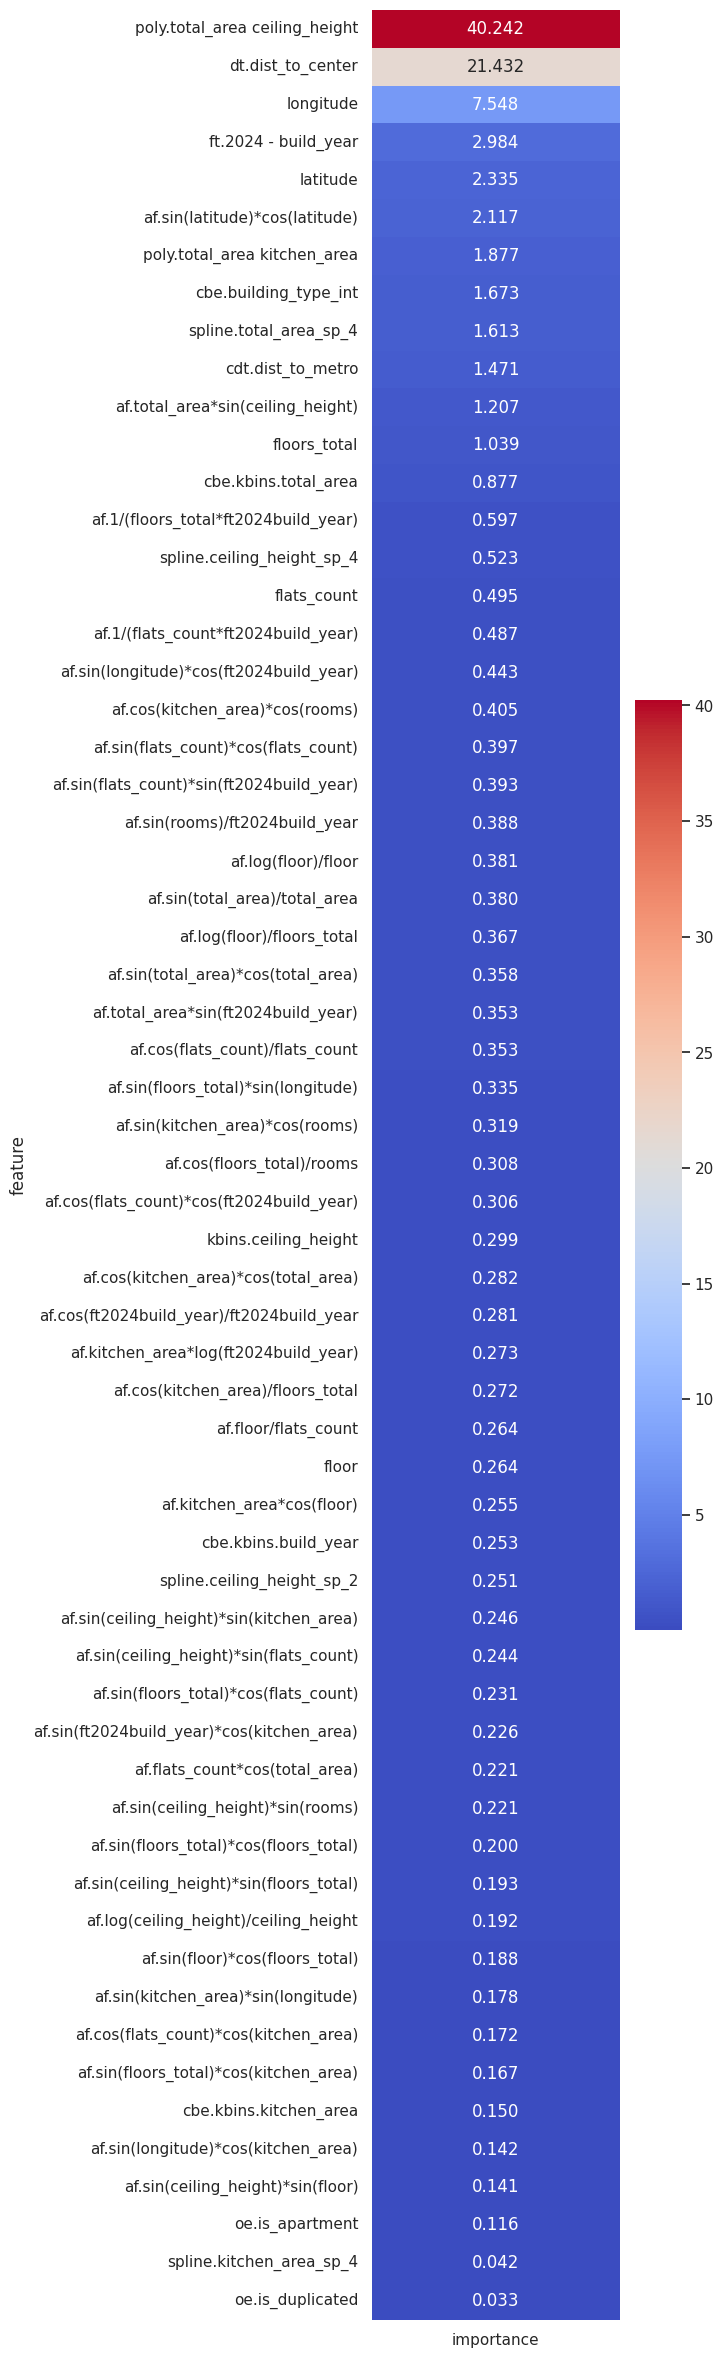

In [94]:
fig = plt.figure(figsize=(4, 30))
sns.heatmap(data=df_importances.set_index('feature')[['importance']], annot=True, cmap='coolwarm', fmt='.3f')
plt.show()
fig.savefig(os.path.join(env_vars.fs_artifacts_dir, 'internal_feature_importance.png'), bbox_inches='tight')

1. There are a lot of features with low importance. <font color='#d0863b'> Only 12 out 61 features have imprtance > 1. </font>
2. <font color='#d0863b'>Among the top 12 features, only 4 features are related to the `total_area`, which was the most important feature according to the correlation analysis. The presence is a lot less than in the previous experiment since correlation filtering was applied now. </font>
3. <font color='#d0863b'> `poly.total_area * ceiling_height` and `dt.dist_to_center` are the most important by a high margin. </font>
4. Two distance-related features with the both coordinates, the building age, encoded `building_type_int` and `floors_total` feature are also in the top 12 features.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Отлично! Но конечно коррелирующие переменные есть в топе, возможно если их взаимоисключить то метрики будут еще лучше. Например широта и долгота коррелируют с дистанцией, ну и признаки где есть высота потолка с площадью тоже.

</div>

Since we have a list of features sorted in the importance order, we can iteravely add  
the most important feature and see how the model performance changes.

To speed up the process, `CatBoostRegressor` will have lower `max_depth` and `iterations` hyperparameters.  <font color='#d0863b'> Evaluation will be done via the cross-validation approach since this process is not that long in this case</font>

In [32]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv = kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False))

for i in tqdm(list(range(1, len(df_importances)+1))):
    features = df_importances.iloc[:i]['feature'].tolist()
    model_ = CatBoostRegressor(max_depth=3, iterations=100, verbose=False, random_seed=42, thread_count=-1)
    cv_metrics = cross_validate(
        model_,
        df[features],
        df[config['target_col']],
        cv=kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False)),
        scoring={
            "neg_mae": make_scorer(
                mean_absolute_error, greater_is_better=False
            ),
            "neg_rmse": make_scorer(
                root_mean_squared_error, greater_is_better=False
            ),
            "neg_mape": make_scorer(
                mean_absolute_percentage_error, greater_is_better=False
            ),
            "r2": make_scorer(r2_score, greater_is_better=True),
        },
        n_jobs=1,
        verbose=0,
    )
    cv_metrics = mean_cv_scores(cv_metrics)
    for (k, v) in cv_metrics.items():
        df_importances.loc[i-1, k] = v
    df_importances.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_internal_importances.csv'), index=False)

  0%|          | 0/61 [00:00<?, ?it/s]

In [11]:
# df_importances = pd.read_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_internal_importances.csv'))

In [28]:
for i in tqdm(list(range(1, len(df_importances)+1))):
    features = df_importances.iloc[:i]['feature'].tolist()
    model_ = CatBoostRegressor(max_depth=3, iterations=100, verbose=False, random_seed=42, thread_count=-1)
    model_.fit(
        df.loc[train_val_index[0]][features], 
        df.loc[train_val_index[0]][config['target_col']]
    )
    metrics = calculate_metrics(
        df.loc[train_val_index[1]][config['target_col']], 
        model_.predict(df.loc[train_val_index[1]][features][features]),
        prefix='val_'
    )
    for (k, v) in metrics.items():
        df_importances.loc[i-1, k] = v
    df_importances.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_internal_importances.csv'), index=False)

  0%|          | 0/61 [00:00<?, ?it/s]

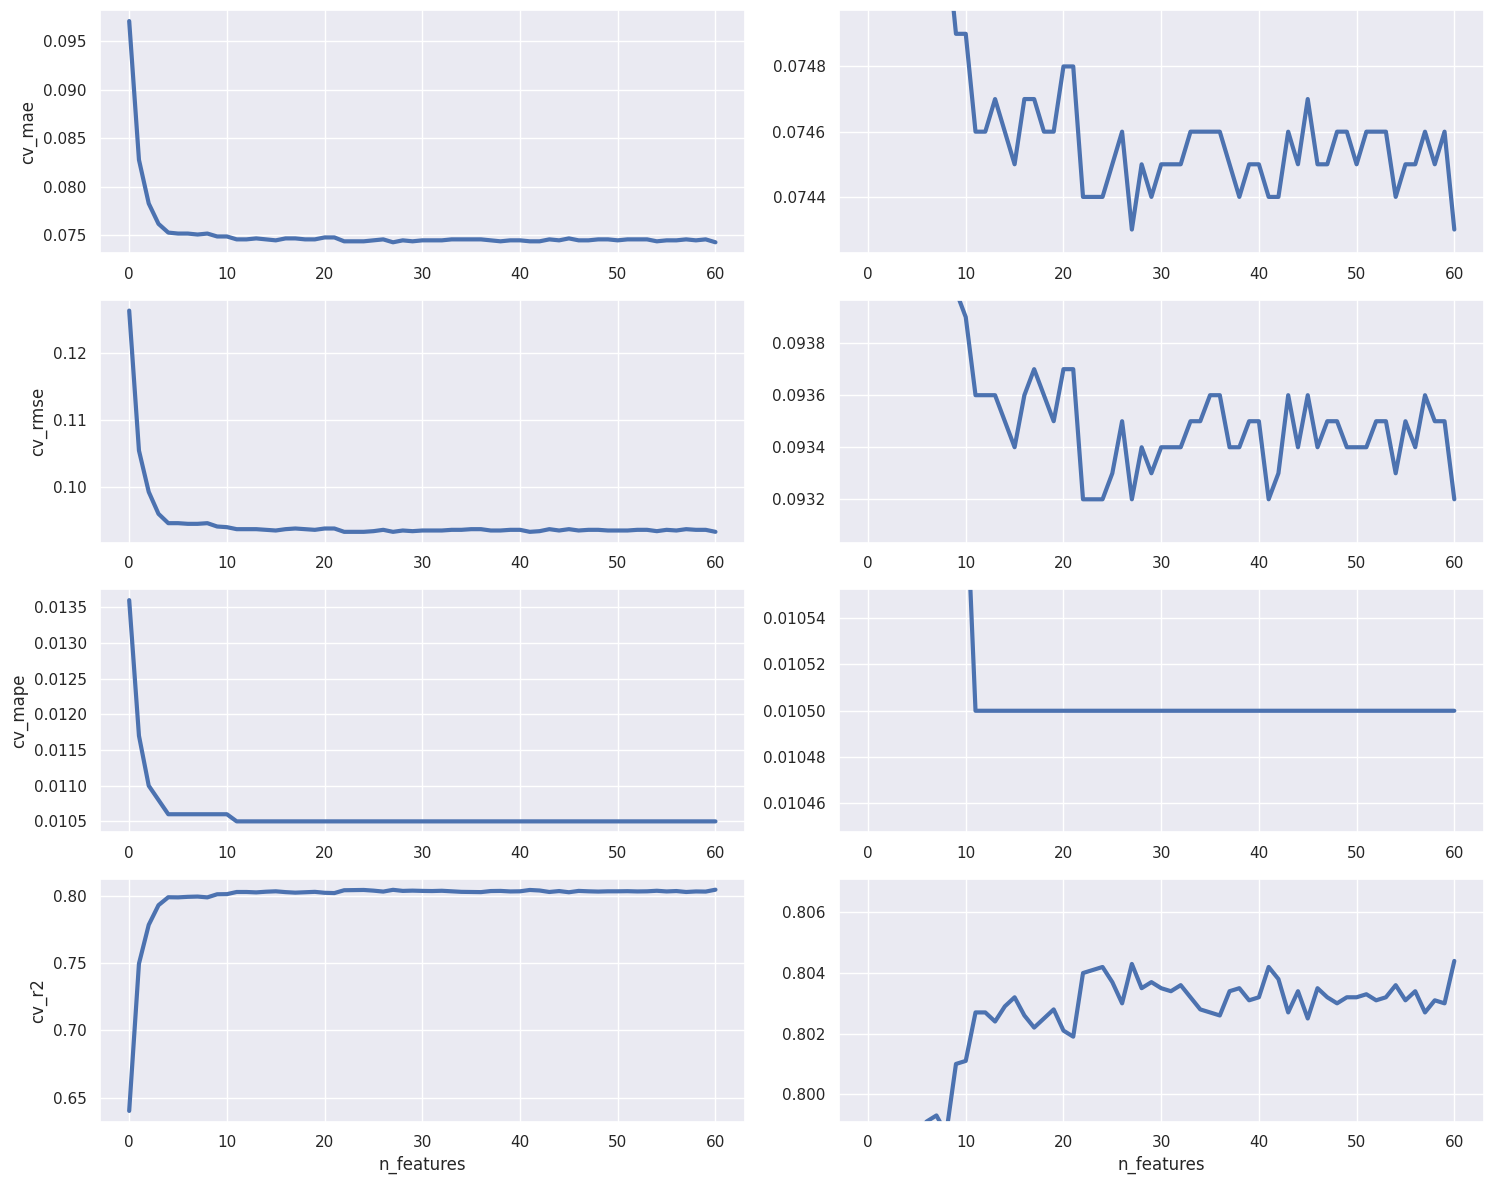

In [36]:
fig, axs = plt.subplots(len(df_importances.columns[-4:]), 2, figsize=(15, 3*len(df_importances.columns[-4:])))
for i, metric in enumerate(df_importances.columns[-4:]):
    sns.lineplot(data=df_importances, x=df_importances.index, y=metric, lw=3, ax=axs[i, 0])
    sns.lineplot(data=df_importances, x=df_importances.index, y=metric, lw=3, ax=axs[i, 1])
    axs[i, 0].set_xlabel('')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('')
    axs[i, 1].set_ylim(df_importances[metric].median()*0.995, df_importances[metric].median()*1.005)
axs[i, 0].set_xlabel('n_features')
axs[i, 1].set_xlabel('n_features')
fig.tight_layout()
plt.show()
fig.savefig(os.path.join(env_vars.fs_artifacts_dir, 'fs_internal_importances.png'), bbox_inches='tight')

In [16]:
for metric in df_importances.columns[-4:]:
    print(f"{metric}: {df_importances.sort_values(by=metric, ascending='r2' not in metric).head(5)[metric]}")

cv_mae: 27    0.0743
60    0.0743
22    0.0744
23    0.0744
29    0.0744
Name: cv_mae, dtype: float64
cv_rmse: 24    0.0932
27    0.0932
23    0.0932
22    0.0932
60    0.0932
Name: cv_rmse, dtype: float64
cv_mape: 12    0.0105
13    0.0105
14    0.0105
15    0.0105
11    0.0105
Name: cv_mape, dtype: float64
cv_r2: 60    0.8044
27    0.8043
24    0.8042
41    0.8042
23    0.8041
Name: cv_r2, dtype: float64


1. The metrics curves are stabilizing roughly after <font color='#d0863b'> 20 features </font> and then they fluctuates
2. <font color='#d0863b'> 27 features </font> looks like the best choice consifering all the metrics

In [17]:
features_fs_int_imp = df_importances.iloc[:27]['feature'].tolist()

## 4.2. Feature Permutation Importance

In [40]:
importances = []
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, val_index in tqdm(kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False)), total=kfold.n_splits):
    model = CatBoostRegressor(max_depth=3, iterations=100, random_state=42, verbose=False, thread_count=-1)
    model.fit(
        df.iloc[train_index].drop(columns=['flat_id', config['target_col']]),
        df.iloc[train_index][config['target_col']]
    )
    r = permutation_importance(
        model,
        df.iloc[val_index].drop(columns=['flat_id', config['target_col']]),
        df.iloc[val_index][config['target_col']],
        n_repeats=10,
        random_state=42
    )
    importances.append(r['importances_mean'])

importances = np.array(importances)

  0%|          | 0/3 [00:00<?, ?it/s]

In [41]:
df_perm_importances = pd.DataFrame()
df_perm_importances['feature'] = model.feature_names_
df_perm_importances['importance'] = importances.mean(axis=0) * 100
df_perm_importances.sort_values(by='importance', ascending=False, inplace=True)
df_perm_importances.reset_index(inplace=True, drop=True)

In [44]:
print('Total number of features: ', len(df_perm_importances))
print('Number of features with > 1 importance value: ', len(df_perm_importances.query('importance > 1')))
print('Ratio: ', len(df_perm_importances.query('importance > 1'))/len(df_perm_importances))

Total number of features:  61
Number of features with > 1 importance value:  6
Ratio:  0.09836065573770492


In [42]:
df_perm_importances.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_permutation_importances.csv'))

In [18]:
# df_perm_importances = pd.read_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_permutation_importances.csv'))

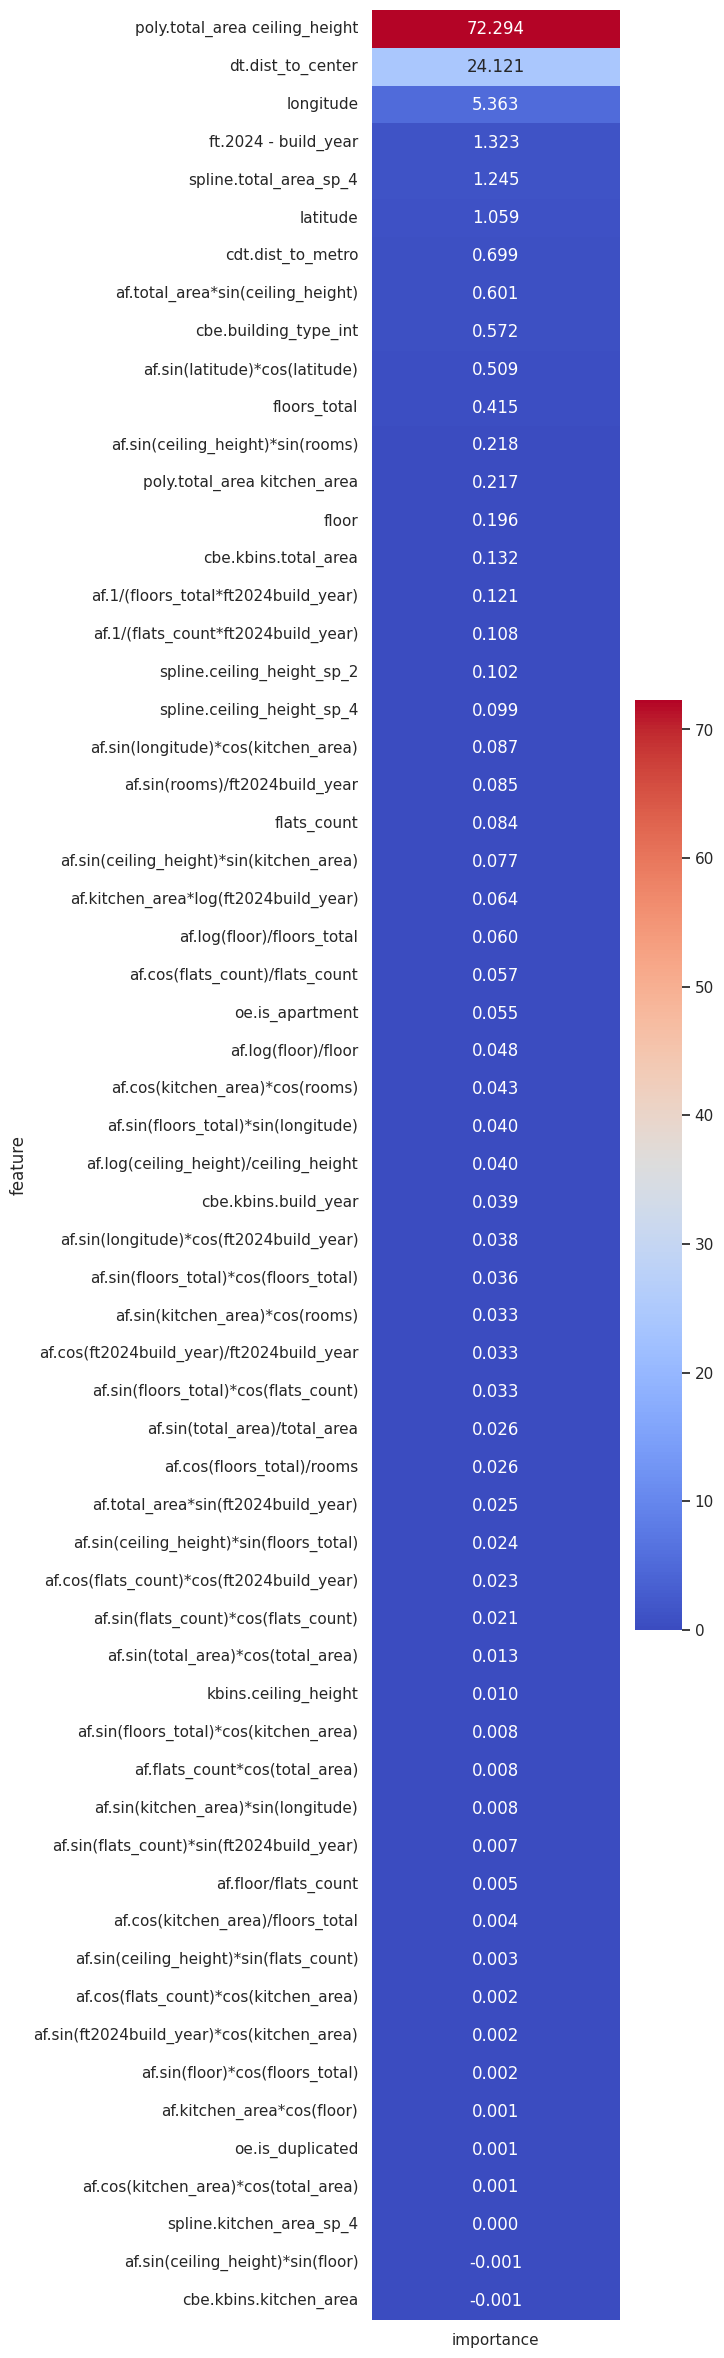

In [43]:
fig = plt.figure(figsize=(4, 30))
sns.heatmap(data=df_perm_importances.set_index('feature'), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()
fig.savefig(os.path.join(env_vars.fs_artifacts_dir, 'permutation_feature_importance.png'), bbox_inches='tight')

1. <font color='#d0863b'> Top 4 features are the same as in the previous case. </font>
2. The top features are more or less the same as in the previous case #
3. There are a lot of features with low importance. <font color='#d0863b'> Only 6 out of 61 features have importance > 1. </font>
4. <font color='#d0863b'>`total_area`-based features are still not dominant in the top </font>
5. Unlike in the previous case, there are a lot more almost 0 or lower importance features.

In [45]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv = kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False))

for i in tqdm(list(range(1, len(df_perm_importances)+1))):
    features = df_perm_importances.iloc[:i]['feature'].tolist()
    model_ = CatBoostRegressor(max_depth=3, iterations=100, verbose=False, random_seed=42, thread_count=-1)
    cv_metrics = cross_validate(
        model_,
        df[features],
        df[config['target_col']],
        cv=cv,
        scoring={
            "neg_mae": make_scorer(
                mean_absolute_error, greater_is_better=False
            ),
            "neg_rmse": make_scorer(
                root_mean_squared_error, greater_is_better=False
            ),
            "neg_mape": make_scorer(
                mean_absolute_percentage_error, greater_is_better=False
            ),
            "r2": make_scorer(r2_score, greater_is_better=True),
        },
        n_jobs=1,
        verbose=0,
    )
    cv_metrics = mean_cv_scores(cv_metrics)
    for (k, v) in cv_metrics.items():
        df_perm_importances.loc[i-1, k] = v
    df_perm_importances.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_permutation_importances.csv'), index=False)

  0%|          | 0/61 [00:00<?, ?it/s]

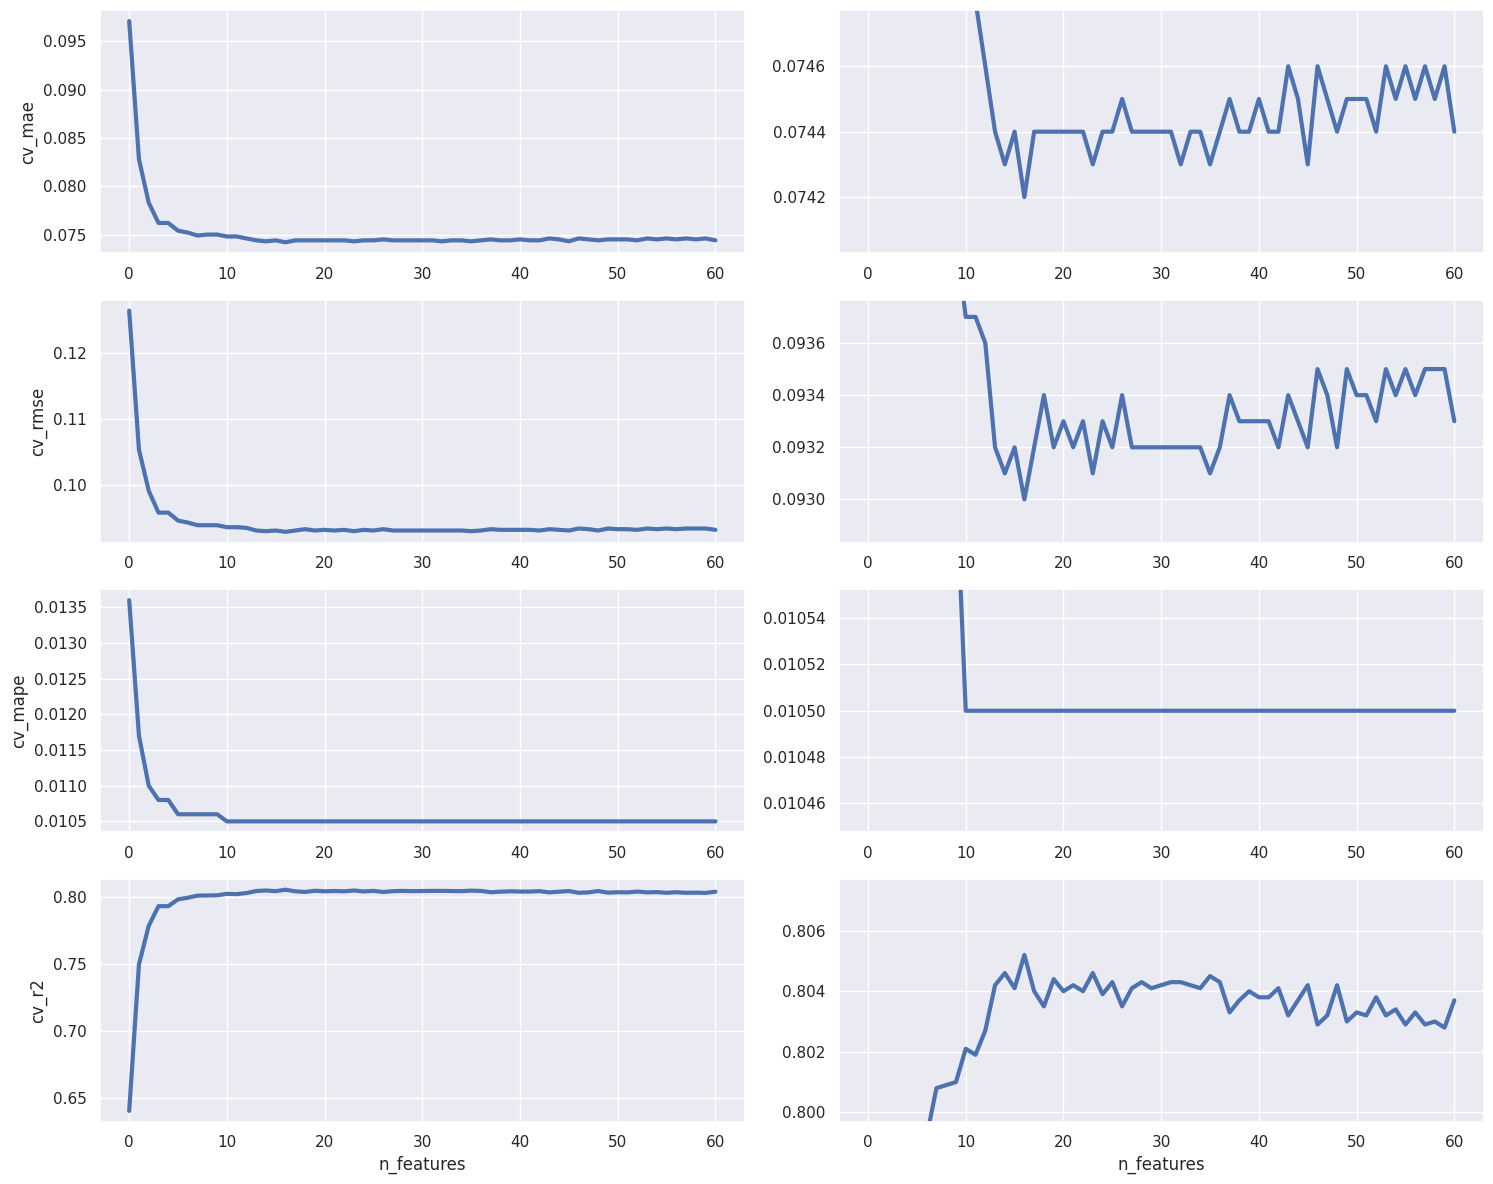

In [46]:
fig, axs = plt.subplots(4, 2, figsize=(15, 3*4))
for i, metric in enumerate(df_perm_importances.columns[-4:]):
    sns.lineplot(data=df_perm_importances, x=df_perm_importances.index, y=metric, lw=3, ax=axs[i, 0])
    sns.lineplot(data=df_perm_importances, x=df_perm_importances.index, y=metric, lw=3, ax=axs[i, 1])
    axs[i, 0].set_xlabel('')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('')
    axs[i, 1].set_ylim(df_perm_importances[metric].median()*0.995, df_perm_importances[metric].median()*1.005)
axs[i, 0].set_xlabel('n_features')
axs[i, 1].set_xlabel('n_features')
fig.tight_layout()
plt.show()
fig.savefig(os.path.join(env_vars.fs_artifacts_dir, 'fs_permutation_importances.png'), bbox_inches='tight')

In [20]:
for metric in df_perm_importances.columns[-4:]:
    print(f"{metric}: {df_perm_importances.sort_values(by=metric, ascending='r2' not in metric).head(5)[metric]}")

cv_mae: 16    0.0742
14    0.0743
23    0.0743
32    0.0743
35    0.0743
Name: cv_mae, dtype: float64
cv_rmse: 16    0.0930
14    0.0931
23    0.0931
35    0.0931
17    0.0932
Name: cv_rmse, dtype: float64
cv_mape: 12    0.0105
13    0.0105
15    0.0105
14    0.0105
10    0.0105
Name: cv_mape, dtype: float64
cv_r2: 16    0.8052
14    0.8046
23    0.8046
35    0.8045
19    0.8044
Name: cv_r2, dtype: float64


1. The metrics curves are stabilizing roughly after <font color='#d0863b'> 10-15 features </font> and then  
a low decreasing trend can be observed with fluctuations.
2. <font color='#d0863b'> 14 features </font> looks like the best choice condifering all the metrics

In [21]:
features_fs_perm_imp = df_perm_importances.iloc[:14]['feature'].tolist()

## 4.3. Forward & Backward Feature Selection

Since there are a lot of features and the size of the dataset is quite decent,   
the `SequentialFeatureSelector` will be fitted on the local machine with a lot more   
computational resources.
 
Also the `SequentialFeatureSelector` will have option `floating` be set to False and <font color='#d0863b'> cross-validation approach with minimum cv=2 will be utilised to decrease the fitting time. </font>

In [32]:
# # was fitted locally
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
# cv = list(kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False)))
# sfs = SequentialFeatureSelector(
#     CatBoostRegressor(max_depth=3, iterations=100, random_state=42, verbose=False, thread_count=-1),
#     k_features=58,
#     forward=True,
#     floating=False,
#     scoring='r2',
#     cv=cv,
#     n_jobs=1,
#     verbose=2,
# )
# sfs.fit(df.drop(columns=['flat_id', config['target_col']]), df[config['target_col']])
# joblib.dump(sfs, 'sfs.pkl')

In [ ]:
# # was fitted locally
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
# cv = list(kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False)))
# sbs = SequentialFeatureSelector(
#     CatBoostRegressor(max_depth=3, iterations=100, random_state=42, verbose=False, thread_count=-1),
#     k_features=1,
#     forward=False,
#     floating=False,
#     scoring='r2',
#     cv=cv,
#     n_jobs=1,
#     verbose=2,
# )
# sbs.fit(df.drop(columns=['flat_id', config['target_col']]), df[config['target_col']])
# joblib.dump(sbs, 'sbs.pkl')

In [22]:
sfs = read_pkl(Path('../models/sfs.pkl'))
sbs = read_pkl(Path('../models/sbs.pkl'))

2024-10-01 15:42:04,176 INFO: Model ../models/sfs.pkl has been loaded
2024-10-01 15:42:04,187 INFO: Model ../models/sbs.pkl has been loaded


Let's retrieve the data from the selectors and reform it to the pandas dataframe

In [23]:
sfs_df = pd.DataFrame(
    data=[[k]+[v2 for v2 in v.values()] for k, v in sfs.get_metric_dict().items()],
    columns=['n_features']+[k for k in sfs.get_metric_dict()[1].keys()]
)
sfs_df.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'sfs_df.csv'), index=False)
sfs_df.sort_values(by='avg_score', ascending=False).head(5)

n_features                                        feature_idx   
45          46  (1, 4, 5, 6, 7, 8, 10, 11, 15, 16, 17, 19, 21,...  \
12          13  (1, 10, 11, 16, 21, 24, 26, 32, 41, 45, 47, 55...   
10          11        (1, 10, 16, 21, 24, 32, 41, 45, 47, 55, 56)   
32          33  (1, 4, 6, 10, 11, 15, 16, 17, 21, 24, 25, 26, ...   
28          29  (1, 4, 6, 10, 11, 15, 16, 17, 21, 24, 25, 26, ...   

                                   cv_scores  avg_score   
45  [0.8049741416635491, 0.8036831548130361]   0.804329  \
12    [0.80428110892125, 0.8039570315529313]   0.804119   
10  [0.8041789907810845, 0.8040170911614417]   0.804098   
32  [0.8045647140194605, 0.8035456258109321]   0.804055   
28  [0.8046973350307309, 0.8033209870962327]   0.804009   

                                        feature_names  ci_bound   std_dev   
45  (af.1/(floors_total*ft2024build_year), flats_c...  0.002777  0.000645  \
12  (af.1/(floors_total*ft2024build_year), cbe.bui...  0.000697  0.000162   
10  (af.1/(floors_total*ft2024build_year), cbe.bui...  0.000348  0.000081   
32  (af.1/(floors_total*ft2024build_year), flats_c...  0.002192  0.000510   
28  (af.1/(floors_total*ft2024build_year), flats_c...  0.002961  0.000688   

     std_err  
45  0.000645  
12  0.000162  
10  0.000081  
32  0.000510  
28  0.000688

In [24]:
sbs_df = pd.DataFrame(
    data=[[k]+[v2 for v2 in v.values()] for k, v in sbs.get_metric_dict().items()],
    columns=['n_features']+[k for k in sbs.get_metric_dict()[1].keys()]
)
sbs_df.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'sbs_df.csv'), index=False)
sbs_df.sort_values(by='avg_score', ascending=False).head(5)

n_features                                        feature_idx   
43          18  (4, 7, 11, 12, 16, 17, 19, 21, 24, 27, 31, 32,...  \
47          14  (7, 11, 16, 17, 19, 21, 24, 27, 32, 41, 45, 47...   
50          11       (11, 16, 17, 21, 24, 27, 32, 41, 45, 47, 55)   
28          33  (2, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17,...   
37          24  (4, 7, 8, 11, 12, 16, 17, 19, 21, 24, 25, 27, ...   

                                   cv_scores  avg_score   
43  [0.8041470125490565, 0.8035364465844662]   0.803842  \
47  [0.8038074143694254, 0.8037544965380604]   0.803781   
50  [0.8040087706078497, 0.8032958982697788]   0.803652   
28  [0.8045096517780852, 0.8027579808451423]   0.803634   
37    [0.804888693110362, 0.802308130749744]   0.803598   

                                        feature_names  ci_bound   std_dev   
43  (flats_count, af.sin(floors_total)*cos(floors_...  0.001314  0.000305  \
47  (af.sin(floors_total)*cos(floors_total), floor...  0.000114  0.000026   
50  (floors_total, kbins.ceiling_height, af.1/(fla...  0.001534  0.000356   
28  (spline.total_area_sp_4, flats_count, af.flats...  0.003768  0.000876   
37  (flats_count, af.sin(floors_total)*cos(floors_...  0.005552  0.001290   

     std_err  
43  0.000305  
47  0.000026  
50  0.000356  
28  0.000876  
37  0.001290

In [25]:
df_importances['n_features'] = range(1, len(df_importances) + 1)
df_perm_importances['n_features'] = range(1, len(df_perm_importances) + 1)

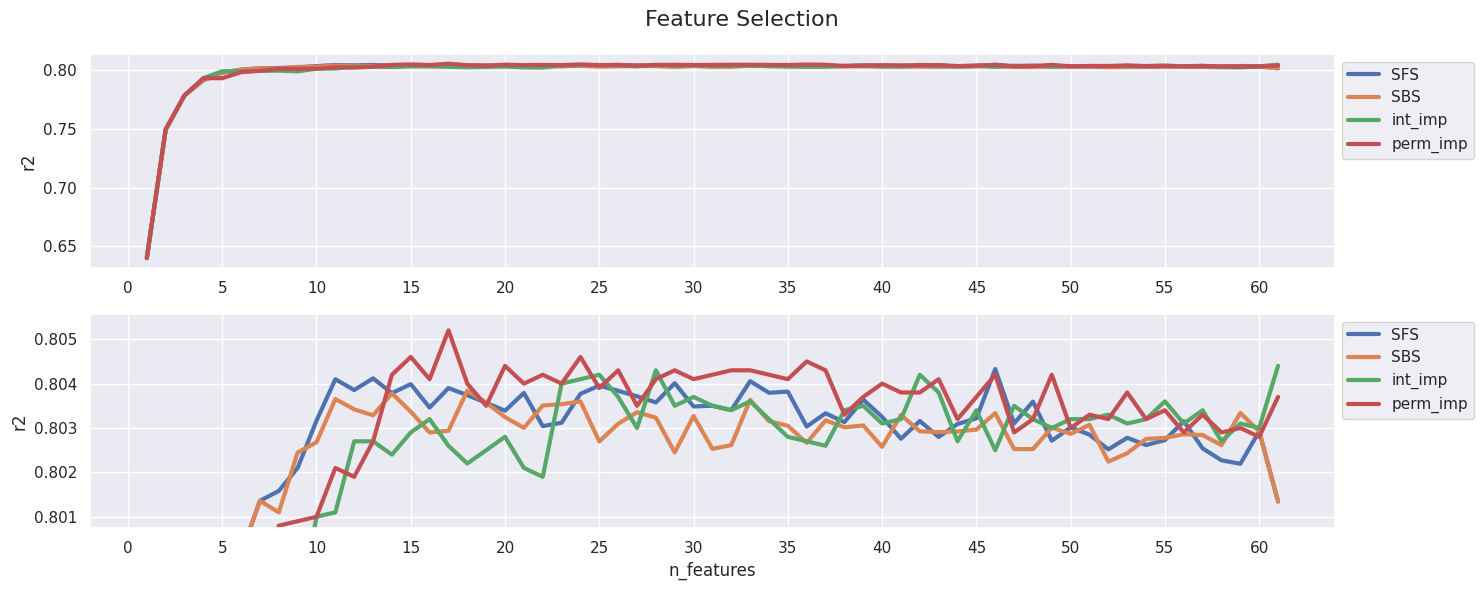

In [28]:
fig, axs = plt.subplots(2, figsize=(15, 6))

fig.suptitle('Feature Selection', fontsize=16)

sns.lineplot(data=sfs_df, x='n_features', y='avg_score', ax=axs[0], lw=3, label='SFS')
sns.lineplot(data=sbs_df, x='n_features', y='avg_score', ax=axs[0], lw=3, label='SBS')
sns.lineplot(data=df_importances, x='n_features', y='cv_r2', ax=axs[0], lw=3, label='int_imp')
sns.lineplot(data=df_perm_importances, x='n_features', y='cv_r2', ax=axs[0], lw=3, label='perm_imp')
axs[0].set_xticks((range(0, df.shape[1]+5, 5)))
axs[0].set_xlabel('')
axs[0].set_ylabel('r2')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1, 1))

sns.lineplot(data=sfs_df, x='n_features', y='avg_score', ax=axs[1], lw=3, label='SFS')
sns.lineplot(data=sbs_df, x='n_features', y='avg_score', ax=axs[1], lw=3, label='SBS')
sns.lineplot(data=df_importances, x='n_features', y='cv_r2', ax=axs[1], lw=3, label='int_imp')
sns.lineplot(data=df_perm_importances, x='n_features', y='cv_r2', ax=axs[1], lw=3, label='perm_imp')
axs[1].set_ylim(sfs_df['avg_score'].median()*0.997, sfs_df['avg_score'].median()*1.003)
axs[1].set_xticks((range(0, df.shape[1]+5, 5)))
axs[1].set_ylabel('r2')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

fig.savefig(os.path.join(env_vars.fs_artifacts_dir, 'fs_methods_comparison.png'))


1. <font color='#d0863b'> A increasing trend, a more or less plateau and a decreasing trend (all with fluctuations) can be observed for SFS and SBS 
(if to consider cross-validation with floating set to `True`, the curves would be smoother with more clear increase-platueau-decrease pattern) </font>
2. <font color='#d0863b'> The highest score for `sfs` is 46 features (which is good since the resulting dataset will be much smaller) </font>.
3. <font color='#d0863b'> Although the highest score for `sbs` is 18 features, let's select the second best result (36 features) since 55 features is very close to initial 58 features + the scores are close in any case. </font>

Intersection and union of the resulting features subsets will be also computed.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Супер! Ты молодец.

Один из немногих кто верно использует валидацию

    
    
</div>

In [29]:
features_sfs = sorted(sfs_df.query('n_features == 46')['feature_names'].values[0])
features_sbs = sorted(sbs_df.query('n_features == 18')['feature_names'].values[0])

features_sfs_sbs_intersection = sorted(list(set(features_sfs).intersection(features_sbs)))
features_sfs_sbs_union = sorted(list(set(features_sfs).union(features_sbs)))
print(f'Number of features in SFS: {len(features_sfs)}')
print(f'Number of features in SBS: {len(features_sbs)}')
print(f'Number of features in SFS | SBS: {len(features_sfs_sbs_intersection)}')
print(f'Number of features in SFS & SBS: {len(features_sfs_sbs_union)}')

Number of features in SFS: 46
Number of features in SBS: 18
Number of features in SFS | SBS: 17
Number of features in SFS & SBS: 47


In [30]:
features_sfs_sbs_intersection

['af.1/(flats_count*ft2024build_year)',
 'af.floor/flats_count',
 'af.sin(floors_total)*cos(floors_total)',
 'cbe.kbins.build_year',
 'cbe.kbins.total_area',
 'cdt.dist_to_metro',
 'dt.dist_to_center',
 'flats_count',
 'floor',
 'floors_total',
 'ft.2024 - build_year',
 'kbins.ceiling_height',
 'latitude',
 'longitude',
 'oe.is_apartment',
 'poly.total_area ceiling_height',
 'spline.ceiling_height_sp_4']

It can be seen, that only 27 features were the same for both models.   
Half of them (14) are connected with the area features, while features like  
`dt.dist_to_center`, building age, coordinates and other original features are also presented

## 4.4 Comparing different subsets of features

As a result, 6 different subsets of top features were obtained:
- `features_fs_int_imp` - model's internal importance values
- `features_fs_perm_imp` - permutation importance values
- `features_sfs` - sequential forward selection
- `features_sbs` - sequential backward selection
- `features_sfs_sbs_intersection` - intersection of `features_sfs` and `features_sbs`
- `features_sfs_sbs_union` - union of `features_sfs` and `features_sbs`

Let's evaluate the model on all subsets via cross-validation.
The same data as for the feature selection will be used

In [45]:
cv_scores = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = list(kfold.split(df, pd.qcut(df[config["target_col"]], 10, labels=False)))
for (k, v) in tqdm({
        'int_imp': features_fs_int_imp,
        'perm_imp': features_fs_perm_imp,
        'sfs': features_sfs,
        'sbs': features_sbs,
        'sfs_sbs_intersection': features_sfs_sbs_intersection,
        'sbs_sfs_union': features_sfs_sbs_union,
    }.items()):
    
    scores = cross_validate(
        CatBoostRegressor(verbose=False, random_state=42, thread_count=-1),
        df[v], 
        df[config['target_col']], 
        cv=cv, 
        scoring={
            'neg_mae': make_scorer(mean_absolute_error, greater_is_better=False),
            'neg_rmse': make_scorer(root_mean_squared_error, greater_is_better=False),
            'neg_mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
            'r2': make_scorer(r2_score, greater_is_better=True),
        },
        n_jobs=1,
        verbose=2
    )
    cv_scores[k] = mean_cv_scores(scores)
    cv_scores[k]['n_features'] = len(v)
    cv_scores[k]['features'] = v

cv_scores = pd.DataFrame(cv_scores).T
cv_scores.reset_index(inplace=True)
cv_scores.rename(columns={'index': 'fs_method'}, inplace=True)

cv_scores.to_csv(os.path.join(env_vars.fs_artifacts_dir, 'fs_best_feature_subsets_cv_evaluation.csv'))

  0%|          | 0/6 [00:00<?, ?it/s]

[CV] END .................................................... total time=  11.3s
[CV] END .................................................... total time=  11.6s
[CV] END .................................................... total time=  10.9s
[CV] END .................................................... total time=  13.6s
[CV] END .................................................... total time=  11.7s
[CV] END .................................................... total time=   7.5s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   7.7s
[CV] END .................................................... total time=   7.6s
[CV] END .................................................... total time=   7.5s
[CV] END .................................................... total time=  16.7s
[CV] END .................................................... total time=  14.2s
[CV] END ...................

In [47]:
cv_scores.sort_values(by='cv_r2', ascending=False)

fs_method fit_time score_time  cv_mae cv_rmse cv_mape   cv_r2   
1              perm_imp   7.8728     0.0174  0.0714  0.0892  0.0101  0.8208  \
0               int_imp   11.806     0.0283  0.0713  0.0892  0.0101  0.8207   
2                   sfs  15.5395     0.0197  0.0713  0.0892  0.0101  0.8206   
5         sbs_sfs_union  15.1309     0.0278  0.0713  0.0892  0.0101  0.8205   
4  sfs_sbs_intersection   8.5948     0.0155  0.0716  0.0896  0.0101  0.8191   
3                   sbs   8.3802     0.0153  0.0717  0.0896  0.0101  0.8189   

  n_features                                           features  
1         14  [poly.total_area ceiling_height, dt.dist_to_ce...  
0         27  [poly.total_area ceiling_height, dt.dist_to_ce...  
2         46  [af.1/(flats_count*ft2024build_year), af.1/(fl...  
5         47  [af.1/(flats_count*ft2024build_year), af.1/(fl...  
4         17  [af.1/(flats_count*ft2024build_year), af.floor...  
3         18  [af.1/(flats_count*ft2024build_year), af.cos(f...

<font color='#d0863b'> Features obtained via `Permutation Importance` method are the best choice, although by a small margin. </font>

In [48]:
features_best = cv_scores.query('fs_method == "perm_imp"')['features'].item()

## 4.5. Training a new model version with the best features

In [50]:
results = eval_model(
    model=CatBoostRegressor(random_state=42, verbose=False, thread_count=-1),
    X_train=df_train[features_best],
    y_train=df_train[config['target_col']],
    X_test=df_test[features_best],
    y_test=df_test[config['target_col']],
    cv=5
)

2024-10-01 16:07:20,115 INFO: Test metrics: {'test_mae': 0.071094882611875, 'test_rmse': 0.08768733699395999, 'test_mape': 0.010035530756342425, 'test_r2': 0.8251722965781794}


[CV] END .................................................... total time=   7.4s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=   7.9s
[CV] END .................................................... total time=   8.5s


2024-10-01 16:08:03,167 INFO: CV metrics: {'fit_time': 8.5868, 'score_time': 0.0175, 'cv_mae': 0.0713, 'cv_rmse': 0.089, 'cv_mape': 0.0101, 'cv_r2': 0.8214}


[CV] END .................................................... total time=   8.4s


Let's retrieve and analyse the importance of the features

In [52]:
df_importances = pd.DataFrame()
df_importances['feature'] = results['model'].feature_names_
df_importances['importance'] = results['model'].feature_importances_
df_importances.sort_values(by='importance', ascending=False, inplace=True)
df_importances_dict = df_importances.set_index('feature').to_dict()['importance']

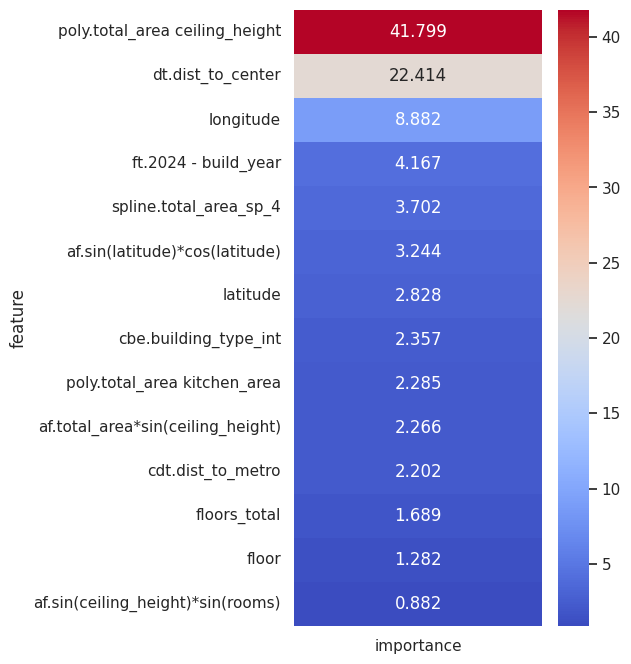

In [54]:
fig = plt.figure(figsize=(4, 8))
sns.heatmap(data=df_importances.set_index('feature'), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()
fig.savefig(os.path.join(env_vars.fs_artifacts_dir, 'internal_feature_importance_for_final_model.png'), bbox_inches='tight')

1. <font color='#d0863b'> Top 4 features remained the same. </font>
2. <font color='#d0863b'> Among all 14 features, 5 features are connected to the `total_area`, 5 features related to coordinates, building age, `floor` and `floors_total`, encoded `building_type_int`  </font>


Logging

In [55]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)

with mlflow.start_run(run_name=config['run_names']['fs'], experiment_id=experiment_id) as run:

    # Logging scripts
    mlflow.log_artifacts(
        local_dir='../scripts',
        artifact_path=f"'{config['default_artifact_dir']}/scripts"
    )

    # Logging artifacts
    mlflow.log_artifacts(
        local_dir=env_vars.fs_artifacts_dir,
        artifact_path=config['default_artifact_dir']
    )
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging notebook
    mlflow.log_artifact(
        local_path=os.path.join(os.getcwd(), '2_model_improvement.ipynb'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging the importances
    mlflow.log_dict(
        dictionary=df_importances_dict,
        artifact_file=f"{config['default_artifact_dir']}/internal_feature_importance_for_final_model.json"
    )
    logger.info(f'Logged artifacts from fs stage')

    # Logging the ML model with metrics and params
    log_model_info(
        **results,
        client=client,
        registry_model_name=config['model_registry_name'],
        model_loader=mlflow.catboost,
        params=results['model'].get_params(),
        metadata=None,
        model_tags={
            'model_type': 'after_fs',
            'prediction_type': 'log10(1 + price)',
            'living_area': 'non-zero',
        },
    )

2024-10-01 16:11:56,950 INFO: Experiment 'flat_price' exists


2024-10-01 16:11:58,048 INFO: Logged artifacts from fs stage
2024-10-01 16:11:58,084 INFO: Metrics for model flat_price_model has been logged
2024-10-01 16:11:58,103 INFO: Paremeters for model flat_price_model has been logged
Registered model 'flat_price_model' already exists. Creating a new version of this model...
Created version '8' of model 'flat_price_model'.
2024-10-01 16:11:58,446 INFO: Model flat_price_model has been logged


## 4.6. Models comparison

In [37]:
runs_df = mlflow.search_runs(experiment_ids=[experiment_id])
columns = ['tags.mlflow.runName'] + [k for k in runs_df.columns if k.startswith('metrics')][2:]
runs_df = runs_df[columns].dropna(axis=0).set_index('tags.mlflow.runName')
#runs_df = runs_df[['tags.mlflow.runName'] + [k for k in runs_df.columns if k.startswith('metrics')]].dropna(axis=0).set_index('tags.mlflow.runName')

In [36]:
columns

['tags.mlflow.runName',
 'metrics.val_r2',
 'metrics.best_score',
 'metrics.score_time',
 'metrics.fit_time',
 'metrics.test_rmse',
 'metrics.cv_mape',
 'metrics.test_mape',
 'metrics.cv_rmse',
 'metrics.cv_r2',
 'metrics.test_r2']

In [40]:
runs_df[sorted([k for k in runs_df.columns if 'cv' in k])].iloc[:-4]

metrics.cv_mae  metrics.cv_mape  metrics.cv_r2   
tags.mlflow.runName                                                   
fs2                          0.0713           0.0101         0.8214  \
fe_model2                    0.0712           0.0100         0.8212   
baseline_2                   0.0715           0.0101         0.8196   

                     metrics.cv_rmse  
tags.mlflow.runName                   
fs2                           0.0890  
fe_model2                     0.0890  
baseline_2                    0.0894

In [41]:
runs_df[sorted([k for k in runs_df.columns if 'test' in k])].iloc[:-4]

metrics.test_mae  metrics.test_mape  metrics.test_r2   
tags.mlflow.runName                                                         
fs2                          0.071095           0.010036         0.825172  \
fe_model2                    0.070788           0.009991         0.825053   
baseline_2                   0.071271           0.010058         0.822439   

                     metrics.test_rmse  
tags.mlflow.runName                     
fs2                           0.087687  
fe_model2                     0.087717  
baseline_2                    0.088370

The model after feature selection stage slightly outperforms other models at least according to the main metric.  
<font color='#d0863b'> Also considering that the number of features used in the resulting model is quite low (only 14 while baseline model was trained on 15 features), both feature engineering and feature selection stages were successful </font>

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Улучшения конечно очень маленькие... Интересно почему. Обычно я видела хороший рост метрик после базовой модели, даже просто с добавлением одного расстояния до центра. Кстати можно было еще добавить скейленные признаки.

</div>

# V. Hyperparameter Tuning

Reading data after the feature engineering stage

In [5]:
df_train = pd.read_csv(os.path.join(env_vars.fe_artifacts_dir, "df_train_after_fe.csv"))

df_test = pd.read_csv(os.path.join(env_vars.fe_artifacts_dir, "df_test_after_fe.csv"))

Retrieving the best set of features from the model trained after feature selection

In [10]:
uri = client.get_model_version(config['model_registry_name'], version='8').source
model = mlflow.catboost.load_model(uri)
features = model.feature_names_

2024-10-01 16:46:17,796 INFO: Found credentials in environment variables.


The tuning should be done on the training and validation sets or via cross-validation on the training set.  
To speed up the tuning process, the train-validation approach will be used.

In [15]:
train_val_index = [subset.index for subset in train_test_split(
    df_train,
    test_size=config["data_split_config"]["val_size"],
    random_state=config["data_split_config"]["random_state"],
    stratify=pd.qcut(df_train[config["target_col"]], 10, labels=False),
    shuffle=True,
)]

In [16]:
list(map(len, train_val_index))

[88779, 9865]

Since `Optuna` with `RandomSampler` and `TPESampler` will be considered, a distribution needs to be defined for each hyperparameter.  
Following the recommendations from the `CatBoost` documentation, the following distributions will be used for tuning hyperparameters:
- `iterations`: int from 100 to 500
- `learning_rate`: float from 0.01 to 1
- `max_depth`: int from 4 to 10
- `l2_leaf_reg`: loguniform from 0.0001 to 1
- `loss_function`: <font color='#d0863b'> `RMSE` (other options were found to provide worse results) </font>
- `random_strength`: int from 1 to 10
- `bagging_temperature`: float from 0 to 2
- `border_count`: int from 64 to 255
- `grow_policy`: <font color='#d0863b'> `Depthwise` (other options were found to provide worse results) </font>

In order to decrease the computational time, a train-validation approach will be considered instead  
of cross-validation. The `objective` function is defined as follows:

In [14]:
def objective(
    trial: optuna.Trial,
    model_name: str,
    df_train: pd.DataFrame,
    df_val: pd.DataFrame,
    features: List[str],
    target: str,
    scorer: Callable,
    hyperparameters_grid: Dict,
) -> float:

    hyperparams = {}
    for param, config in hyperparameters_grid.items():
        suggest_method = getattr(trial, config["method"])
        hyperparams[param] = suggest_method(param, **config["kwargs"])

    model = globals()[model_name](**hyperparams)
    model.fit(df_train[features], df_train[target])
    prediction = model.predict(df_val[features])
    score = scorer(df_val[target], prediction)
    return score

## 5.1. Random Sampler

In [25]:
experiment_id = get_experiment_id(
    experiment_name=config["experiment_name"], client=client
)

with mlflow.start_run(
    run_name=config['run_names']['tuning']['random'], experiment_id=experiment_id
) as run:

    mlflc = MLflowCallback(
        tracking_uri=f"http://{env_vars.tracking_server_host}:{env_vars.tracking_server_port}",
        metric_name="val_r2",
        create_experiment=False,
        mlflow_kwargs={"experiment_id": experiment_id, "nested": True},
    )

    study_random = optuna.create_study(
        direction="maximize",
        sampler=optuna.samplers.RandomSampler(),
        study_name=config['optuna']['study_name'],
        storage=f"sqlite:///{env_vars.tuning_artifacts_dir}/{config['optuna']['db_name']['random']}",
        load_if_exists=True,
    )
    study_random.optimize(
        lambda trial: objective(
            trial=trial,
            model_name="CatBoostRegressor",
            df_train=df_train.loc[train_val_index[0]],
            df_val=df_train.loc[train_val_index[1]],
            features=features,
            target=config["target_col"],
            scorer=r2_score,
            hyperparameters_grid=read_yaml(
                Path(
                    os.path.join(
                        env_vars.tuning_artifacts_dir, "optuna_grid.yaml"
                    )
                ),
                verbose=False,
            )["CatBoostRegressor"],
        ),
        n_trials=config['optuna']['n_trials'],
        callbacks=[mlflc],
    )
    best_params = study_random.best_params
    
    mlflow.log_params(study_random.best_params)
    mlflow.log_metric("best_score", study_random.best_value)

    logger.info(f"Tuning process finished")
    logger.info(f"Number of finished trials: {len(study_random.trials)}")
    logger.info(f"Best params: {best_params}")

    mlflow.log_artifact(
        local_path=os.path.join(
            env_vars.tuning_artifacts_dir, "optuna_grid.yaml"
        ),
        artifact_path=config['default_artifact_dir'],
    )

    mlflow.log_artifact(
        local_path=os.path.join(
            env_vars.tuning_artifacts_dir, config['optuna']['db_name']['random']
        ),
        artifact_path=config['default_artifact_dir'],
    )

2024-10-01 19:46:33,174 INFO: Experiment 'flat_price' exists


2024-10-01 20:03:15,771 INFO: Tuning process finished
2024-10-01 20:03:15,792 INFO: Number of finished trials: 100
2024-10-01 20:03:15,793 INFO: Best params: {'iterations': 421, 'learning_rate': 0.12357537029420532, 'max_depth': 9, 'l2_leaf_reg': 0.0005582940133471779, 'loss_function': 'RMSE', 'random_strength': 9, 'bagging_temperature': 0.5348357548733127, 'border_count': 78, 'grow_policy': 'Depthwise', 'thread_count': -1, 'random_state': 42, 'verbose': False}


## 5.2. Tree-structured Parzen Estimator Sampler

In [24]:
experiment_id = get_experiment_id(
    experiment_name=config["experiment_name"], client=client
)

with mlflow.start_run(
    run_name=config['run_names']['tuning']['tpe'], experiment_id=experiment_id
) as run:

    mlflc = MLflowCallback(
        tracking_uri=f"http://{env_vars.tracking_server_host}:{env_vars.tracking_server_port}",
        metric_name="val_r2",
        create_experiment=False,
        mlflow_kwargs={"experiment_id": experiment_id, "nested": True},
    )

    study_tpe = optuna.create_study(
        direction="maximize",
        sampler=optuna.samplers.TPESampler(seed=42),
        study_name=config['optuna']['study_name'],
        storage=f"sqlite:///{env_vars.tuning_artifacts_dir}/{config['optuna']['db_name']['tpe']}",
        load_if_exists=True,
    )
    study_tpe.optimize(
        lambda trial: objective(
            trial=trial,
            model_name="CatBoostRegressor",
            df_train=df_train.loc[train_val_index[0]],
            df_val=df_train.loc[train_val_index[1]],
            features=features,
            target=config["target_col"],
            scorer=r2_score,
            hyperparameters_grid=read_yaml(
                Path(
                    os.path.join(
                        env_vars.tuning_artifacts_dir, "optuna_grid.yaml"
                    )
                ),
                verbose=False,
            )["CatBoostRegressor"],
        ),
        n_trials=config['optuna']['n_trials'],
        callbacks=[mlflc],
    )
    best_params = study_tpe.best_params
    
    mlflow.log_params(study_tpe.best_params)
    mlflow.log_metric("best_score", study_tpe.best_value)

    logger.info(f"Tuning process finished")
    logger.info(f"Number of finished trials: {len(study_tpe.trials)}")
    logger.info(f"Best params: {best_params}")

    mlflow.log_artifact(
        local_path=os.path.join(
            env_vars.tuning_artifacts_dir, "optuna_grid.yaml"
        ),
        artifact_path=config['default_artifact_dir'],
    )
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )

    mlflow.log_artifact(
        local_path=os.path.join(
            env_vars.tuning_artifacts_dir, config['optuna']['db_name']['tpe']
        ),
        artifact_path=config['default_artifact_dir'],
    )

2024-10-01 19:08:30,013 INFO: Experiment 'flat_price' exists


2024-10-01 19:46:10,454 INFO: Tuning process finished
2024-10-01 19:46:10,476 INFO: Number of finished trials: 100
2024-10-01 19:46:10,477 INFO: Best params: {'iterations': 408, 'learning_rate': 0.09081412027549657, 'max_depth': 10, 'l2_leaf_reg': 0.000980513703887488, 'loss_function': 'RMSE', 'random_strength': 1, 'bagging_temperature': 0.8859244639445577, 'border_count': 202, 'grow_policy': 'Depthwise', 'thread_count': -1, 'random_state': 42, 'verbose': False}


## 5.3. Tuning results comparison

In [8]:
# study_tpe = optuna.load_study(study_name="flat_price_study2", storage=f"sqlite:///{env_vars.tuning_artifacts_dir}/{config['optuna']['db_name']['tpe']}")
# study_random = optuna.load_study(study_name="flat_price_study2", storage=f"sqlite:///{env_vars.tuning_artifacts_dir}/{config['optuna']['db_name']['random']}")

In [26]:
comparison_df = pd.DataFrame(columns = ['sampler', 'val_r2'] + list(study_random.best_params.keys()))
comparison_df.loc[0] = ['random', study_random.best_value] + list(study_random.best_params.values())
comparison_df.loc[1] = ['tpe', study_tpe.best_value] + list(study_tpe.best_params.values())
comparison_df.to_csv(os.path.join(env_vars.tuning_artifacts_dir, 'tuning_samplers_comparison.csv'), index=False)
comparison_df

sampler    val_r2  iterations  learning_rate  max_depth  l2_leaf_reg   
0  random  0.822724         421       0.123575          9     0.000558  \
1     tpe  0.826772         408       0.090814         10     0.000981   

  loss_function  random_strength  bagging_temperature  border_count   
0          RMSE                9             0.534836            78  \
1          RMSE                1             0.885924           202   

  grow_policy  thread_count  random_state  verbose  
0   Depthwise            -1            42    False  
1   Depthwise            -1            42    False

Unsurprisingly, the TPE Sampling algorithm provided the best hyperrparameter set in terms of 
the evaluation metric.

Accroding to the graphs that are available via the MLflow UI:
- `max_depth`: higher depth was better - a less biased model with high depth is crucial for the task
- `learning_rate`: lower learning rate was better up to 0.1, but even lower rates were decreasing the performance
- `iterations`: it was not a critical parameter, although too low values were decreasing the performance
- `border_count`: it was not a critical parameter
- `bagging_temperature`: it was not a critical parameter
- `random_strength`: <font color='#d0863b'> higher values can more likely decrease the performance </font>
- `l2_leaf_reg`: it was not a critical parameter

## 5.4. Training a new model version

In [27]:
result = eval_model(
    model=CatBoostRegressor(**study_tpe.best_params),
    X_train=df_train[features],
    y_train=df_train[config['target_col']],
    X_test=df_test[features],
    y_test=df_test[config['target_col']],
    cv=5
)

2024-10-01 20:04:27,182 INFO: Test metrics: {'test_mae': 0.06807868084872551, 'test_rmse': 0.08568072891066451, 'test_mape': 0.009611585067377982, 'test_r2': 0.833082144836971}


[CV] END .................................................... total time=  31.4s
[CV] END .................................................... total time=  33.6s
[CV] END .................................................... total time=  35.0s
[CV] END .................................................... total time=  31.8s


2024-10-01 20:07:10,752 INFO: CV metrics: {'fit_time': 32.5814, 'score_time': 0.1238, 'cv_mae': 0.0687, 'cv_rmse': 0.0873, 'cv_mape': 0.0097, 'cv_r2': 0.8282}


[CV] END .................................................... total time=  31.8s


In [42]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)

with mlflow.start_run(run_name=config['run_names']['tuning']['final_model'], experiment_id=experiment_id) as run:

    # Logging scripts
    mlflow.log_artifacts(
        local_dir='../scripts',
        artifact_path=f"{config['default_artifact_dir']}/scripts"
    )

    # Logging artifacts
    mlflow.log_artifacts(
        local_dir=env_vars.tuning_artifacts_dir,
        artifact_path=config['default_artifact_dir']
    )
    mlflow.log_artifact(
        local_path=os.path.join(env_vars.config_dir, 'config.yaml'),
        artifact_path=config['default_artifact_dir']
    )

    # Logging notebook
    mlflow.log_artifact(
        local_path=os.path.join(os.getcwd(), '2_model_improvement.ipynb'),
        artifact_path=config['default_artifact_dir']
    )
    logger.info(f'Logged artifacts from tuning stage')

    # Logging the ML model with metrics and params
    log_model_info(
        **result,
        client=client,
        registry_model_name=config['model_registry_name'],
        model_loader=mlflow.catboost,
        params=result['model'].get_params(),
        metadata=None,
        model_tags={
            'model_type': 'after_tuning',
            'prediction_type': 'log10(1 + price)',
            'living_area': 'non-zero',
        },
    )

2024-10-01 20:10:40,637 INFO: Experiment 'flat_price' exists


2024-10-01 20:10:42,279 INFO: Logged artifacts from tuning stage
2024-10-01 20:10:42,321 INFO: Metrics for model flat_price_model has been logged
2024-10-01 20:10:42,343 INFO: Paremeters for model flat_price_model has been logged
Registered model 'flat_price_model' already exists. Creating a new version of this model...
Created version '9' of model 'flat_price_model'.
2024-10-01 20:10:43,001 INFO: Model flat_price_model has been logged


## 5.5 Models Comparison

In [20]:
experiment_id = get_experiment_id(experiment_name=config['experiment_name'], client=client)
runs_df = mlflow.search_runs(experiment_ids=[experiment_id])
columns = ['tags.mlflow.runName'] + sorted([k for k in runs_df.columns if k.startswith('metrics')][:-2])
runs_df = runs_df[columns].dropna(axis=0).iloc[:-4]

2024-10-01 20:49:02,916 INFO: Experiment 'flat_price' exists


In [22]:
import plotly.graph_objects as go

group_vars = runs_df["tags.mlflow.runName"].unique()
dfg = pd.DataFrame(
    {"tags.mlflow.runName": runs_df["tags.mlflow.runName"].unique()}
)
dfg["dummy"] = dfg.index
runs_df = pd.merge(runs_df, dfg, on="tags.mlflow.runName", how="left")

dimensions = list(
    [
        {
            "range": [runs_df[k].min(), runs_df[k].max()],
            "label": k,
            "values": runs_df[k],
        }
        for k in runs_df.columns
        if k not in ["tags.mlflow.runName", 'dummy']
    ]
)
dimensions.append(
    {
        "range": [0, runs_df["dummy"].max()],
        "label": "model_stage",
        "values": runs_df["dummy"],
        "tickvals": dfg["dummy"],
        "ticktext": dfg["tags.mlflow.runName"],
    }
)

fig = go.Figure(
    data=go.Parcoords(
        line=dict(
            color=runs_df["dummy"],
            colorscale=[
                [0, "rgba(200,0,0,0.1)"],
                [0.5, "rgba(0,200,0,0.1)"],
                [1, "rgba(0,0,200,0.1)"],
            ],
        ),
        dimensions=dimensions,
    )
)
fig.update_layout(showlegend=True)
fig.show()

del runs_df["dummy"]


It can be seen that the tuned model on the best features set has the best performance among all considered metrics, although the margin is not that great since the CatBoost model is very powerful even on the default hyperparameters.


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Результаты хорошие!
Соглашусь, катбуст и так крутой)

Кстати, для наибольшей наглядности конечно стоит строить график сравнения метрик. Сравнивать по табличкам числа с 6 знаками после запятой - та ще жесть ) Не очень наглядно. Ну и знаков многовато. Графики наше все.

</div>

# VI. Further improvement

There are several ways to improve the model:
1. Tune the model further given the information about how hyperparameters affect the model
2. Try different models (XGBoost, LightGBM, etc.) - stages from the feature engineering part need to be done again for each model
3. If the second point is done, it is possible to apply different stacking models 
4. Ask for more data if it is available
5. Perform residual analysis:
- check if the residuals are normally distributed
- check if the residuals are homoscedastic
- check for any patterns in the residuals (e.g. high residuals appear only for certain values of the features)
- check residuals for fairness (e.g. if the model is biased against certain groups of something)